<a href="https://colab.research.google.com/github/INmais/reliable/blob/master/Reliable_2023_Map_composite_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Composite indicator/vulnerability map

- FA/PCA (Varimax, 4 Factors: 1 % +65	+ % fam +65	
+ % desemprego, 2: % old house; 3: % menor 5k +
4: % need repair)
- MDCA

## References

- What is in an index? Construction method, data metric, and weighting scheme determine the outcome of composite social vulnerability indices in New York City
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6448355/
https://pubmed.ncbi.nlm.nih.gov/31007595/

- Susana Silva, Rita Roquette1, Baltazar Nunes, Mapeamento de índice de vulnerabilidade a ondas de calor, International Conference on Urban Risks (ICUR 2016) http://repositorio.insa.pt/bitstream/10400.18/3870/1/ICUR2016_Poster_final.pdf

- Mapping community determinants of heat vulnerability." (https://www.ncbi.nlm.nih.gov/pubmed/20049125)

- Development of a heat vulnerability index for New York State. (https://www.ncbi.nlm.nih.gov/pubmed/29195682)

- Icaro: https://run.unl.pt/bitstream/10362/103272/1/RUN%20-%20RPSP%20-%201999%20-%20vol%20tematico1a07%20-%20p79-84.pdf

- "The daily urban dynamic indicator: Gauging the urban dynamic in Porto during the COVID-19 pandemic" https://research.unl.pt/ws/portalfiles/portal/36671014/Daily_urban_dynamic_indicator_Porto_Covid_19.pdf

- "Estimation and Uncertainty Analysis of Impacts of Future Heat Waves on Mortality in the Eastern United States" https://ehp.niehs.nih.gov/doi/10.1289/ehp.1306670

- scikit-criteria https://readthedocs.org/projects/scikit-criteria/downloads/pdf/latest/




Data:
- Census ("Base dados edificios georeferenciados")
- INE (deaths, IRS, demographics)
- Corine Land Cover
- IEFP
- Trasparencia Saude
- CDD and HDD


In [1]:
! pip install geopandas
! pip install requests
! pip install sklearn # for PCA
! pip install fuzzywuzzy # fuzzy matching 
! pip install factor_analyzer # for FA
! pip install advanced-pca # PCA, varimax
! pip install scikit-criteria==0.6 # MCDA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=95f6c8ffd6006e0669dcc45168893e7d364e31d3a479342f986d382e5c72f4b2
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.or

In [2]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive/',force_remount=True) #

Mounted at /content/drive/


In [3]:
#output
import os
os.chdir('/content/drive/Shareddrives/Reliable Project/Data/')  

In [4]:
# Module for data manipulation
import pandas as pd
# Module for linear algebra calculation
import numpy as np
# Module for constructing the data
from sklearn.datasets import make_regression
# Module for factor analysis
from factor_analyzer import FactorAnalyzer
# Module for adequacy test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
# Module for standardization
from sklearn.preprocessing import MinMaxScaler
# Module for data viz
from plotnine import *
import plotnine
# Module for spatial data manipulation
import geopandas as gpd
# Module for spatial data viz
import folium
import branca
import branca.colormap as cm
from folium.features import GeoJson, GeoJsonTooltip
# Module for json file
import json

In [5]:
import pandas as pd
url_ctt="https://raw.githubusercontent.com/dssg-pt/mp-mapeamento-cp7/main/output_data/cod_post_freg_matched.csv"
ctt = pd.read_csv(url_ctt, header=0, sep=",") 

In [6]:
cttdic = dict(zip(ctt.Concelho, ctt.Distrito))

# Census



In [7]:
import pandas as pd
url_censos="/content/drive/Shareddrives/Reliable Project/Data/portugal2011.zip (Unzipped Files)/BGRI11_PT.csv"
censos = pd.read_csv(url_censos, header=0, sep=";", encoding = "ISO-8859-1") 

In [8]:
censosmunicipio = censos[censos['NIVEL'] == 5] 

In [9]:
censosmunicipio[censosmunicipio['GEO_COD_DSG'].str.contains("Lagoa")]

ANO GEO_COD    GEO_COD_DSG  NIVEL  NIVEL_DSG  N_EDIFICIOS_CLASSICOS  \
147  2011   '0806          Lagoa      5  Municipio                  12772   
331  2011   '4201  Lagoa (R.A.A)      5  Municipio                   4665   

     N_EDIFICIOS_CLASSICOS_1OU2  N_EDIFICIOS_CLASSICOS_ISOLADOS   \
147                       11458                             4930   
331                        4569                              903   

     N_EDIFICIOS_CLASSICOS_GEMIN  N_EDIFICIOS_CLASSICOS_EMBANDA  ...  \
147                         1938                           4590  ...   
331                         1180                           2486  ...   

     N_IND_RESID_DESEMP_PROC_EMPRG  N_IND_RESID_EMPREGADOS  \
147                           1704                    9439   
331                            653                    5758   

     N_IND_RESID_PENS_REFORM  N_IND_RESID_SEM_ACT_ECON  \
147                     4769                      7995   
331                     1634                      4751   

     N_IND_RESID_EMPREG_SECT_PRIM  N_IND_RESID_EMPREG_SECT_SEQ  \
147                           156                         1507   
331                           473                         1210   

     N_IND_RESID_EMPREG_SECT_TERC  N_IND_RESID_ESTUD_MUN_RESID  \
147                          7776                         3329   
331                          4075                         2860   

     N_IND_RESID_TRAB_MUN_RESID  Unnamed: 127  
147                        5878           NaN  
331                        2968           NaN  

[2 rows x 128 columns]

In [10]:
censosmunicipio[censosmunicipio['GEO_COD_DSG'].str.contains("Tábua")]

ANO GEO_COD GEO_COD_DSG  NIVEL  NIVEL_DSG  N_EDIFICIOS_CLASSICOS  \
126  2011   '0616       Tábua      5  Municipio                   7856   

     N_EDIFICIOS_CLASSICOS_1OU2  N_EDIFICIOS_CLASSICOS_ISOLADOS   \
126                        7625                             4530   

     N_EDIFICIOS_CLASSICOS_GEMIN  N_EDIFICIOS_CLASSICOS_EMBANDA  ...  \
126                          396                           2699  ...   

     N_IND_RESID_DESEMP_PROC_EMPRG  N_IND_RESID_EMPREGADOS  \
126                            439                    4462   

     N_IND_RESID_PENS_REFORM  N_IND_RESID_SEM_ACT_ECON  \
126                     3577                      5437   

     N_IND_RESID_EMPREG_SECT_PRIM  N_IND_RESID_EMPREG_SECT_SEQ  \
126                           222                         1744   

     N_IND_RESID_EMPREG_SECT_TERC  N_IND_RESID_ESTUD_MUN_RESID  \
126                          2496                         1811   

     N_IND_RESID_TRAB_MUN_RESID  Unnamed: 127  
126                        3251           NaN  

[1 rows x 128 columns]

In [11]:
censosmunicipio[censosmunicipio['GEO_COD_DSG'].str.contains("Tabuaço")]

ANO GEO_COD GEO_COD_DSG  NIVEL  NIVEL_DSG  N_EDIFICIOS_CLASSICOS  \
313  2011   '1819     Tabuaço      5  Municipio                   4211   

     N_EDIFICIOS_CLASSICOS_1OU2  N_EDIFICIOS_CLASSICOS_ISOLADOS   \
313                        4144                             2187   

     N_EDIFICIOS_CLASSICOS_GEMIN  N_EDIFICIOS_CLASSICOS_EMBANDA  ...  \
313                          792                           1165  ...   

     N_IND_RESID_DESEMP_PROC_EMPRG  N_IND_RESID_EMPREGADOS  \
313                            222                    2028   

     N_IND_RESID_PENS_REFORM  N_IND_RESID_SEM_ACT_ECON  \
313                     1642                      3243   

     N_IND_RESID_EMPREG_SECT_PRIM  N_IND_RESID_EMPREG_SECT_SEQ  \
313                           352                          501   

     N_IND_RESID_EMPREG_SECT_TERC  N_IND_RESID_ESTUD_MUN_RESID  \
313                          1175                          896   

     N_IND_RESID_TRAB_MUN_RESID  Unnamed: 127  
313                        1443           NaN  

[1 rows x 128 columns]

In [12]:
censosmunicipio[censosmunicipio['GEO_COD_DSG'].str.contains("Calheta")]

ANO GEO_COD       GEO_COD_DSG  NIVEL  NIVEL_DSG  N_EDIFICIOS_CLASSICOS  \
319  2011   '3101  Calheta (R.A.M.)      5  Municipio                   6928   
340  2011   '4501  Calheta (R.A.A.)      5  Municipio                   2325   

     N_EDIFICIOS_CLASSICOS_1OU2  N_EDIFICIOS_CLASSICOS_ISOLADOS   \
319                        6816                             6489   
340                        2312                             2059   

     N_EDIFICIOS_CLASSICOS_GEMIN  N_EDIFICIOS_CLASSICOS_EMBANDA  ...  \
319                          293                             34  ...   
340                          201                             52  ...   

     N_IND_RESID_DESEMP_PROC_EMPRG  N_IND_RESID_EMPREGADOS  \
319                            383                    3900   
340                             78                    1558   

     N_IND_RESID_PENS_REFORM  N_IND_RESID_SEM_ACT_ECON  \
319                     2739                      5359   
340                      744                      1555   

     N_IND_RESID_EMPREG_SECT_PRIM  N_IND_RESID_EMPREG_SECT_SEQ  \
319                           481                          967   
340                           199                          468   

     N_IND_RESID_EMPREG_SECT_TERC  N_IND_RESID_ESTUD_MUN_RESID  \
319                          2452                         1993   
340                           891                          663   

     N_IND_RESID_TRAB_MUN_RESID  Unnamed: 127  
319                        2952           NaN  
340                        1440           NaN  

[2 rows x 128 columns]

In [13]:
#censosmunicipio.to_csv('censosmunicipio.csv')

In [14]:
import pandas as pd
#censosmunicipio="https://docs.google.com/spreadsheets/d/1wf9GbkzOqtvprYwBAe-8wFDz_BNR_YpvzWLCBxl-C0g/export?format=csv&gid=1703250828"
#censosmunicipio = pd.read_csv(censosmunicipio,index_col=[0]) 

In [15]:
censosmunicipio['GEO_COD'] = censosmunicipio['GEO_COD'].astype(str)
censosmunicipio['GEO_COD'] = censosmunicipio['GEO_COD'].str.extract(r'(\d+)', expand=False)

<ipython-input-15-e79279766cc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-15-e79279766cc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
censosmunicipio['GEO_COD'] = censosmunicipio['GEO_COD'].apply(lambda x: ('0'*(4-len(str(x))))+str(x) if(len(str(x)) < 4) else str(x))


<ipython-input-16-2fab49dec194>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
list(censosmunicipio.columns)

['ANO',
 'GEO_COD',
 'GEO_COD_DSG',
 'NIVEL',
 'NIVEL_DSG',
 'N_EDIFICIOS_CLASSICOS',
 'N_EDIFICIOS_CLASSICOS_1OU2',
 'N_EDIFICIOS_CLASSICOS_ISOLADOS ',
 'N_EDIFICIOS_CLASSICOS_GEMIN',
 'N_EDIFICIOS_CLASSICOS_EMBANDA',
 'N_EDIFICIOS_CLASSICOS_3OUMAIS',
 'N_EDIFICIOS_CLASSICOS_OUTROS',
 'N_EDIFICIOS_EXCLUSIV_RESID',
 'N_EDIFICIOS_PRINCIPAL_RESID',
 'N_EDIFICIOS_PRINCIP_NAO_RESID',
 'N_EDIFICIOS_1OU2_PISOS',
 'N_EDIFICIOS_3OU4_PISOS',
 '.N_EDIFICIOS_5OU_MAIS_PISOS',
 'N_EDIFICIOS_CONSTR_ANTES_1919',
 'N_EDIFICIOS_CONSTR_1919A1945',
 'N_EDIFICIOS_CONSTR_1946A1960',
 'N_EDIFICIOS_CONSTR_1961A1970',
 'N_EDIFICIOS_CONSTR_1971A1980',
 'N_EDIFICIOS_CONSTR_1981A1990',
 'N_EDIFICIOS_CONSTR_1991A1995',
 'N_EDIFICIOS_CONSTR_1996A2000',
 'N_EDIFICIOS_CONSTR_2001A2005',
 'N_EDIFICIOS_CONSTR_2006A2011',
 'N_EDIFICIOS_ESTRUT_BETAO',
 'N_EDIFICIOS_ESTRUT_COM_PLACA',
 'N_EDIFICIOS_ESTRUT_SEM_PLACA',
 'N_EDIFICIOS_ESTRUT_ADOBE_PEDRA',
 'N_EDIFICIOS_ESTRUT_OUTRA',
 'N_ALOJAMENTOS',
 'N_ALOJAMENTOS_FAMILIA

In [18]:
censosmunicipio_select = censosmunicipio[[
'GEO_COD',
'GEO_COD_DSG',
'N_EDIFICIOS_CLASSICOS',
'N_EDIFICIOS_CONSTR_ANTES_1919',
'N_EDIFICIOS_CONSTR_1919A1945',
'N_EDIFICIOS_CONSTR_1946A1960',
'N_EDIFICIOS_CONSTR_1961A1970',
'N_EDIFICIOS_CONSTR_1971A1980',
'N_EDIFICIOS_CONSTR_1981A1990',
'N_EDIFICIOS_CONSTR_1991A1995',
'N_EDIFICIOS_CONSTR_1996A2000',
'N_EDIFICIOS_CONSTR_2001A2005',
'N_EDIFICIOS_CONSTR_2006A2011',
'N_FAMILIAS_CLASSICAS',
'N_FAMILIAS_INSTITUCIONAIS',
'N_FAMILIAS_CLASSICAS_1OU2_PESS',
'N_FAMILIAS_CLASSICAS_3OU4_PESS',
'N_FAMILIAS_CLASSICAS_NPES65',
'N_FAMILIAS_CLASSICAS_NPES14',
'N_FAMILIAS_CLASSIC_SEM_DESEMP',
'N_INDIVIDUOS_RESIDENT',
'N_INDIVIDUOS_RESIDENT_H',
'N_INDIVIDUOS_RESIDENT_M',
'N_INDIVIDUOS_RESIDENT_0A4',
'N_INDIVIDUOS_RESIDENT_5A9',
'N_INDIVIDUOS_RESIDENT_10A13',
'N_INDIVIDUOS_RESIDENT_14A19',
'N_INDIVIDUOS_RESIDENT_15A19',
'N_INDIVIDUOS_RESIDENT_20A24',
'N_INDIVIDUOS_RESIDENT_20A64',
'N_INDIVIDUOS_RESIDENT_25A64',
'N_INDIVIDUOS_RESIDENT_65',
'N_FAMILIAS_CLASSIC_1DESEMPREG']]

In [19]:
censosmunicipio_select

GEO_COD            GEO_COD_DSG  N_EDIFICIOS_CLASSICOS  \
41     0101                 Águeda                  18572   
42     0102     Albergaria-a-Velha                  10140   
43     0103                 Anadia                  12977   
44     0104                 Arouca                   9967   
45     0105                 Aveiro                  22817   
..      ...                    ...                    ...   
344    4603      São Roque do Pico                   2248   
345    4701                  Horta                   6447   
346    4801       Lajes das Flores                    991   
347    4802  Santa Cruz das Flores                   1106   
348    4901                  Corvo                    181   

     N_EDIFICIOS_CONSTR_ANTES_1919  N_EDIFICIOS_CONSTR_1919A1945  \
41                             769                          1383   
42                             771                           862   
43                             472                          1094   
44                             594                           805   
45                            1210                          1485   
..                             ...                           ...   
344                            122                           201   
345                            418                           408   
346                            217                           171   
347                            189                           135   
348                             90                            26   

     N_EDIFICIOS_CONSTR_1946A1960  N_EDIFICIOS_CONSTR_1961A1970  \
41                           1954                          2237   
42                           1064                          1109   
43                           1638                          1852   
44                            856                           854   
45                           2408                          2617   
..                            ...                           ...   
344                           194                           123   
345                           478                           402   
346                           107                            73   
347                           110                            74   
348                            13                             6   

     N_EDIFICIOS_CONSTR_1971A1980  N_EDIFICIOS_CONSTR_1981A1990  \
41                           3473                          3355   
42                           1619                          1507   
43                           2393                          2204   
44                           1283                          1633   
45                           3893                          3850   
..                            ...                           ...   
344                           277                           350   
345                           436                           719   
346                            85                            58   
347                            88                           151   
348                             5                            13   

     N_EDIFICIOS_CONSTR_1991A1995  ...  N_INDIVIDUOS_RESIDENT_0A4  \
41                           1393  ...                       1940   
42                            698  ...                       1227   
43                            844  ...                       1031   
44                            915  ...                       1039   
45                           1921  ...                       3638   
..                            ...  ...                        ...   
344                           206  ...                        136   
345                           430  ...                        731   
346                            55  ...                         69   
347                            80  ...                        100   
348                             5  ...                         24   

     N_INDIVIDU

#IRS

##2014

In [20]:
import pandas as pd

url_2014="/content/drive/Shareddrives/Reliable Project/Data/Outputs - IRS.zip (Unzipped Files)/IRS2014_rendimentos_freguesia.csv"
url_2014 = pd.read_csv(url_2014, header=0, sep=",", encoding = "ISO-8859-1") 

In [21]:
url_2014['MUNICIPIO_FISCAL'].nunique()

308

In [22]:
url_2014['MUNICIPIO_FISCAL'] = url_2014['MUNICIPIO_FISCAL'].astype(str)

In [23]:
url_2014

Unnamed: 0 MUNICIPIO_FISCAL MUNICIPIO_FISCAL_DSG  FREGUESIA_FISCAL  \
0              1              101               AGUEDA               NaN   
1              2              101               AGUEDA               NaN   
2              3              101               AGUEDA               NaN   
3              4              101               AGUEDA               NaN   
4              5              101               AGUEDA               NaN   
...          ...              ...                  ...               ...   
3514        3515             2211           S. VICENTE               NaN   
3515        3516             2211           S. VICENTE               NaN   
3516        3517             2211           S. VICENTE               NaN   
3517        3518             2211           S. VICENTE               NaN   
3518        3519             2211           S. VICENTE               NaN   

      FREGUESIA_FISCAL_DSG               x_bins     n  
0                      NaN             (-Inf,0]   223  
1                      NaN            (0,5e+03]  2864  
2                      NaN        (5e+03,1e+04]  8192  
3                      NaN     (1e+04,1.35e+04]  3315  
4                      NaN   (1.35e+04,1.9e+04]  3449  
...                    ...                  ...   ...  
3514                   NaN  (2.75e+04,3.25e+04]    43  
3515                   NaN     (3.25e+04,4e+04]    45  
3516                   NaN        (4e+04,5e+04]    40  
3517                   NaN        (5e+04,1e+05]    26  
3518                   NaN      (1e+05,2.5e+05]     2  

[3519 rows x 7 columns]

In [24]:
url_2014['MUNICIPIO_FISCAL'] = url_2014['MUNICIPIO_FISCAL'].apply(lambda x: ('0'*(4-len(str(x))))+str(x) if(len(str(x)) < 4) else str(x))


In [25]:
censosmunicipio['GEO_COD'] = censosmunicipio['GEO_COD'].astype(str)
censosmunicipio['GEO_COD'] = censosmunicipio['GEO_COD'].str.extract(r'(\d+)', expand=False)

<ipython-input-25-e79279766cc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-25-e79279766cc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
#Casting the name column of both dataframes into lists
list1 = list(url_2014['MUNICIPIO_FISCAL_DSG'].unique())
list2 = list(censosmunicipio['GEO_COD_DSG'].unique())

In [27]:
#list1 = goup['MUNICIPIO_FISCAL_DSG'].tolist() 
#list2 = goup2['GEO_COD_DSG'].tolist() 
# empty lists for storing the 
# matches later 
mat1 = [] 
mat2 = [] 
  # taking the threshold as 80 
threshold = 80

In [28]:
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process 

# iterating through list1 to extract  
# it's closest match from list2 

for i in list1: 

    mat1.append(process.extract(i, list2, limit=2)) 

/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning


In [29]:
lista_match = pd.DataFrame(
    {'list1': list1,
     'list2': mat1})

In [30]:
lista_match

list1                                              list2
0                AGUEDA                         [(Águeda, 91), (Meda, 68)]
1    ALBERGARIA-A-VELHA   [(Albergaria-a-Velha, 100), (Lagoa (R.A.A), 86)]
2                ANADIA                        [(Anadia, 100), (Maia, 68)]
3                AROUCA                     [(Arouca, 100), (Tarouca, 92)]
4                AVEIRO        [(Aveiro, 100), (Macedo de Cavaleiros, 75)]
..                  ...                                                ...
303         PORTO SANTO                  [(Porto Santo, 100), (Porto, 90)]
304       RIBEIRA BRAVA       [(Ribeira Brava, 100), (Ribeira Grande, 74)]
305          SANTA CRUZ  [(Santa Cruz, 100), (Santa Cruz da Graciosa, 90)]
306             SANTANA       [(Santana, 100), (Santa Maria da Feira, 71)]
307          S. VICENTE    [(São Vicente, 90), (Ferreira do Alentejo, 54)]

[308 rows x 2 columns]

In [31]:
lista_match['C'] = lista_match['list2'].apply(lambda x: [y[0] for y in x]).str[0]

In [32]:
lista_match

list1                                              list2  \
0                AGUEDA                         [(Águeda, 91), (Meda, 68)]   
1    ALBERGARIA-A-VELHA   [(Albergaria-a-Velha, 100), (Lagoa (R.A.A), 86)]   
2                ANADIA                        [(Anadia, 100), (Maia, 68)]   
3                AROUCA                     [(Arouca, 100), (Tarouca, 92)]   
4                AVEIRO        [(Aveiro, 100), (Macedo de Cavaleiros, 75)]   
..                  ...                                                ...   
303         PORTO SANTO                  [(Porto Santo, 100), (Porto, 90)]   
304       RIBEIRA BRAVA       [(Ribeira Brava, 100), (Ribeira Grande, 74)]   
305          SANTA CRUZ  [(Santa Cruz, 100), (Santa Cruz da Graciosa, 90)]   
306             SANTANA       [(Santana, 100), (Santa Maria da Feira, 71)]   
307          S. VICENTE    [(São Vicente, 90), (Ferreira do Alentejo, 54)]   

                      C  
0                Águeda  
1    Albergaria-a-Velha  
2                Anadia  
3                Arouca  
4                Aveiro  
..                  ...  
303         Porto Santo  
304       Ribeira Brava  
305          Santa Cruz  
306             Santana  
307         São Vicente  

[308 rows x 3 columns]

In [33]:
#Build dic
dictionary = dict(zip(lista_match['list1'],lista_match['C']))

In [34]:
censosmunicipio[censosmunicipio['GEO_COD_DSG'].str.contains("Lagoa")]

ANO GEO_COD    GEO_COD_DSG  NIVEL  NIVEL_DSG  N_EDIFICIOS_CLASSICOS  \
147  2011    0806          Lagoa      5  Municipio                  12772   
331  2011    4201  Lagoa (R.A.A)      5  Municipio                   4665   

     N_EDIFICIOS_CLASSICOS_1OU2  N_EDIFICIOS_CLASSICOS_ISOLADOS   \
147                       11458                             4930   
331                        4569                              903   

     N_EDIFICIOS_CLASSICOS_GEMIN  N_EDIFICIOS_CLASSICOS_EMBANDA  ...  \
147                         1938                           4590  ...   
331                         1180                           2486  ...   

     N_IND_RESID_DESEMP_PROC_EMPRG  N_IND_RESID_EMPREGADOS  \
147                           1704                    9439   
331                            653                    5758   

     N_IND_RESID_PENS_REFORM  N_IND_RESID_SEM_ACT_ECON  \
147                     4769                      7995   
331                     1634                      4751   

     N_IND_RESID_EMPREG_SECT_PRIM  N_IND_RESID_EMPREG_SECT_SEQ  \
147                           156                         1507   
331                           473                         1210   

     N_IND_RESID_EMPREG_SECT_TERC  N_IND_RESID_ESTUD_MUN_RESID  \
147                          7776                         3329   
331                          4075                         2860   

     N_IND_RESID_TRAB_MUN_RESID  Unnamed: 127  
147                        5878           NaN  
331                        2968           NaN  

[2 rows x 128 columns]

In [35]:
censosmunicipio[censosmunicipio['GEO_COD_DSG'].str.contains("Calheta")]

ANO GEO_COD       GEO_COD_DSG  NIVEL  NIVEL_DSG  N_EDIFICIOS_CLASSICOS  \
319  2011    3101  Calheta (R.A.M.)      5  Municipio                   6928   
340  2011    4501  Calheta (R.A.A.)      5  Municipio                   2325   

     N_EDIFICIOS_CLASSICOS_1OU2  N_EDIFICIOS_CLASSICOS_ISOLADOS   \
319                        6816                             6489   
340                        2312                             2059   

     N_EDIFICIOS_CLASSICOS_GEMIN  N_EDIFICIOS_CLASSICOS_EMBANDA  ...  \
319                          293                             34  ...   
340                          201                             52  ...   

     N_IND_RESID_DESEMP_PROC_EMPRG  N_IND_RESID_EMPREGADOS  \
319                            383                    3900   
340                             78                    1558   

     N_IND_RESID_PENS_REFORM  N_IND_RESID_SEM_ACT_ECON  \
319                     2739                      5359   
340                      744                      1555   

     N_IND_RESID_EMPREG_SECT_PRIM  N_IND_RESID_EMPREG_SECT_SEQ  \
319                           481                          967   
340                           199                          468   

     N_IND_RESID_EMPREG_SECT_TERC  N_IND_RESID_ESTUD_MUN_RESID  \
319                          2452                         1993   
340                           891                          663   

     N_IND_RESID_TRAB_MUN_RESID  Unnamed: 127  
319                        2952           NaN  
340                        1440           NaN  

[2 rows x 128 columns]

In [36]:
censosmunicipio[censosmunicipio['GEO_COD_DSG'].str.contains("Lagoa")]

ANO GEO_COD    GEO_COD_DSG  NIVEL  NIVEL_DSG  N_EDIFICIOS_CLASSICOS  \
147  2011    0806          Lagoa      5  Municipio                  12772   
331  2011    4201  Lagoa (R.A.A)      5  Municipio                   4665   

     N_EDIFICIOS_CLASSICOS_1OU2  N_EDIFICIOS_CLASSICOS_ISOLADOS   \
147                       11458                             4930   
331                        4569                              903   

     N_EDIFICIOS_CLASSICOS_GEMIN  N_EDIFICIOS_CLASSICOS_EMBANDA  ...  \
147                         1938                           4590  ...   
331                         1180                           2486  ...   

     N_IND_RESID_DESEMP_PROC_EMPRG  N_IND_RESID_EMPREGADOS  \
147                           1704                    9439   
331                            653                    5758   

     N_IND_RESID_PENS_REFORM  N_IND_RESID_SEM_ACT_ECON  \
147                     4769                      7995   
331                     1634                      4751   

     N_IND_RESID_EMPREG_SECT_PRIM  N_IND_RESID_EMPREG_SECT_SEQ  \
147                           156                         1507   
331                           473                         1210   

     N_IND_RESID_EMPREG_SECT_TERC  N_IND_RESID_ESTUD_MUN_RESID  \
147                          7776                         3329   
331                          4075                         2860   

     N_IND_RESID_TRAB_MUN_RESID  Unnamed: 127  
147                        5878           NaN  
331                        2968           NaN  

[2 rows x 128 columns]

In [37]:
dictionary

{'AGUEDA': 'Águeda',
 'ALBERGARIA-A-VELHA': 'Albergaria-a-Velha',
 'ANADIA': 'Anadia',
 'AROUCA': 'Arouca',
 'AVEIRO': 'Aveiro',
 'CASTELO DE PAIVA': 'Castelo de Paiva',
 'ESPINHO': 'Espinho',
 'ESTARREJA': 'Estarreja',
 'SANTA MARIA DA FEIRA': 'Santa Maria da Feira',
 'ILHAVO': 'Ílhavo',
 'MEALHADA': 'Mealhada',
 'MURTOSA': 'Murtosa',
 'OLIVEIRA DE AZEMEIS': 'Oliveira de Azeméis',
 'OLIVEIRA DO BAIRRO': 'Oliveira do Bairro',
 'OVAR': 'Ovar',
 'S. JOÃO DA MADEIRA': 'São João da Madeira',
 'SEVER DO VOUGA': 'Sever do Vouga',
 'VAGOS': 'Vagos',
 'VALE DE CAMBRA': 'Vale de Cambra',
 'ALJUSTREL': 'Aljustrel',
 'ALMODOVAR': 'Almodôvar',
 'ALVITO': 'Alvito',
 'BARRANCOS': 'Barrancos',
 'BEJA': 'Beja',
 'CASTRO VERDE': 'Castro Verde',
 'CUBA': 'Cuba',
 'FERREIRA DO ALENTEJO': 'Ferreira do Alentejo',
 'MERTOLA': 'Mértola',
 'MOURA': 'Moura',
 'ODEMIRA': 'Odemira',
 'OURIQUE': 'Ourique',
 'SERPA': 'Serpa',
 'VIDIGUEIRA': 'Vidigueira',
 'AMARES': 'Amares',
 'BARCELOS': 'Barcelos',
 'BRAGA': 'Bra

In [38]:
dictionary['CALHETA (AÇORES)'] = 'Calheta (R.A.A.)'
dictionary['CALHETA (MADEIRA)'] = 'Calheta (R.A.M.)'
dictionary['LAGOA (ALGARVE'] = 'Lagoa'
dictionary['LAGOA (AÇORES)'] = 'Lagoa (R.A.A)'
dictionary['TABUA'] = 'Tábua'
dictionary['TABUAÇO'] = 'Tabuaço'

In [39]:
url_2014['MUNICIPIO_CENSUS'] = url_2014['MUNICIPIO_FISCAL_DSG'].map(dictionary)

In [40]:
url_2014

Unnamed: 0 MUNICIPIO_FISCAL MUNICIPIO_FISCAL_DSG  FREGUESIA_FISCAL  \
0              1             0101               AGUEDA               NaN   
1              2             0101               AGUEDA               NaN   
2              3             0101               AGUEDA               NaN   
3              4             0101               AGUEDA               NaN   
4              5             0101               AGUEDA               NaN   
...          ...              ...                  ...               ...   
3514        3515             2211           S. VICENTE               NaN   
3515        3516             2211           S. VICENTE               NaN   
3516        3517             2211           S. VICENTE               NaN   
3517        3518             2211           S. VICENTE               NaN   
3518        3519             2211           S. VICENTE               NaN   

      FREGUESIA_FISCAL_DSG               x_bins     n MUNICIPIO_CENSUS  
0                      NaN             (-Inf,0]   223           Águeda  
1                      NaN            (0,5e+03]  2864           Águeda  
2                      NaN        (5e+03,1e+04]  8192           Águeda  
3                      NaN     (1e+04,1.35e+04]  3315           Águeda  
4                      NaN   (1.35e+04,1.9e+04]  3449           Águeda  
...                    ...                  ...   ...              ...  
3514                   NaN  (2.75e+04,3.25e+04]    43      São Vicente  
3515                   NaN     (3.25e+04,4e+04]    45      São Vicente  
3516                   NaN        (4e+04,5e+04]    40      São Vicente  
3517                   NaN        (5e+04,1e+05]    26      São Vicente  
3518                   NaN      (1e+05,2.5e+05]     2      São Vicente  

[3519 rows x 8 columns]

In [41]:
pd.pivot_table(url_2014, values="n", index=["MUNICIPIO_FISCAL_DSG",'MUNICIPIO_CENSUS'], columns=["x_bins"])

x_bins                                   (-Inf,0]  (0,5e+03]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                          
ABRANTES             Abrantes               129.0     2787.0   
AGUEDA               Águeda                 223.0     2864.0   
AGUIAR DA BEIRA      Aguiar da Beira        102.0      473.0   
ALANDROAL            Alandroal               32.0      455.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha     132.0     1716.0   
...                                           ...        ...   
VIMIOSO              Vimioso                160.0      393.0   
VINHAIS              Vinhais                240.0      862.0   
VISEU                Viseu                  616.0     7159.0   
VIZELA               Vizela                  60.0     1642.0   
VOUZELA              Vouzela                 93.0      865.0   

x_bins                                   (1.35e+04,1.9e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                         
ABRANTES             Abrantes                        2421.0   
AGUEDA               Águeda                          3449.0   
AGUIAR DA BEIRA      Aguiar da Beira                  295.0   
ALANDROAL            Alandroal                        318.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha              1809.0   
...                                                     ...   
VIMIOSO              Vimioso                          231.0   
VINHAIS              Vinhais                          403.0   
VISEU                Viseu                           5909.0   
VIZELA               Vizela                          2141.0   
VOUZELA              Vouzela                          618.0   

x_bins                                   (1.9e+04,2.75e+04]  (1e+04,1.35e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                                           
ABRANTES             Abrantes                        1993.0            2797.0   
AGUEDA               Águeda                          2428.0            3315.0   
AGUIAR DA BEIRA      Aguiar da Beira                  139.0             306.0   
ALANDROAL            Alandroal                        244.0             515.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha              1445.0            1798.0   
...                                                     ...               ...   
VIMIOSO              Vimioso                          179.0             264.0   
VINHAIS              Vinhais                          321.0             427.0   
VISEU                Viseu                           5296.0            5334.0   
VIZELA               Vizela                           935.0            1791.0   
VOUZELA              Vouzela                          461.0             573.0   

x_bins                                   (1e+05,2.5e+05]  (2.5e+05, Inf]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                                      
ABRANTES             Abrantes                       48.0             2.0   
AGUEDA               Águeda                         88.0             7.0   
AGUIAR DA BEIRA      Aguiar da Beira                 3.0             NaN   
ALANDROAL            Alandroal                       2.0             1.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha             25.0             NaN   
...                                                  ...             ...   
VIMIOSO              Vimioso                         3.0             NaN   
VINHAIS              Vinhais                         2.0             NaN   
VISEU                Viseu                         257.0             5.0   
VIZELA               Vizela                         27.0             1.0   
VOUZELA              Vouzela                         6.0             NaN   

x_bins                                   (2.75e+04,3.25e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                          
ABRANTES             Abrantes                          558.0   
AGUEDA               Águeda                            665.0   
AGUIAR DA BEIRA      Aguiar da Beira            

In [42]:
dictionary_codes_mun = dict(zip(url_2014['MUNICIPIO_FISCAL'].unique(),url_2014['MUNICIPIO_FISCAL_DSG'].unique()))

In [43]:
irs_2014_out = pd.pivot_table(url_2014, values="n", index=["MUNICIPIO_FISCAL_DSG",'MUNICIPIO_CENSUS'], columns=["x_bins"])

In [44]:
irs_2014_out

x_bins                                   (-Inf,0]  (0,5e+03]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                          
ABRANTES             Abrantes               129.0     2787.0   
AGUEDA               Águeda                 223.0     2864.0   
AGUIAR DA BEIRA      Aguiar da Beira        102.0      473.0   
ALANDROAL            Alandroal               32.0      455.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha     132.0     1716.0   
...                                           ...        ...   
VIMIOSO              Vimioso                160.0      393.0   
VINHAIS              Vinhais                240.0      862.0   
VISEU                Viseu                  616.0     7159.0   
VIZELA               Vizela                  60.0     1642.0   
VOUZELA              Vouzela                 93.0      865.0   

x_bins                                   (1.35e+04,1.9e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                         
ABRANTES             Abrantes                        2421.0   
AGUEDA               Águeda                          3449.0   
AGUIAR DA BEIRA      Aguiar da Beira                  295.0   
ALANDROAL            Alandroal                        318.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha              1809.0   
...                                                     ...   
VIMIOSO              Vimioso                          231.0   
VINHAIS              Vinhais                          403.0   
VISEU                Viseu                           5909.0   
VIZELA               Vizela                          2141.0   
VOUZELA              Vouzela                          618.0   

x_bins                                   (1.9e+04,2.75e+04]  (1e+04,1.35e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                                           
ABRANTES             Abrantes                        1993.0            2797.0   
AGUEDA               Águeda                          2428.0            3315.0   
AGUIAR DA BEIRA      Aguiar da Beira                  139.0             306.0   
ALANDROAL            Alandroal                        244.0             515.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha              1445.0            1798.0   
...                                                     ...               ...   
VIMIOSO              Vimioso                          179.0             264.0   
VINHAIS              Vinhais                          321.0             427.0   
VISEU                Viseu                           5296.0            5334.0   
VIZELA               Vizela                           935.0            1791.0   
VOUZELA              Vouzela                          461.0             573.0   

x_bins                                   (1e+05,2.5e+05]  (2.5e+05, Inf]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                                      
ABRANTES             Abrantes                       48.0             2.0   
AGUEDA               Águeda                         88.0             7.0   
AGUIAR DA BEIRA      Aguiar da Beira                 3.0             NaN   
ALANDROAL            Alandroal                       2.0             1.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha             25.0             NaN   
...                                                  ...             ...   
VIMIOSO              Vimioso                         3.0             NaN   
VINHAIS              Vinhais                         2.0             NaN   
VISEU                Viseu                         257.0             5.0   
VIZELA               Vizela                         27.0             1.0   
VOUZELA              Vouzela                         6.0             NaN   

x_bins                                   (2.75e+04,3.25e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                          
ABRANTES             Abrantes                          558.0   
AGUEDA               Águeda                            665.0   
AGUIAR DA BEIRA      Aguiar da Beira            

In [45]:
irs_2014 = irs_2014_out.copy()
irs_2014 = irs_2014.fillna(0)

In [46]:
irs_2014['Menos de 5 000 euros'] = irs_2014['(-Inf,0]'] + irs_2014['(0,5e+03]']
irs_2014['De 19 000 a menos de 32 500 euros'] = irs_2014['(1.9e+04,2.75e+04]'] + irs_2014['(2.75e+04,3.25e+04]']
irs_2014['32 500 euros ou mais'] = irs_2014['(3.25e+04,4e+04]'] + irs_2014['(4e+04,5e+04]'] + irs_2014['(5e+04,1e+05]'] + irs_2014['(1e+05,2.5e+05]'] + irs_2014['(2.5e+05, Inf]']

In [47]:
irs_2014['Total'] = irs_2014['Menos de 5 000 euros'] + irs_2014['De 19 000 a menos de 32 500 euros'] + irs_2014['32 500 euros ou mais']

In [48]:
irs_2014['% menor 5k'] = irs_2014['Menos de 5 000 euros'] / irs_2014['Total']

In [49]:
irs_2014

x_bins                                   (-Inf,0]  (0,5e+03]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                          
ABRANTES             Abrantes               129.0     2787.0   
AGUEDA               Águeda                 223.0     2864.0   
AGUIAR DA BEIRA      Aguiar da Beira        102.0      473.0   
ALANDROAL            Alandroal               32.0      455.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha     132.0     1716.0   
...                                           ...        ...   
VIMIOSO              Vimioso                160.0      393.0   
VINHAIS              Vinhais                240.0      862.0   
VISEU                Viseu                  616.0     7159.0   
VIZELA               Vizela                  60.0     1642.0   
VOUZELA              Vouzela                 93.0      865.0   

x_bins                                   (1.35e+04,1.9e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                         
ABRANTES             Abrantes                        2421.0   
AGUEDA               Águeda                          3449.0   
AGUIAR DA BEIRA      Aguiar da Beira                  295.0   
ALANDROAL            Alandroal                        318.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha              1809.0   
...                                                     ...   
VIMIOSO              Vimioso                          231.0   
VINHAIS              Vinhais                          403.0   
VISEU                Viseu                           5909.0   
VIZELA               Vizela                          2141.0   
VOUZELA              Vouzela                          618.0   

x_bins                                   (1.9e+04,2.75e+04]  (1e+04,1.35e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                                           
ABRANTES             Abrantes                        1993.0            2797.0   
AGUEDA               Águeda                          2428.0            3315.0   
AGUIAR DA BEIRA      Aguiar da Beira                  139.0             306.0   
ALANDROAL            Alandroal                        244.0             515.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha              1445.0            1798.0   
...                                                     ...               ...   
VIMIOSO              Vimioso                          179.0             264.0   
VINHAIS              Vinhais                          321.0             427.0   
VISEU                Viseu                           5296.0            5334.0   
VIZELA               Vizela                           935.0            1791.0   
VOUZELA              Vouzela                          461.0             573.0   

x_bins                                   (1e+05,2.5e+05]  (2.5e+05, Inf]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                                      
ABRANTES             Abrantes                       48.0             2.0   
AGUEDA               Águeda                         88.0             7.0   
AGUIAR DA BEIRA      Aguiar da Beira                 3.0             0.0   
ALANDROAL            Alandroal                       2.0             1.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha             25.0             0.0   
...                                                  ...             ...   
VIMIOSO              Vimioso                         3.0             0.0   
VINHAIS              Vinhais                         2.0             0.0   
VISEU                Viseu                         257.0             5.0   
VIZELA               Vizela                         27.0             1.0   
VOUZELA              Vouzela                         6.0             0.0   

x_bins                                   (2.75e+04,3.25e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                          
ABRANTES             Abrantes                          558.0   
AGUEDA               Águeda                            665.0   
AGUIAR DA BEIRA      Aguiar da Beira            

In [50]:
#irs_2014['% menor 5k'].plot(kind="bar",stacked=True)
irs_2014.groupby('MUNICIPIO_FISCAL_DSG')['% menor 5k'].sum()

MUNICIPIO_FISCAL_DSG
ABRANTES              0.408861
AGUEDA                0.390957
AGUIAR DA BEIRA       0.686977
ALANDROAL             0.553409
ALBERGARIA-A-VELHA    0.411032
                        ...   
VIMIOSO               0.632000
VINHAIS               0.668284
VISEU                 0.377592
VIZELA                0.513114
VOUZELA               0.551208
Name: % menor 5k, Length: 308, dtype: float64

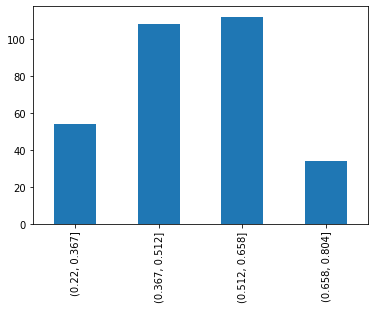

In [51]:
irs_2014['% menor 5k'].value_counts(bins=4, sort=False).plot(kind='bar')

In [52]:
irs_2014_out.to_csv('irs_2014_out.csv')

## 2015 

fix parish to municipalities
fix codes

In [53]:
url_2015="/content/drive/Shareddrives/Reliable Project/Data/Outputs - IRS.zip (Unzipped Files)/IRS2015_rendimentos_freguesia.csv"
url_2015 = pd.read_csv(url_2015, header=0, sep=",", encoding = "ISO-8859-1") 

In [54]:
url_2015

Unnamed: 0  FREGUESIA_FISCAL FREGUESIA_FISCAL_DSG               x_bins  \
0              1             10121    ÁGUEDA E BORRALHA             (-Inf,0]   
1              2             10121    ÁGUEDA E BORRALHA            (0,5e+03]   
2              3             10121    ÁGUEDA E BORRALHA        (5e+03,1e+04]   
3              4             10121    ÁGUEDA E BORRALHA     (1e+04,1.35e+04]   
4              5             10121    ÁGUEDA E BORRALHA   (1.35e+04,1.9e+04]   
...          ...               ...                  ...                  ...   
3932        3933            221103           S. VICENTE  (2.75e+04,3.25e+04]   
3933        3934            221103           S. VICENTE     (3.25e+04,4e+04]   
3934        3935            221103           S. VICENTE        (4e+04,5e+04]   
3935        3936            221103           S. VICENTE        (5e+04,1e+05]   
3936        3937            221103           S. VICENTE      (1e+05,2.5e+05]   

         n  
0      194  
1     2778  
2     7881  
3     3396  
4     3341  
...    ...  
3932    43  
3933    48  
3934    39  
3935    25  
3936     1  

[3937 rows x 5 columns]

In [55]:
url_2015['FREGUESIA_FISCAL'] = url_2015['FREGUESIA_FISCAL'].astype(str)

In [56]:
url_2015['FREGUESIA_FISCAL'].nunique()

342

In [57]:
url_2015['FREGUESIA_FISCAL'] = url_2015['FREGUESIA_FISCAL'].apply(lambda x: ('0'*(6-len(str(x))))+str(x) if(len(str(x)) < 6) else str(x))

In [58]:
url_2015['FREGUESIA_FISCAL']

0       010121
1       010121
2       010121
3       010121
4       010121
         ...  
3932    221103
3933    221103
3934    221103
3935    221103
3936    221103
Name: FREGUESIA_FISCAL, Length: 3937, dtype: object

In [59]:
url_2015['MUNICIPIO_FISCAL'] = url_2015['FREGUESIA_FISCAL'].str[:4]

In [60]:
url_2015['MUNICIPIO_FISCAL'].nunique()

308

In [61]:
#dict1 = url_2015.groupby('FREGUESIA_FISCAL_DSG')['FREGUESIA_FISCAL'].unique().apply(list).to_dict()

In [62]:
url_2015['MUNICIPIO_FISCAL_DSG'] = url_2015['MUNICIPIO_FISCAL'].map(dictionary_codes_mun) 

In [63]:
url_2015

Unnamed: 0 FREGUESIA_FISCAL FREGUESIA_FISCAL_DSG               x_bins  \
0              1           010121    ÁGUEDA E BORRALHA             (-Inf,0]   
1              2           010121    ÁGUEDA E BORRALHA            (0,5e+03]   
2              3           010121    ÁGUEDA E BORRALHA        (5e+03,1e+04]   
3              4           010121    ÁGUEDA E BORRALHA     (1e+04,1.35e+04]   
4              5           010121    ÁGUEDA E BORRALHA   (1.35e+04,1.9e+04]   
...          ...              ...                  ...                  ...   
3932        3933           221103           S. VICENTE  (2.75e+04,3.25e+04]   
3933        3934           221103           S. VICENTE     (3.25e+04,4e+04]   
3934        3935           221103           S. VICENTE        (4e+04,5e+04]   
3935        3936           221103           S. VICENTE        (5e+04,1e+05]   
3936        3937           221103           S. VICENTE      (1e+05,2.5e+05]   

         n MUNICIPIO_FISCAL MUNICIPIO_FISCAL_DSG  
0      194             0101               AGUEDA  
1     2778             0101               AGUEDA  
2     7881             0101               AGUEDA  
3     3396             0101               AGUEDA  
4     3341             0101               AGUEDA  
...    ...              ...                  ...  
3932    43             2211           S. VICENTE  
3933    48             2211           S. VICENTE  
3934    39             2211           S. VICENTE  
3935    25             2211           S. VICENTE  
3936     1             2211           S. VICENTE  

[3937 rows x 7 columns]

In [64]:
url_2015['MUNICIPIO_CENSUS'] = url_2015['MUNICIPIO_FISCAL_DSG'].map(dictionary)

In [65]:
pd.pivot_table(url_2015, values="n", index=["MUNICIPIO_FISCAL_DSG",'MUNICIPIO_CENSUS'], columns=["x_bins"])

x_bins                                   (-Inf,0]  (0,5e+03]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                          
ABRANTES             Abrantes               139.0     2361.0   
AGUEDA               Águeda                 194.0     2778.0   
AGUIAR DA BEIRA      Aguiar da Beira         81.0      424.0   
ALANDROAL            Alandroal               26.0      447.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha     138.0     1511.0   
...                                           ...        ...   
VIMIOSO              Vimioso                146.0      378.0   
VINHAIS              Vinhais                236.0      733.0   
VISEU                Viseu                  546.0     5991.0   
VIZELA               Vizela                  55.0     1536.0   
VOUZELA              Vouzela                 82.0      667.0   

x_bins                                   (1.35e+04,1.9e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                         
ABRANTES             Abrantes                        2360.0   
AGUEDA               Águeda                          3341.0   
AGUIAR DA BEIRA      Aguiar da Beira                  275.0   
ALANDROAL            Alandroal                        354.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha              1771.0   
...                                                     ...   
VIMIOSO              Vimioso                          228.0   
VINHAIS              Vinhais                          358.0   
VISEU                Viseu                           5664.0   
VIZELA               Vizela                          2147.0   
VOUZELA              Vouzela                          602.0   

x_bins                                   (1.9e+04,2.75e+04]  (1e+04,1.35e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                                           
ABRANTES             Abrantes                        1980.0            2862.0   
AGUEDA               Águeda                          2576.0            3396.0   
AGUIAR DA BEIRA      Aguiar da Beira                  146.0             334.0   
ALANDROAL            Alandroal                        232.0             507.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha              1494.0            1838.0   
...                                                     ...               ...   
VIMIOSO              Vimioso                          192.0             266.0   
VINHAIS              Vinhais                          332.0             446.0   
VISEU                Viseu                           5510.0            5558.0   
VIZELA               Vizela                           996.0            1803.0   
VOUZELA              Vouzela                          479.0             600.0   

x_bins                                   (1e+05,2.5e+05]  (2.5e+05, Inf]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                                      
ABRANTES             Abrantes                       53.0             2.0   
AGUEDA               Águeda                         95.0             9.0   
AGUIAR DA BEIRA      Aguiar da Beira                 3.0             NaN   
ALANDROAL            Alandroal                       2.0             NaN   
ALBERGARIA-A-VELHA   Albergaria-a-Velha             25.0             NaN   
...                                                  ...             ...   
VIMIOSO              Vimioso                         3.0             NaN   
VINHAIS              Vinhais                         2.0             NaN   
VISEU                Viseu                         265.0             7.0   
VIZELA               Vizela                         28.0             NaN   
VOUZELA              Vouzela                         7.0             NaN   

x_bins                                   (2.75e+04,3.25e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                          
ABRANTES             Abrantes                          576.0   
AGUEDA               Águeda                            670.0   
AGUIAR DA BEIRA      Aguiar da Beira            

In [66]:
irs_2015_out = pd.pivot_table(url_2015, values="n", index=["MUNICIPIO_FISCAL_DSG",'MUNICIPIO_CENSUS'], columns=["x_bins"])

In [67]:
irs_2015_out.to_csv('irs_2015_out.csv')

## 2016

In [68]:
url_2016="/content/drive/Shareddrives/Reliable Project/Data/Outputs - IRS.zip (Unzipped Files)/IRS2016_rendimentos_freguesia.csv"
url_2016 = pd.read_csv(url_2016, header=0, sep=",", encoding = "ISO-8859-1") 

In [69]:
url_2016

Unnamed: 0  FREGUESIA_FISCAL FREGUESIA_FISCAL_DSG               x_bins  \
0              1             10121    ÁGUEDA E BORRALHA             (-Inf,0]   
1              2             10121    ÁGUEDA E BORRALHA            (0,5e+03]   
2              3             10121    ÁGUEDA E BORRALHA        (5e+03,1e+04]   
3              4             10121    ÁGUEDA E BORRALHA     (1e+04,1.35e+04]   
4              5             10121    ÁGUEDA E BORRALHA   (1.35e+04,1.9e+04]   
...          ...               ...                  ...                  ...   
3945        3946            221103           S. VICENTE  (2.75e+04,3.25e+04]   
3946        3947            221103           S. VICENTE     (3.25e+04,4e+04]   
3947        3948            221103           S. VICENTE        (4e+04,5e+04]   
3948        3949            221103           S. VICENTE        (5e+04,1e+05]   
3949        3950            221103           S. VICENTE      (1e+05,2.5e+05]   

         n  
0      180  
1     2508  
2     7707  
3     3626  
4     3329  
...    ...  
3945    55  
3946    47  
3947    43  
3948    27  
3949     2  

[3950 rows x 5 columns]

In [70]:
url_2016['FREGUESIA_FISCAL'] = url_2016['FREGUESIA_FISCAL'].astype(str)

In [71]:
url_2016['FREGUESIA_FISCAL'] = url_2016['FREGUESIA_FISCAL'].apply(lambda x: ('0'*(6-len(str(x))))+str(x) if(len(str(x)) < 6) else str(x))

In [72]:
url_2016['MUNICIPIO_FISCAL'] = url_2016['FREGUESIA_FISCAL'].str[:4]

In [73]:
url_2016['MUNICIPIO_FISCAL_DSG'] = url_2016['MUNICIPIO_FISCAL'].map(dictionary_codes_mun) 

In [74]:
url_2016['MUNICIPIO_CENSUS'] = url_2016['MUNICIPIO_FISCAL_DSG'].map(dictionary)

In [75]:
pd.pivot_table(url_2016, values="n", index=["MUNICIPIO_FISCAL_DSG",'MUNICIPIO_CENSUS'], columns=["x_bins"])

x_bins                                   (-Inf,0]  (0,5e+03]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                          
ABRANTES             Abrantes               113.0     2118.0   
AGUEDA               Águeda                 180.0     2508.0   
AGUIAR DA BEIRA      Aguiar da Beira         77.0      332.0   
ALANDROAL            Alandroal               29.0      358.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha     117.0     1415.0   
...                                           ...        ...   
VIMIOSO              Vimioso                126.0      331.0   
VINHAIS              Vinhais                210.0      679.0   
VISEU                Viseu                  507.0     5590.0   
VIZELA               Vizela                  47.0     1359.0   
VOUZELA              Vouzela                 80.0      550.0   

x_bins                                   (1.35e+04,1.9e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                         
ABRANTES             Abrantes                        2465.0   
AGUEDA               Águeda                          3329.0   
AGUIAR DA BEIRA      Aguiar da Beira                  321.0   
ALANDROAL            Alandroal                        344.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha              1839.0   
...                                                     ...   
VIMIOSO              Vimioso                          248.0   
VINHAIS              Vinhais                          385.0   
VISEU                Viseu                           5926.0   
VIZELA               Vizela                          2173.0   
VOUZELA              Vouzela                          635.0   

x_bins                                   (1.9e+04,2.75e+04]  (1e+04,1.35e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                                           
ABRANTES             Abrantes                        2033.0            2970.0   
AGUEDA               Águeda                          2764.0            3626.0   
AGUIAR DA BEIRA      Aguiar da Beira                  169.0             333.0   
ALANDROAL            Alandroal                        249.0             500.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha              1578.0            1951.0   
...                                                     ...               ...   
VIMIOSO              Vimioso                          186.0             278.0   
VINHAIS              Vinhais                          345.0             504.0   
VISEU                Viseu                           5762.0            5728.0   
VIZELA               Vizela                          1087.0            1878.0   
VOUZELA              Vouzela                          483.0             622.0   

x_bins                                   (1e+05,2.5e+05]  (2.5e+05, Inf]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                                      
ABRANTES             Abrantes                       53.0             3.0   
AGUEDA               Águeda                        106.0             8.0   
AGUIAR DA BEIRA      Aguiar da Beira                 3.0             NaN   
ALANDROAL            Alandroal                       2.0             1.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha             33.0             NaN   
...                                                  ...             ...   
VIMIOSO              Vimioso                         3.0             NaN   
VINHAIS              Vinhais                         1.0             NaN   
VISEU                Viseu                         311.0             3.0   
VIZELA               Vizela                         28.0             2.0   
VOUZELA              Vouzela                         7.0             NaN   

x_bins                                   (2.75e+04,3.25e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                          
ABRANTES             Abrantes                          585.0   
AGUEDA               Águeda                            726.0   
AGUIAR DA BEIRA      Aguiar da Beira            

In [76]:
irs_2016_out = pd.pivot_table(url_2016, values="n", index=["MUNICIPIO_FISCAL_DSG",'MUNICIPIO_CENSUS'], columns=["x_bins"])

In [77]:
irs_2016_out.to_csv('irs_2016_out.csv')

## 2017

In [78]:
url_2017="/content/drive/Shareddrives/Reliable Project/Data/Outputs - IRS.zip (Unzipped Files)/IRS2017_rendimentos_freguesia.csv"
url_2017 = pd.read_csv(url_2017, header=0, sep=",", encoding = "ISO-8859-1") 

In [79]:
url_2017['FREGUESIA_FISCAL'] = url_2017['FREGUESIA_FISCAL'].astype(str)

In [80]:
url_2017['FREGUESIA_FISCAL'] = url_2017['FREGUESIA_FISCAL'].apply(lambda x: ('0'*(6-len(str(x))))+str(x) if(len(str(x)) < 6) else str(x))

In [81]:
url_2017['MUNICIPIO_FISCAL'] = url_2017['FREGUESIA_FISCAL'].str[:4]

In [82]:
url_2017['MUNICIPIO_FISCAL_DSG'] = url_2017['MUNICIPIO_FISCAL'].map(dictionary_codes_mun) 

In [83]:
url_2017['MUNICIPIO_CENSUS'] = url_2017['MUNICIPIO_FISCAL_DSG'].map(dictionary)

In [84]:
pd.pivot_table(url_2017, values="n", index=["MUNICIPIO_FISCAL_DSG",'MUNICIPIO_CENSUS'], columns=["x_bins"])

x_bins                                   (-Inf,0]  (0,5e+03]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                          
ABRANTES             Abrantes               100.0     1896.0   
AGUEDA               Águeda                 174.0     2456.0   
AGUIAR DA BEIRA      Aguiar da Beira         69.0      329.0   
ALANDROAL            Alandroal               30.0      309.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha     101.0     1327.0   
...                                           ...        ...   
VIMIOSO              Vimioso                120.0      324.0   
VINHAIS              Vinhais                234.0      663.0   
VISEU                Viseu                  490.0     5308.0   
VIZELA               Vizela                  45.0     1236.0   
VOUZELA              Vouzela                 71.0      539.0   

x_bins                                   (1.35e+04,1.9e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                         
ABRANTES             Abrantes                        2541.0   
AGUEDA               Águeda                          3383.0   
AGUIAR DA BEIRA      Aguiar da Beira                  329.0   
ALANDROAL            Alandroal                        363.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha              1845.0   
...                                                     ...   
VIMIOSO              Vimioso                          244.0   
VINHAIS              Vinhais                          404.0   
VISEU                Viseu                           6068.0   
VIZELA               Vizela                          2163.0   
VOUZELA              Vouzela                          638.0   

x_bins                                   (1.9e+04,2.75e+04]  (1e+04,1.35e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                                           
ABRANTES             Abrantes                        2127.0            2968.0   
AGUEDA               Águeda                          2974.0            3796.0   
AGUIAR DA BEIRA      Aguiar da Beira                  195.0             336.0   
ALANDROAL            Alandroal                        296.0             531.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha              1690.0            1980.0   
...                                                     ...               ...   
VIMIOSO              Vimioso                          214.0             284.0   
VINHAIS              Vinhais                          357.0             512.0   
VISEU                Viseu                           6082.0            5869.0   
VIZELA               Vizela                          1257.0            1977.0   
VOUZELA              Vouzela                          501.0             696.0   

x_bins                                   (1e+05,2.5e+05]  (2.5e+05, Inf]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                                      
ABRANTES             Abrantes                       56.0             NaN   
AGUEDA               Águeda                        126.0             9.0   
AGUIAR DA BEIRA      Aguiar da Beira                 3.0             NaN   
ALANDROAL            Alandroal                       5.0             NaN   
ALBERGARIA-A-VELHA   Albergaria-a-Velha             30.0             NaN   
...                                                  ...             ...   
VIMIOSO              Vimioso                         3.0             NaN   
VINHAIS              Vinhais                         3.0             NaN   
VISEU                Viseu                         339.0             8.0   
VIZELA               Vizela                         29.0             3.0   
VOUZELA              Vouzela                         7.0             NaN   

x_bins                                   (2.75e+04,3.25e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                          
ABRANTES             Abrantes                          667.0   
AGUEDA               Águeda                            802.0   
AGUIAR DA BEIRA      Aguiar da Beira            

In [85]:
irs_2017_out = pd.pivot_table(url_2017, values="n", index=["MUNICIPIO_FISCAL_DSG",'MUNICIPIO_CENSUS'], columns=["x_bins"])

In [86]:
irs_2017_out.to_csv('irs_2017_out.csv')

## 2018

In [87]:
url_2018="/content/drive/Shareddrives/Reliable Project/Data/Outputs - IRS.zip (Unzipped Files)/IRS2018_rendimentos_freguesia.csv"
url_2018 = pd.read_csv(url_2018, header=0, sep=",", encoding = "ISO-8859-1") 

In [88]:
url_2018['FREGUESIA_FISCAL'] = url_2018['FREGUESIA_FISCAL'].astype(str)

In [89]:
url_2018['FREGUESIA_FISCAL'] = url_2018['FREGUESIA_FISCAL'].apply(lambda x: ('0'*(6-len(str(x))))+str(x) if(len(str(x)) < 6) else str(x))

In [90]:
url_2018['MUNICIPIO_FISCAL'] = url_2018['FREGUESIA_FISCAL'].str[:4]

In [91]:
url_2018['MUNICIPIO_FISCAL_DSG'] = url_2018['MUNICIPIO_FISCAL'].map(dictionary_codes_mun) 

In [92]:
url_2018['MUNICIPIO_CENSUS'] = url_2018['MUNICIPIO_FISCAL_DSG'].map(dictionary)

In [93]:
pd.pivot_table(url_2018, values="n", index=["MUNICIPIO_FISCAL_DSG",'MUNICIPIO_CENSUS'], columns=["x_bins"])

x_bins                                   (-Inf,0]  (0,5e+03]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                          
ABRANTES             Abrantes               113.0     1672.0   
AGUEDA               Águeda                 185.0     2216.0   
AGUIAR DA BEIRA      Aguiar da Beira         66.0      334.0   
ALANDROAL            Alandroal               29.0      255.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha      81.0     1287.0   
...                                           ...        ...   
VIMIOSO              Vimioso                112.0      310.0   
VINHAIS              Vinhais                200.0      605.0   
VISEU                Viseu                  470.0     4974.0   
VIZELA               Vizela                  36.0     1099.0   
VOUZELA              Vouzela                 57.0      503.0   

x_bins                                   (1.35e+04,1.9e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                         
ABRANTES             Abrantes                        2653.0   
AGUEDA               Águeda                          3522.0   
AGUIAR DA BEIRA      Aguiar da Beira                  344.0   
ALANDROAL            Alandroal                        400.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha              1949.0   
...                                                     ...   
VIMIOSO              Vimioso                          254.0   
VINHAIS              Vinhais                          420.0   
VISEU                Viseu                           6366.0   
VIZELA               Vizela                          2200.0   
VOUZELA              Vouzela                          659.0   

x_bins                                   (1.9e+04,2.75e+04]  (1e+04,1.35e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                                           
ABRANTES             Abrantes                        2164.0            3088.0   
AGUEDA               Águeda                          3129.0            4133.0   
AGUIAR DA BEIRA      Aguiar da Beira                  208.0             342.0   
ALANDROAL            Alandroal                        295.0             556.0   
ALBERGARIA-A-VELHA   Albergaria-a-Velha              1763.0            2115.0   
...                                                     ...               ...   
VIMIOSO              Vimioso                          217.0             317.0   
VINHAIS              Vinhais                          379.0             555.0   
VISEU                Viseu                           6346.0            6369.0   
VIZELA               Vizela                          1329.0            2118.0   
VOUZELA              Vouzela                          528.0             757.0   

x_bins                                   (1e+05,2.5e+05]  (2.5e+05, Inf]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                                      
ABRANTES             Abrantes                       57.0             2.0   
AGUEDA               Águeda                        132.0            13.0   
AGUIAR DA BEIRA      Aguiar da Beira                 5.0             NaN   
ALANDROAL            Alandroal                       4.0             NaN   
ALBERGARIA-A-VELHA   Albergaria-a-Velha             32.0             NaN   
...                                                  ...             ...   
VIMIOSO              Vimioso                         3.0             NaN   
VINHAIS              Vinhais                         2.0             NaN   
VISEU                Viseu                         369.0            12.0   
VIZELA               Vizela                         32.0             4.0   
VOUZELA              Vouzela                         7.0             NaN   

x_bins                                   (2.75e+04,3.25e+04]  \
MUNICIPIO_FISCAL_DSG MUNICIPIO_CENSUS                          
ABRANTES             Abrantes                          690.0   
AGUEDA               Águeda                            900.0   
AGUIAR DA BEIRA      Aguiar da Beira            

In [94]:
irs_2018_out = pd.pivot_table(url_2018, values="n", index=["MUNICIPIO_FISCAL_DSG",'MUNICIPIO_CENSUS'], columns=["x_bins"])

In [95]:
irs_2018 = irs_2018_out.copy()
irs_2018 = irs_2018.fillna(0)

In [96]:
irs_2018['Menos de 5 000 euros'] = irs_2018['(-Inf,0]'] + irs_2018['(0,5e+03]']
irs_2018['De 19 000 a menos de 32 500 euros'] = irs_2018['(1.9e+04,2.75e+04]'] + irs_2018['(2.75e+04,3.25e+04]']
irs_2018['32 500 euros ou mais'] = irs_2018['(3.25e+04,4e+04]'] + irs_2018['(4e+04,5e+04]'] + irs_2018['(5e+04,1e+05]'] + irs_2018['(1e+05,2.5e+05]'] + irs_2018['(2.5e+05, Inf]']

In [97]:
irs_2018['Total'] = irs_2018['Menos de 5 000 euros'] + irs_2018['De 19 000 a menos de 32 500 euros'] + irs_2018['32 500 euros ou mais']

In [98]:
irs_2018['% menor 5k'] = irs_2018['Menos de 5 000 euros'] / irs_2018['Total']

In [99]:
irs_2018.groupby('MUNICIPIO_FISCAL_DSG')['% menor 5k'].sum()

MUNICIPIO_FISCAL_DSG
ABRANTES              0.272270
AGUEDA                0.275344
AGUIAR DA BEIRA       0.522193
ALANDROAL             0.376159
ALBERGARIA-A-VELHA    0.286133
                        ...   
VIMIOSO               0.517157
VINHAIS               0.547247
VISEU                 0.259213
VIZELA                0.322352
VOUZELA               0.371107
Name: % menor 5k, Length: 308, dtype: float64

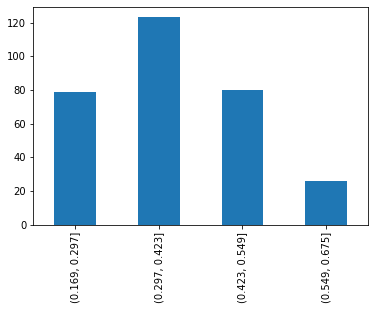

In [100]:
irs_2018['% menor 5k'].value_counts(bins=4, sort=False).plot(kind='bar')

In [101]:
#irs_2018_out.to_csv('irs_2018_out.csv')

In [102]:
#irs_2018_out

In [103]:
censosmunicipio

ANO GEO_COD            GEO_COD_DSG  NIVEL  NIVEL_DSG  \
41   2011    0101                 Águeda      5  Municipio   
42   2011    0102     Albergaria-a-Velha      5  Municipio   
43   2011    0103                 Anadia      5  Municipio   
44   2011    0104                 Arouca      5  Municipio   
45   2011    0105                 Aveiro      5  Municipio   
..    ...     ...                    ...    ...        ...   
344  2011    4603      São Roque do Pico      5  Municipio   
345  2011    4701                  Horta      5  Municipio   
346  2011    4801       Lajes das Flores      5  Municipio   
347  2011    4802  Santa Cruz das Flores      5  Municipio   
348  2011    4901                  Corvo      5  Municipio   

     N_EDIFICIOS_CLASSICOS  N_EDIFICIOS_CLASSICOS_1OU2  \
41                   18572                       17839   
42                   10140                        9461   
43                   12977                       12617   
44                    9967                        9798   
45                   22817                       20329   
..                     ...                         ...   
344                   2248                        2219   
345                   6447                        6291   
346                    991                         982   
347                   1106                        1088   
348                    181                         177   

     N_EDIFICIOS_CLASSICOS_ISOLADOS   N_EDIFICIOS_CLASSICOS_GEMIN  \
41                             13481                         2274   
42                              7632                          909   
43                              9673                         1492   
44                              9019                          510   
45                             10511                         4327   
..                               ...                          ...   
344                             2154                           45   
345                             4802                          325   
346                              879                          103   
347                              947                          120   
348                              112                           65   

     N_EDIFICIOS_CLASSICOS_EMBANDA  ...  N_IND_RESID_DESEMP_PROC_EMPRG  \
41                            2084  ...                           1960   
42                             920  ...                           1040   
43                            1452  ...                           1068   
44                             269  ...                            632   
45                            5491  ...                           3516   
..                             ...  ...                            ...   
344                             20  ...                             83   
345                           1164  ...                            507   
346                              0  ...                             28   
347                             21  ...                             69   
348                              0  ...                             12   

     N_IND_RESID_EMPREGADOS  N_IND_RESID_PENS_REFORM  \
41                    20999                    10441   
42                    10840                     5135   
43                    12194                     7164   
44                     9146                     4645   
45                    35791                    15045   
..                      ...                      ...   
344                    1402                      771   
345                    6822                     2851   
346                     645                      313   
347                    1000                      479   
348                     237                       61   

     N_IND_RESID_SEM_ACT_ECON  N_IND_RESID_EMPREG_SECT_PRIM  \
41                      17730                           291   
42                       9262                  

In [104]:
result = pd.merge(censosmunicipio, irs_2018, how="left", left_on=['GEO_COD_DSG'], right_on=['MUNICIPIO_CENSUS']) 

In [105]:
result.tail()

ANO GEO_COD            GEO_COD_DSG  NIVEL  NIVEL_DSG  \
303  2011    4603      São Roque do Pico      5  Municipio   
304  2011    4701                  Horta      5  Municipio   
305  2011    4801       Lajes das Flores      5  Municipio   
306  2011    4802  Santa Cruz das Flores      5  Municipio   
307  2011    4901                  Corvo      5  Municipio   

     N_EDIFICIOS_CLASSICOS  N_EDIFICIOS_CLASSICOS_1OU2  \
303                   2248                        2219   
304                   6447                        6291   
305                    991                         982   
306                   1106                        1088   
307                    181                         177   

     N_EDIFICIOS_CLASSICOS_ISOLADOS   N_EDIFICIOS_CLASSICOS_GEMIN  \
303                             2154                           45   
304                             4802                          325   
305                              879                          103   
306                              947                          120   
307                              112                           65   

     N_EDIFICIOS_CLASSICOS_EMBANDA  ...  (2.75e+04,3.25e+04]  \
303                             20  ...                 61.0   
304                           1164  ...                313.0   
305                              0  ...                 27.0   
306                             21  ...                 52.0   
307                              0  ...                  9.0   

     (3.25e+04,4e+04]  (4e+04,5e+04]  (5e+03,1e+04]  (5e+04,1e+05]  \
303              45.0           58.0          518.0           56.0   
304             342.0          277.0         2072.0          341.0   
305              19.0           13.0          251.0           22.0   
306              44.0           25.0          348.0           27.0   
307               6.0            5.0           60.0            7.0   

     Menos de 5 000 euros  De 19 000 a menos de 32 500 euros  \
303                 302.0                              240.0   
304                1002.0                             1329.0   
305                 147.0                               97.0   
306                 200.0                              197.0   
307                  37.0                               48.0   

     32 500 euros ou mais   Total  % menor 5k  
303                 166.0   708.0    0.426554  
304                1040.0  3371.0    0.297241  
305                  57.0   301.0    0.488372  
306                 103.0   500.0    0.400000  
307                  20.0   105.0    0.352381  

[5 rows x 145 columns]

In [106]:
url ='https://docs.google.com/spreadsheets/d/1bh0yqsu3yR-yrc0mlDv6tjdaanr9qV1h/export?format=csv&gid=150359953'
iefp= pd.read_csv(url) 

In [107]:
import pandas as pd
pop_url  = 'https://docs.google.com/spreadsheets/d/1_e8CtxVBZHwxVtNG_-vexEmLrgu0Ce_MHOXC76-IncY/export?format=csv&gid=920606204'
pop = pd.read_csv(pop_url)
pop

Name     Code         Geo     Total  0 - 14 anos  \
0              Portugal       PT         all  10295909      1396985   
1            Continente        1  continente   9798859      1326347   
2                 Norte       11      regiao   3575338       451624   
3            Alto Minho      111      regiao    230412        25857   
4     Arcos de Valdevez  1111601   municipio     20926         1994   
...                 ...      ...         ...       ...          ...   
3091        Porto Santo  3003201   municipio      5385          825   
3092      Ribeira Brava  3003107   municipio     13144         2372   
3093         Santa Cruz  3003108   municipio     43086         8207   
3094            Santana  3003109   municipio      7543          971   
3095        São Vicente  3003110   municipio      5589          767   

      15 - 24 anos  25 - 64 anos  65 e mais anos  65 - 74 anos  \
0          1095766       5522734         2280424       1172503   
1          1033312       5238230         2200970       1127988   
2           395661       1979268          748785        400558   
3            23501        122682           58372         27081   
4             1944         10181            6807          2667   
...            ...           ...             ...           ...   
3091           720          3204             636           353   
3092          1693          7045            2034          1044   
3093          4948         25653            4278          2356   
3094           844          3954            1774           831   
3095           697          2802            1323           636   

      75 e mais anos  Year  
0            1107921  2019  
1            1072982  2019  
2             348227  2019  
3              31291  2019  
4               4140  2019  
...              ...   ...  
3091             283  2011  
3092             990  2011  
3093            1922  2011  
3094             943  2011  
3095             687  2011  

[3096 rows x 11 columns]

# Tarifa

In [108]:
import pandas as pd
tarifa="/content/drive/Shareddrives/Reliable Project/Data/DGEG/TarifaSocial - Distribuição geográfica - 2022-02-21.xlsx"
tar_elec_dez_16 = pd.read_excel(tarifa, sheet_name='Electricidade -Dezembro 2016')

In [109]:
tar_elec_dez_16 = tar_elec_dez_16[['Distrito','Concelho','Total']]
tar_elec_dez_16 = tar_elec_dez_16.rename(columns={"Total": "2016"})

In [110]:
tar_elec_dez_17 = pd.read_excel(tarifa, 'Eletricidade - Dezembro 2017')
tar_elec_dez_17 = tar_elec_dez_17[['Distrito','Concelho','Total']]
tar_elec_dez_17 = tar_elec_dez_17.rename(columns={"Total": "2017"})

In [111]:
tar_elec_dez_18 = pd.read_excel(tarifa, 'Eletricidade - Dezembro 2018')
tar_elec_dez_18 = tar_elec_dez_18[['Distrito','Concelho','Total']]
tar_elec_dez_18 = tar_elec_dez_18.rename(columns={"Total": "2018"})

In [112]:
tar_elec_dez_19 = pd.read_excel(tarifa, 'Eletricidade - Dezembro 2019')
tar_elec_dez_19 = tar_elec_dez_19[['Distrito','Concelho','Total']]
tar_elec_dez_19 = tar_elec_dez_19.rename(columns={"Total": "2019"})

In [113]:
tar_elec_dez_20 = pd.read_excel(tarifa, 'Eletricidade - Dezembro 2020')
tar_elec_dez_20 = tar_elec_dez_20[['Distrito','Concelho','Total']]
tar_elec_dez_20 = tar_elec_dez_20.rename(columns={"Total": "2020"})

In [114]:
tar_elec_dez_21 = pd.read_excel(tarifa, 'EE - dez2021')
tar_elec_dez_21 = tar_elec_dez_21[['Distrito','Concelho','Total']]
tar_elec_dez_21 = tar_elec_dez_21.rename(columns={"Total": "2021"})

In [115]:
dfs = [df.set_index(['Distrito', 'Concelho']) for df in [tar_elec_dez_16, tar_elec_dez_17, tar_elec_dez_18, tar_elec_dez_19, tar_elec_dez_20, tar_elec_dez_21]]

tarifa_eletricidade = pd.concat(dfs, axis=1).reset_index()

In [116]:

tarifa_eletricidade

Distrito               Concelho  2016  2017  2018  2019  2020  2021
0     AVEIRO     ALBERGARIA-A-VELHA  1734  1690  1631  1615  1565  1538
1     AVEIRO                 ANADIA  2247  2249  2144  2188  2041  2013
2     AVEIRO                 AROUCA  1586  1564  1403  1354  1292  1209
3     AVEIRO                 AVEIRO  5199  5032  5022  5304  5164  5242
4     AVEIRO       CASTELO DE PAIVA  1150  1171  1122  1089  1044  1018
..       ...                    ...   ...   ...   ...   ...   ...   ...
273    ÉVORA  REGUENGOS DE MONSARAZ   847   795   775   750   685   681
274    ÉVORA           VENDAS NOVAS   795   783   785   751   716   683
275    ÉVORA      VIANA DO ALENTEJO   428   425   423   403   364   331
276    ÉVORA            VILA VIÇOSA   535   559   557   529   485   455
277    ÉVORA                  ÉVORA  3023  2971  2936  3040  2902  2915

[278 rows x 8 columns]

In [117]:
tar_gn_dez_16 = pd.read_excel(tarifa, 'Gas -Dezembro 2016')
tar_gn_dez_16 = tar_gn_dez_16[['Distrito','Concelho','Total']]
tar_gn_dez_16 = tar_gn_dez_16.rename(columns={"Total": "2016"})

#CDD and HDD

* ['hdd'] = np.maximum(0, (18 - ['T'])) #base at 18.º 
* ['cdd'] = np.maximum(0, (ponta_delgada['T'])-18) #base at 18.º 
* ['hot'] = [1 if x > 32 else 0 for x in (Penhas_Douradas_hour['T'])] 
* ['cold'] = [1 if x < 15 else 0 for x in (Penhas_Douradas_hour['T'])] 


In [118]:
import pandas as pd
cdd="/content/drive/Shareddrives/Reliable Project/Data/allresults.csv"
cdd = pd.read_csv(cdd, header=0, sep=",") 

In [119]:
cdd['year'] = cdd['year'].str[:4]

In [120]:
cdd2019 = cdd[cdd['year'] == '2019'] 

In [121]:
cdd2019

Município   Distrito/Ilha              station          T  \
2464             Abrantes        Santarém         8537_Alverca   12241.80   
2465             Alcanena        Santarém         8537_Alverca   12241.80   
2466             Almeirim        Santarém         8537_Alverca   12241.80   
2467             Alpiarça        Santarém         8537_Alverca   12241.80   
2468            Benavente        Santarém         8537_Alverca   12241.80   
...                   ...             ...                  ...        ...   
2767       Proença-a-Nova  Castelo Branco  8570_castelo_branco  142249.85   
2768                Sertã  Castelo Branco  8570_castelo_branco  142249.85   
2769  Vila Velha de Rodão  Castelo Branco  8570_castelo_branco  142249.85   
2770          Vila de Rei  Castelo Branco  8570_castelo_branco  142249.85   
2771          Porto Santo         Madeira         8522_funchal  175570.85   

           hdd       cdd  hot  cold  year  
2464   1340.70   1918.50   17   181  2019  
2465   1340.70   1918.50   17   181  2019  
2466   1340.70   1918.50   17   181  2019  
2467   1340.70   1918.50   17   181  2019  
2468   1340.70   1918.50   17   181  2019  
...        ...       ...  ...   ...   ...  
2767  35197.15  20163.00  270  4254  2019  
2768  35197.15  20163.00  270  4254  2019  
2769  35197.15  20163.00  270  4254  2019  
2770  35197.15  20163.00  270  4254  2019  
2771   4052.50  22411.35    1   318  2019  

[308 rows x 9 columns]

In [122]:
 mergecdd = pd.merge(censosmunicipio_select, cdd2019, how='left', left_on=['GEO_COD_DSG'], right_on=['Município'])

In [123]:
 mergecdd

GEO_COD            GEO_COD_DSG  N_EDIFICIOS_CLASSICOS  \
0      0101                 Águeda                  18572   
1      0102     Albergaria-a-Velha                  10140   
2      0103                 Anadia                  12977   
3      0104                 Arouca                   9967   
4      0105                 Aveiro                  22817   
..      ...                    ...                    ...   
303    4603      São Roque do Pico                   2248   
304    4701                  Horta                   6447   
305    4801       Lajes das Flores                    991   
306    4802  Santa Cruz das Flores                   1106   
307    4901                  Corvo                    181   

     N_EDIFICIOS_CONSTR_ANTES_1919  N_EDIFICIOS_CONSTR_1919A1945  \
0                              769                          1383   
1                              771                           862   
2                              472                          1094   
3                              594                           805   
4                             1210                          1485   
..                             ...                           ...   
303                            122                           201   
304                            418                           408   
305                            217                           171   
306                            189                           135   
307                             90                            26   

     N_EDIFICIOS_CONSTR_1946A1960  N_EDIFICIOS_CONSTR_1961A1970  \
0                            1954                          2237   
1                            1064                          1109   
2                            1638                          1852   
3                             856                           854   
4                            2408                          2617   
..                            ...                           ...   
303                           194                           123   
304                           478                           402   
305                           107                            73   
306                           110                            74   
307                            13                             6   

     N_EDIFICIOS_CONSTR_1971A1980  N_EDIFICIOS_CONSTR_1981A1990  \
0                            3473                          3355   
1                            1619                          1507   
2                            2393                          2204   
3                            1283                          1633   
4                            3893                          3850   
..                            ...                           ...   
303                           277                           350   
304                           436                           719   
305                            85                            58   
306                            88                           151   
307                             5                            13   

     N_EDIFICIOS_CONSTR_1991A1995  ...  N_FAMILIAS_CLASSIC_1DESEMPREG  \
0                            1393  ...                           1885   
1                             698  ...                           1023   
2                             844  ...                           1035   
3                             915  ...                            690   
4                            1921  ...                           3402   
..                            ...  ...                            ...   
303                           206  ...                             82   
304                           430  ...                            510   
305                            55  ...                             34   
306                            80  ...                             74   
307                             5  ...   

#Population

População residente (N.º) por Local de residência (NUTS - 2013), Sexo e Grupo etário (Por ciclos de vida); Anual

INE, Estimativas anuais da população residente

all and + 65

(same as https://github.com/INmais/LEIS-2001-collaborative-project/blob/main/Mobility/Metadata.md)

https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_indicadores&indOcorrCod=0008272&contexto=bd&selTab=tab2&xlang=PT

Desagrega 65 ou +

In [124]:
import pandas as pd
pop_url  = 'https://docs.google.com/spreadsheets/d/1_e8CtxVBZHwxVtNG_-vexEmLrgu0Ce_MHOXC76-IncY/export?format=csv&gid=920606204'
pop = pd.read_csv(pop_url)
pop

Name     Code         Geo     Total  0 - 14 anos  \
0              Portugal       PT         all  10295909      1396985   
1            Continente        1  continente   9798859      1326347   
2                 Norte       11      regiao   3575338       451624   
3            Alto Minho      111      regiao    230412        25857   
4     Arcos de Valdevez  1111601   municipio     20926         1994   
...                 ...      ...         ...       ...          ...   
3091        Porto Santo  3003201   municipio      5385          825   
3092      Ribeira Brava  3003107   municipio     13144         2372   
3093         Santa Cruz  3003108   municipio     43086         8207   
3094            Santana  3003109   municipio      7543          971   
3095        São Vicente  3003110   municipio      5589          767   

      15 - 24 anos  25 - 64 anos  65 e mais anos  65 - 74 anos  \
0          1095766       5522734         2280424       1172503   
1          1033312       5238230         2200970       1127988   
2           395661       1979268          748785        400558   
3            23501        122682           58372         27081   
4             1944         10181            6807          2667   
...            ...           ...             ...           ...   
3091           720          3204             636           353   
3092          1693          7045            2034          1044   
3093          4948         25653            4278          2356   
3094           844          3954            1774           831   
3095           697          2802            1323           636   

      75 e mais anos  Year  
0            1107921  2019  
1            1072982  2019  
2             348227  2019  
3              31291  2019  
4               4140  2019  
...              ...   ...  
3091             283  2011  
3092             990  2011  
3093            1922  2011  
3094             943  2011  
3095             687  2011  

[3096 rows x 11 columns]

In [125]:
pop_Mun	= pop[pop['Geo'] == 'municipio'] 

In [126]:
pop_Mun.drop(['65 - 74 anos', '75 e mais anos'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [127]:
pop_Mun[pop_Mun['Name'].str.contains("Lagoa")]

Name     Code        Geo  Total  0 - 14 anos  15 - 24 anos  \
297   Lagoa  1500806  municipio  22762         3292          2552   
315   Lagoa  2004201  municipio  14721         2471          2116   
641   Lagoa  1500806  municipio  22748         3311          2529   
659   Lagoa  2004201  municipio  14681         2551          2126   
985   Lagoa  1500806  municipio  22753         3311          2496   
1003  Lagoa  2004201  municipio  14693         2629          2141   
1329  Lagoa  1500806  municipio  22799         3361          2486   
1347  Lagoa  2004201  municipio  14728         2692          2185   
1673  Lagoa  1500806  municipio  22787         3387          2470   
1691  Lagoa  2004201  municipio  14681         2740          2211   
2017  Lagoa  1500806  municipio  22723         3426          2448   
2035  Lagoa  2004201  municipio  14667         2817          2229   
2361  Lagoa  1500806  municipio  22750         3524          2409   
2379  Lagoa  2004201  municipio  14666         2901          2226   
2705  Lagoa  1500806  municipio  22783         3637          2397   
2723  Lagoa  2004201  municipio  14605         2954          2254   
3049  Lagoa  1500806  municipio  22798         3714          2417   
3067  Lagoa  2004201  municipio  14506         2986          2249   

      25 - 64 anos  65 e mais anos  Year  
297          12098            4820  2019  
315           8318            1816  2019  
641          12152            4756  2018  
659           8216            1788  2018  
985          12228            4718  2017  
1003          8171            1752  2017  
1329         12301            4651  2016  
1347          8149            1702  2016  
1673         12384            4546  2015  
1691          8084            1646  2015  
2017         12402            4447  2014  
2035          8014            1607  2014  
2361         12452            4365  2013  
2379          7962            1577  2013  
2705         12521            4228  2012  
2723          7871            1526  2012  
3049         12558            4109  2011  
3067          7777            1494  2011

In [128]:
pop_Mun_2019 = pop_Mun[pop_Mun['Year'] == 2019] 
#iefp_Mun_2019 = iefp_Mun[['2021']] 

In [129]:
pop_Mun_2019[pop_Mun_2019['Name'] == "Lagoa"] 
pop_Mun_2019[pop_Mun_2019['Name'] == "Calheta"] 
pop_Mun_2019[pop_Mun_2019['Name'].duplicated()]

Name     Code        Geo  Total  0 - 14 anos  15 - 24 anos  \
315    Lagoa  2004201  municipio  14721         2471          2116   
333  Calheta  3003101  municipio  10867         1267          1265   

     25 - 64 anos  65 e mais anos  Year  
315          8318            1816  2019  
333          5941            2394  2019

In [130]:
#pop_Mun_2019.loc[:,"Name"].iloc[:297] = 'Lagoa (R.A.A)'
#pop_Mun_2019.loc[pop_Mun_2019[pop_Mun_2019.Name=="Sun"].index[:297], "Lagoa"] = 'Lagoa (R.A.A)'
#pop_Mun_2019.iloc[297, pop_Mun_2019.columns.get_loc('Name')] = 'Lagoa (R.A.A)'
pop_Mun_2019.at[297, 'Name'] = 'Lagoa (R.A.A)'
pop_Mun_2019.at[333, 'Name'] = 'Calheta (R.A.M)'

In [131]:
pop_Mun_2019[pop_Mun_2019['Name'] == "Lagoa"] 

Name     Code        Geo  Total  0 - 14 anos  15 - 24 anos  \
315  Lagoa  2004201  municipio  14721         2471          2116   

     25 - 64 anos  65 e mais anos  Year  
315          8318            1816  2019

In [132]:
pop_Mun_2019

Name     Code        Geo  Total  0 - 14 anos  15 - 24 anos  \
4    Arcos de Valdevez  1111601  municipio  20926         1994          1944   
5              Caminha  1111602  municipio  15877         1743          1546   
6              Melgaço  1111603  municipio   8093          646           661   
7               Monção  1111604  municipio  17869         1711          1535   
8     Paredes de Coura  1111605  municipio   8535          953           775   
..                 ...      ...        ...    ...          ...           ...   
339        Porto Santo  3003201  municipio   5202          667           565   
340      Ribeira Brava  3003107  municipio  12435         1627          1848   
341         Santa Cruz  3003108  municipio  45281         7013          5576   
342            Santana  3003109  municipio   6711          655           775   
343        São Vicente  3003110  municipio   5143          497           590   

     25 - 64 anos  65 e mais anos  Year  
4           10181            6807  2019  
5            8478            4110  2019  
6            3845            2941  2019  
7            9348            5275  2019  
8            4426            2381  2019  
..            ...             ...   ...  
339          3261             709  2019  
340          6803            2157  2019  
341         27361            5331  2019  
342          3608            1673  2019  
343          2749            1307  2019  

[308 rows x 9 columns]

# Mortes todas as causas

Morbilidade e Mortalidade Hospitalar: https://transparencia.sns.gov.pt/explore/dataset/morbilidade-e-mortalidade-hospitalar/table/?sort=periodo

Evolução Diária do Índice ÍCARO:
https://transparencia.sns.gov.pt/explore/dataset/evolucao-diaria-do-indice-icaro/table/?sort=periodo

Atividade do Síndrome Gripal nos Cuidados de Saúde Primários: https://transparencia.sns.gov.pt/explore/dataset/atendimentos-nos-csp-gripe/table/?disjunctive.ars&sort=dia

Atividade do Síndrome Gripal nos Cuidados de Saúde Hospitalares: https://transparencia.sns.gov.pt/explore/dataset/atividade-sindrome-gripal-csh/table/?disjunctive.ars&disjunctive.indicador&sort=periodo

Nº de Utentes Inscritos na Área do Cidadão: https://transparencia.sns.gov.pt/explore/dataset/no-de-utentes-inscritos-na-area-do-cidadao/table/?disjunctive.regiao&disjunctive.entidade&sort=periodo

## Mortalidade causa distrito Dia
## Mortalidade todas as causas dia freguesia

https://www.cdc.gov/nchs/icd/icd10.htm
https://icd.who.int/browse10/2019/en

A + B: I Certain infectious and parasitic diseases  
C ' D: 	II Neoplasms  
D: 	III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  
E: 	IV Endocrine, nutritional and metabolic diseases
F: 	V Mental and behavioural disorders  
G: 	VI Diseases of the nervous system  
H: 	VII Diseases of the eye and adnexa  
H: 	VIII Diseases of the ear and mastoid process  
I: IX Diseases of the circulatory system 
J: 	X Diseases of the respiratory system  
K: 	XI Diseases of the digestive system  
L: 	XII Diseases of the skin and subcutaneous tissue 
M: 	XIII Diseases of the musculoskeletal system and connective tissue 
N: 	XIV Diseases of the genitourinary system  
O: XV Pregnancy, childbirth and the puerperium  
P: XVI Certain conditions originating in the perinatal period 
Q: XVII Congenital malformations, deformations and chromosomal abnormalities  
R: 	XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  
S: XIX Injury, poisoning and certain other consequences of external causes  
V + X +Y : 	XX External causes of morbidity and mortality 
Z: 	XXI Factors influencing health status and contact with health services  
U: XXII Codes for special purposes  

I + J


In [133]:
import pandas as pd
mortalidade_causa  = '/content/drive/Shareddrives/Reliable Project/Data/PED-513988545_210908.zip (Unzipped Files)/bycause_distrito_2019.csv'
mortalidade_causa  = pd.read_csv(mortalidade_causa)
mortalidade_causa

Unnamed: 0  DT_RESID  Data_Obito  n.A  n.B  n.C  n.D  n.E  n.F  n.G  \
0              1         1  2019-01-12    1    1    1    0    0    1    3   
1              2         1  2019-10-22    0    0    6    0    1    0    0   
2              3         1  2019-08-28    0    0    2    1    1    0    2   
3              4         1  2019-06-26    1    0    9    0    0    1    1   
4              5         1  2019-04-03    0    1    3    0    3    0    0   
...          ...       ...         ...  ...  ...  ...  ...  ...  ...  ...   
8382        8383        90  2019-08-24    0    0    0    0    0    0    0   
8383        8384        90  2019-08-22    0    0    0    0    0    0    0   
8384        8385        90  2019-11-06    0    0    0    0    0    0    0   
8385        8386        90  2019-12-13    0    0    0    0    0    0    0   
8386        8387        90  2019-11-20    0    0    0    0    0    0    0   

      ...  n.K  n.L  n.M  n.N  n.O  n.P  n.Q  n.R  n.S  n.T  
0     ...    0    0    1    2    0    0    0    1    0    1  
1     ...    1    0    1    0    0    0    0    1    0    1  
2     ...    1    0    0    2    0    0    0    0    0    2  
3     ...    1    0    0    1    0    0    0    2    1    1  
4     ...    1    0    0    0    0    1    0    1    0    1  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
8382  ...    0    0    0    0    0    0    0    0    0    1  
8383  ...    0    0    0    0    0    0    0    0    0    1  
8384  ...    0    0    0    0    0    0    0    0    0    1  
8385  ...    0    0    0    0    0    0    0    0    0    3  
8386  ...    0    0    0    0    0    0    0    0    0    2  

[8387 rows x 23 columns]

In [134]:
mortalidade_causa['DT_RESID'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 31, 32, 41, 42, 43, 44, 45, 46, 47, 48, 49, 80, 90])

In [135]:
dic_distrito =dict({
1: 'Aveiro',
2: 'Beja',
3: 'Braga',
4: 'Bragança',
5: 'Castelo Branco',
6: 'Coimbra',
7: 'Évora',
8: 'Faro',
9: 'Guarda',
10: 'Leiria',
11: 'Lisboa',
12: 'Portalegre',
13: 'Porto',
14: 'Santarém',
15: 'Setúbal',
16: 'Viana do Castelo',
17: 'Vila Real',
18: 'Viseu',
31: 'Ilha da Madeira',
32: 'Ilha de Porto Santo',
41: 'Ilha de Santa Maria',
42: 'Ilha de São Miguel',
43: 'Ilha Terceira',
44: 'Ilha da Graciosa',
45: 'Ilha de São Jorge',
46: 'Ilha do Pico',
47: 'Ilha do Faial',
48: 'Ilha das Flores',
49: 'Ilha do Corvo',
80: 'Ignorado',
90: 'Estrangeiro'})

In [136]:
mortalidade_causa['DT_RESID_DSG'] = mortalidade_causa['DT_RESID'].map(dic_distrito)

In [137]:
mortalidade_causa

Unnamed: 0  DT_RESID  Data_Obito  n.A  n.B  n.C  n.D  n.E  n.F  n.G  \
0              1         1  2019-01-12    1    1    1    0    0    1    3   
1              2         1  2019-10-22    0    0    6    0    1    0    0   
2              3         1  2019-08-28    0    0    2    1    1    0    2   
3              4         1  2019-06-26    1    0    9    0    0    1    1   
4              5         1  2019-04-03    0    1    3    0    3    0    0   
...          ...       ...         ...  ...  ...  ...  ...  ...  ...  ...   
8382        8383        90  2019-08-24    0    0    0    0    0    0    0   
8383        8384        90  2019-08-22    0    0    0    0    0    0    0   
8384        8385        90  2019-11-06    0    0    0    0    0    0    0   
8385        8386        90  2019-12-13    0    0    0    0    0    0    0   
8386        8387        90  2019-11-20    0    0    0    0    0    0    0   

      ...  n.L  n.M  n.N  n.O  n.P  n.Q  n.R  n.S  n.T  DT_RESID_DSG  
0     ...    0    1    2    0    0    0    1    0    1        Aveiro  
1     ...    0    1    0    0    0    0    1    0    1        Aveiro  
2     ...    0    0    2    0    0    0    0    0    2        Aveiro  
3     ...    0    0    1    0    0    0    2    1    1        Aveiro  
4     ...    0    0    0    0    1    0    1    0    1        Aveiro  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...           ...  
8382  ...    0    0    0    0    0    0    0    0    1   Estrangeiro  
8383  ...    0    0    0    0    0    0    0    0    1   Estrangeiro  
8384  ...    0    0    0    0    0    0    0    0    1   Estrangeiro  
8385  ...    0    0    0    0    0    0    0    0    3   Estrangeiro  
8386  ...    0    0    0    0    0    0    0    0    2   Estrangeiro  

[8387 rows x 24 columns]

In [138]:
mortalidade_causa_1	= mortalidade_causa[mortalidade_causa['DT_RESID'] == 1] 

In [139]:
mortalidade_causa_1['Data_Obito'] = pd.to_datetime(mortalidade_causa_1['Data_Obito'], infer_datetime_format=True)

<ipython-input-139-fcf72024b675>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [140]:
mortalidade_causa_1 = mortalidade_causa_1.set_index('Data_Obito')

In [141]:
mortalidade_causa_1.sort_index(inplace=True)

In [142]:
mortalidade_causa_1

Unnamed: 0  DT_RESID  n.A  n.B  n.C  n.D  n.E  n.F  n.G  n.H  ...  \
Data_Obito                                                                ...   
2019-01-01          62         1    1    0    5    0    0    1    0    0  ...   
2019-01-02         334         1    0    0    5    0    0    2    0    0  ...   
2019-01-03         308         1    0    0    3    1    3    0    0    0  ...   
2019-01-04          79         1    0    0    4    0    0    0    2    0  ...   
2019-01-05         229         1    0    0    6    0    0    0    1    0  ...   
...                ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2019-12-27         140         1    0    0    6    0    0    1    1    0  ...   
2019-12-28         125         1    1    0    3    0    1    0    1    0  ...   
2019-12-29          19         1    0    0    3    0    2    0    2    0  ...   
2019-12-30         119         1    0    0    8    0    1    1    0    0  ...   
2019-12-31          20         1    2    0    6    0    0    1    2    0  ...   

            n.L  n.M  n.N  n.O  n.P  n.Q  n.R  n.S  n.T  DT_RESID_DSG  
Data_Obito                                                             
2019-01-01    0    0    2    0    0    0    4    1    2        Aveiro  
2019-01-02    0    0    0    0    0    0    0    1    0        Aveiro  
2019-01-03    0    0    0    0    0    0    2    0    0        Aveiro  
2019-01-04    1    0    0    0    0    0    5    0    1        Aveiro  
2019-01-05    0    1    1    0    0    0    0    0    0        Aveiro  
...         ...  ...  ...  ...  ...  ...  ...  ...  ...           ...  
2019-12-27    0    0    0    0    0    0    0    0    0        Aveiro  
2019-12-28    1    0    0    0    0    0    1    0    1        Aveiro  
2019-12-29    0    0    1    0    0    0    1    0    1        Aveiro  
2019-12-30    0    1    0    0    0    0    1    2    1        Aveiro  
2019-12-31    0    0    1    0    0    0    1    1    1        Aveiro  

[365 rows x 23 columns]

In [143]:
mortalidade_causa_1_I =  mortalidade_causa_1['n.I']

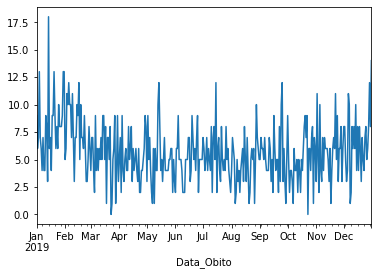

In [144]:
mortalidade_causa_1_I.plot()

In [145]:
import pandas as pd
mortalidade_freg  = '/content/drive/Shareddrives/Reliable Project/Data/PED-513988545_210908.zip (Unzipped Files)/all_freguesia_2019.csv'
mortalidade_freg  = pd.read_csv(mortalidade_freg)
mortalidade_freg 

Unnamed: 0 FG_RESID  Data_Obito  n
0               1   010103  2019-01-07  1
1               2   010103  2019-01-18  1
2               3   010103  2019-01-20  1
3               4   010103  2019-01-22  1
4               5   010103  2019-02-03  1
...           ...      ...         ... ..
91635       91636   900000  2019-12-27  2
91636       91637   900000  2019-12-28  1
91637       91638   900000  2019-12-29  1
91638       91639   900000  2019-12-30  2
91639       91640   900000  2019-12-31  3

[91640 rows x 4 columns]

## Morbilidade e Mortalidade Hospitalar
portaria 207/2017 

In [146]:
import pandas as pd
mortalidade_hosp_causa  = '/content/drive/Shareddrives/Reliable Project/Data/Transparencia Saude/morbilidade-e-mortalidade-hospitalar.csv'
mortalidade_hosp_causa  = pd.read_csv(mortalidade_hosp_causa, sep= ';')
mortalidade_hosp_causa

Período  Código Capítulo Diagnóstico ICD9CM/ICD10CMPCS  \
0       2017-04                                             14   
1       2017-04                                             14   
2       2017-04                                             14   
3       2017-04                                             14   
4       2017-04                                             14   
...         ...                                            ...   
474505  2021-05                                             12   
474506  2021-05                                             12   
474507  2021-05                                             12   
474508  2021-05                                             12   
474509  2021-05                                             12   

       Descrição Capítulo Diagnóstico ICD9CM/ICD10CMPCS  \
0                     Doenças do aparelho geniturinário   
1                     Doenças do aparelho geniturinário   
2                     Doenças do aparelho geniturinário   
3                     Doenças do aparelho geniturinário   
4                     Doenças do aparelho geniturinário   
...                                                 ...   
474505           Doenças da pele e do tecido subcutâneo   
474506           Doenças da pele e do tecido subcutâneo   
474507           Doenças da pele e do tecido subcutâneo   
474508           Doenças da pele e do tecido subcutâneo   
474509           Doenças da pele e do tecido subcutâneo   

                                              Instituição  \
0       Centro Hospitalar de Tras-os-Montes e Alto Dou...   
1       Centro Hospitalar de Tras-os-Montes e Alto Dou...   
2       Centro Hospitalar de Vila Nova de Gaia/Espinho...   
3       Centro Hospitalar de Vila Nova de Gaia/Espinho...   
4       Centro Hospitalar de Vila Nova de Gaia/Espinho...   
...                                                   ...   
474505  Instituto Português Oncologia  F. Gentil - Por...   
474506   Unidade Local de Saúde de Castelo Branco, E.P.E.   
474507       Unidade Local de Saúde de Matosinhos, E.P.E.   
474508       Unidade Local de Saúde de Matosinhos, E.P.E.   
474509       Unidade Local de Saúde do Alto Minho, E.P.E.   

                           Região Faixa Etária Género  Internamentos  \
0        Região de Saúde do Norte      [45-65[      M             10   
1        Região de Saúde do Norte       [5-15[      M              7   
2        Região de Saúde do Norte      [25-45[      F             16   
3        Região de Saúde do Norte      [45-65[      F             40   
4        Região de Saúde do Norte       [5-15[      F              0   
...                           ...          ...    ...            ...   
474505   Região de Saúde do Norte      [45-65[      M              0   
474506  Região de Saúde do Centro      [45-65[      M              0   
474507   Região de Saúde do Norte      [25-45[      F              1   
474508   Região de Saúde do Norte      [25-45[      M              0   
474509   Região de Saúde do Norte      [15-25[      M              0   

        Dias de Internamento  Ambulatório  Óbitos  
0                         99           16       0  
1                          8            3       0  
2                         43           57       0  
3                        188           22       1  
4                          0            1       0  
...                      ...          ...     ...  
474505                     0            2       0  
474506                     0            2       0  
474507                     2            0       0  
474508                     0            1       0  
474509                     0            4       0  

[474510 rows x 11 columns]

In [147]:
mortalidade_hosp_causa['Internamentos + Ambulatório']=  mortalidade_hosp_causa['Internamentos'] + mortalidade_hosp_causa['Ambulatório']


In [148]:
mortalidade_hosp_causa_21 = mortalidade_hosp_causa[mortalidade_hosp_causa['Período'].isin(['2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12'])]

In [149]:
mortalidade_hosp_causa[mortalidade_hosp_causa['Código Capítulo Diagnóstico ICD9CM/ICD10CMPCS'].isin([9,10])]

Período  Código Capítulo Diagnóstico ICD9CM/ICD10CMPCS  \
7       2017-04                                              9   
8       2017-04                                              9   
9       2017-04                                              9   
10      2017-04                                              9   
11      2017-04                                              9   
...         ...                                            ...   
474499  2021-05                                             10   
474500  2021-05                                             10   
474501  2021-05                                             10   
474502  2021-05                                             10   
474503  2021-05                                             10   

       Descrição Capítulo Diagnóstico ICD9CM/ICD10CMPCS  \
7                      Doenças do aparelho circulatório   
8                      Doenças do aparelho circulatório   
9                      Doenças do aparelho circulatório   
10                     Doenças do aparelho circulatório   
11                     Doenças do aparelho circulatório   
...                                                 ...   
474499                 Doenças do aparelho respiratório   
474500                 Doenças do aparelho respiratório   
474501                 Doenças do aparelho respiratório   
474502                 Doenças do aparelho respiratório   
474503                 Doenças do aparelho respiratório   

                                              Instituição  \
7       Hospital de Santo Espírito da Ilha Terceira, EPER   
8       Hospital de Santo Espírito da Ilha Terceira, EPER   
9       Hospital de Santo Espírito da Ilha Terceira, EPER   
10                        Hospital de Vila Franca de Xira   
11                        Hospital de Vila Franca de Xira   
...                                                   ...   
474499  Unidade Local de Saúde do Norte Alentejano E. ...   
474500  Unidade Local de Saúde do Norte Alentejano E. ...   
474501  Unidade Local de Saúde do Norte Alentejano E. ...   
474502            Unidade Local de Saúde Nordeste, E.P.E.   
474503            Unidade Local de Saúde Nordeste, E.P.E.   

                             Região Faixa Etária Género  Internamentos  \
7        Região de Saúde dos Açores        [1-5[      F              1   
8        Região de Saúde dos Açores      [25-45[      M              3   
9        Região de Saúde dos Açores     [65-120[      F             16   
10              Região de Saúde LVT      [25-45[      F              2   
11              Região de Saúde LVT      [45-65[      F             10   
...                             ...          ...    ...            ...   
474499  Região de Saúde do Alentejo      [25-45[      F              6   
474500  Região de Saúde do Alentejo      [25-45[      M              1   
474501  Região de Saúde do Alentejo       [5-15[      M              1   
474502     Região de Saúde do Norte      [45-65[      F              1   
474503     Região de Saúde do Norte     [65-120[      F             14   

        Dias de Internamento  Ambulatório  Óbitos  Internamentos + Ambulatório  
7                          1            0       0                            1  
8                         13            0       0                            3  
9                        131            0       0                           16  
10                        11            0       0                            2  
11                        47            4       0                           14  
...                      ...          ...     ...                          ...  
474499                    46            0       1                            6  
474500                     2            0       0                            1  
474501                     2            0       0                            1  
474502                     3            0       0                         

In [150]:
mortalidade_hosp_causa_21

Período  Código Capítulo Diagnóstico ICD9CM/ICD10CMPCS  \
15041   2021-01                                              1   
15042   2021-01                                              1   
15043   2021-01                                              1   
15044   2021-01                                              1   
15045   2021-01                                              1   
...         ...                                            ...   
474505  2021-05                                             12   
474506  2021-05                                             12   
474507  2021-05                                             12   
474508  2021-05                                             12   
474509  2021-05                                             12   

       Descrição Capítulo Diagnóstico ICD9CM/ICD10CMPCS  \
15041        Algumas doenças infecciosas e parasitárias   
15042        Algumas doenças infecciosas e parasitárias   
15043        Algumas doenças infecciosas e parasitárias   
15044        Algumas doenças infecciosas e parasitárias   
15045        Algumas doenças infecciosas e parasitárias   
...                                                 ...   
474505           Doenças da pele e do tecido subcutâneo   
474506           Doenças da pele e do tecido subcutâneo   
474507           Doenças da pele e do tecido subcutâneo   
474508           Doenças da pele e do tecido subcutâneo   
474509           Doenças da pele e do tecido subcutâneo   

                                              Instituição  \
15041       Hospital Distrital da Figueira da Foz, E.P.E.   
15042              Hospital Distrital de Santarém, E.P.E.   
15043              Hospital Distrital de Santarém, E.P.E.   
15044            Hospital Garcia de Orta, E.P.E. - Almada   
15045       Hospital Santa Maria Maior, E.P.E. - Barcelos   
...                                                   ...   
474505  Instituto Português Oncologia  F. Gentil - Por...   
474506   Unidade Local de Saúde de Castelo Branco, E.P.E.   
474507       Unidade Local de Saúde de Matosinhos, E.P.E.   
474508       Unidade Local de Saúde de Matosinhos, E.P.E.   
474509       Unidade Local de Saúde do Alto Minho, E.P.E.   

                           Região Faixa Etária Género  Internamentos  \
15041   Região de Saúde do Centro     [65-120[      M             11   
15042         Região de Saúde LVT     [65-120[      F             18   
15043         Região de Saúde LVT     [65-120[      M              7   
15044         Região de Saúde LVT     [65-120[      F              1   
15045    Região de Saúde do Norte      [45-65[      M              4   
...                           ...          ...    ...            ...   
474505   Região de Saúde do Norte      [45-65[      M              0   
474506  Região de Saúde do Centro      [45-65[      M              0   
474507   Região de Saúde do Norte      [25-45[      F              1   
474508   Região de Saúde do Norte      [25-45[      M              0   
474509   Região de Saúde do Norte      [15-25[      M              0   

        Dias de Internamento  Ambulatório  Óbitos  Internamentos + Ambulatório  
15041                     54            0       8                           11  
15042                    153            0      10                           18  
15043                     40            0       6                            7  
15044                      1            1       1                            2  
15045                     29            0       1                            4  
...                      ...          ...     ...                          ...  
474505                     0            2       0                            2  
474506                     0            2       0                            2  
474507                     2            0       0                            1  
474508                     0            1       0                            1  
474509           

In [151]:
mortalidade_hosp_causa_21_group = mortalidade_hosp_causa_21.groupby(['Código Capítulo Diagnóstico ICD9CM/ICD10CMPCS','Região','Instituição']).sum()

In [152]:
mortalidade_hosp_causa_21_index = mortalidade_hosp_causa_21_group.reset_index()  

In [153]:
mortalidade_hosp_causa_21_index

Código Capítulo Diagnóstico ICD9CM/ICD10CMPCS  \
0                                                 1   
1                                                 1   
2                                                 1   
3                                                 1   
4                                                 1   
...                                             ...   
1065                                             22   
1066                                             22   
1067                                             22   
1068                                             22   
1069                                             22   

                          Região  \
0            Região de Saúde LVT   
1            Região de Saúde LVT   
2            Região de Saúde LVT   
3            Região de Saúde LVT   
4            Região de Saúde LVT   
...                          ...   
1065    Região de Saúde do Norte   
1066    Região de Saúde do Norte   
1067  Região de Saúde dos Açores   
1068  Região de Saúde dos Açores   
1069  Região de Saúde dos Açores   

                                            Instituição  Internamentos  \
0            Centro Hospitalar Barreiro/Montijo, E.P.E.            150   
1            Centro Hospitalar Lisboa Ocidental, E.P.E.            196   
2                      Centro Hospitalar Setúbal, E.P.E            168   
3     Centro Hospitalar Universitário Lisboa Central...            109   
4     Centro Hospitalar Universitário de Lisboa Nort...            100   
...                                                 ...            ...   
1065       Unidade Local de Saúde de Matosinhos, E.P.E.            394   
1066       Unidade Local de Saúde do Alto Minho, E.P.E.            663   
1067                          Hospital da Horta, E.P.E.              1   
1068  Hospital de Santo Espírito da Ilha Terceira, EPER             11   
1069  Hospital do Divino Espírito Santo de Ponta Del...            128   

      Dias de Internamento  Ambulatório  Óbitos  Internamentos + Ambulatório  
0                     2202            1      76                          151  
1                     3362            2      50                          198  
2                     1694            9      74                          177  
3                     1903           19      14                          128  
4                     1303            4      23                          104  
...                    ...          ...     ...                          ...  
1065                  5459            0      73                          394  
1066                  7015            0     120                          663  
1067                     8            0       0                            1  
1068                   298            0       3                           11  
1069                  1514            0       4                          128  

[1070 rows x 8 columns]

In [154]:
mortalidade_hosp_causa_21_group_dis = mortalidade_hosp_causa_21.groupby(['Código Capítulo Diagnóstico ICD9CM/ICD10CMPCS','Região']).sum()

In [155]:
mortalidade_hosp_causa_21_group_dis_index = mortalidade_hosp_causa_21_group_dis.reset_index()  

In [156]:
mortalidade_hosp_causa_21_group_dis_index

Código Capítulo Diagnóstico ICD9CM/ICD10CMPCS  \
0                                                1   
1                                                1   
2                                                1   
3                                                1   
4                                                1   
..                                             ...   
142                                             22   
143                                             22   
144                                             22   
145                                             22   
146                                             22   

                          Região  Internamentos  Dias de Internamento  \
0            Região de Saúde LVT           1955                 24116   
1     Região de Saúde da Madeira             29                   355   
2    Região de Saúde do Alentejo            287                  3259   
3     Região de Saúde do Algarve            135                  2261   
4      Região de Saúde do Centro            690                  8980   
..                           ...            ...                   ...   
142  Região de Saúde do Alentejo           1084                 11749   
143   Região de Saúde do Algarve            943                 11884   
144    Região de Saúde do Centro           4627                 58400   
145     Região de Saúde do Norte           6866                 85668   
146   Região de Saúde dos Açores            140                  1820   

     Ambulatório  Óbitos  Internamentos + Ambulatório  
0             57     598                         2012  
1              0       5                           29  
2              5     119                          292  
3              2      41                          137  
4              8     190                          698  
..           ...     ...                          ...  
142            0     407                         1084  
143            0     260                          943  
144            3    1325                         4630  
145            1    1447                         6867  
146            0       7                          140  

[147 rows x 7 columns]

In [157]:
pivot_hosp =  pd.pivot_table(mortalidade_hosp_causa_21_group_dis_index, values="Internamentos + Ambulatório", index=["Região"], columns=["Código Capítulo Diagnóstico ICD9CM/ICD10CMPCS"])


In [158]:
pivot_hosp['all'] = pivot_hosp.sum(axis=1)

In [159]:
pivot_hosp.columns

Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
          11,    12,    13,    14,    15,    16,    17,    18,    19,    21,
          22, 'all'],
      dtype='object', name='Código Capítulo Diagnóstico ICD9CM/ICD10CMPCS')

In [160]:
pivot_hosp['cid 9 + 10'] = pivot_hosp[9] + pivot_hosp[10]

In [161]:
pivot_hosp['% 9 and 10'] = pivot_hosp['cid 9 + 10']/pivot_hosp['all']

In [162]:
pivot_hosp

Código Capítulo Diagnóstico ICD9CM/ICD10CMPCS     1      2    3      4     5  \
Região                                                                         
Região de Saúde LVT                            2012  10963  914   6994  1716   
Região de Saúde da Madeira                       29    518   45    119     4   
Região de Saúde do Alentejo                     292    990  108   1022   144   
Região de Saúde do Algarve                      137   1312   65    433   218   
Região de Saúde do Centro                       698   5730  234   1953   844   
Região de Saúde do Norte                       2587  15253  730  11336  1914   
Região de Saúde dos Açores                      159    506   69    188    81   

Código Capítulo Diagnóstico ICD9CM/ICD10CMPCS     6      7    8      9    10  \
Região                                                                         
Região de Saúde LVT                            4891  19665  665  16040  6868   
Região de Saúde da Madeira                       68      4    1    218   136   
Região de Saúde do Alentejo                     492   2740   22   2199   882   
Região de Saúde do Algarve                      598    615   56   1849   944   
Região de Saúde do Centro                      2976  10103  152   5700  2644   
Região de Saúde do Norte                       9437  29723  747  18747  8894   
Região de Saúde dos Açores                      249    497   41   1165   793   

Código Capítulo Diagnóstico ICD9CM/ICD10CMPCS  ...     15   16    17    18  \
Região                                         ...                           
Região de Saúde LVT                            ...  10072  203   911  1932   
Região de Saúde da Madeira                     ...    671   12    49    75   
Região de Saúde do Alentejo                    ...    997    6    27   226   
Região de Saúde do Algarve                     ...   1543   33    15   269   
Região de Saúde do Centro                      ...   3550   85   252   811   
Região de Saúde do Norte                       ...   8942  266  1450  2904   
Região de Saúde dos Açores                     ...    414   14    62   238   

Código Capítulo Diagnóstico ICD9CM/ICD10CMPCS     19     21    22     all  \
Região                                                                      
Região de Saúde LVT                             8423  39369  8847  167191   
Região de Saúde da Madeira                       453    623   452    4487   
Região de Saúde do Alentejo                      950   4339  1084   19928   
Região de Saúde do Algarve                      1075   6832   943   19435   
Região de Saúde do Centro                       3196  18854  4630   75445   
Região de Saúde do Norte                       10037  34949  6867  210508   
Região de Saúde dos Açores                       634   1535   140    9036   

Código Capítulo Diagnóstico ICD9CM/ICD10CMPCS  cid 9 + 10  % 9 and 10  
Região                                                                 
Região de Saúde LVT                                 22908    0.137017  
Região de Saúde da Madeira                            354    0.078895  
Região de Saúde do Alentejo                          3081    0.154607  
Região de Saúde do Algarve                           2793    0.143710  
Região de Saúde do Centro                            8344    0.110597  
Região de Saúde do Norte                            27641    0.131306  
Região de Saúde dos Açores                           1958    0.216689  

[7 rows x 24 columns]

###Caracterização das Valências de Urgência

In [163]:
import pandas as pd
valencias  = '/content/drive/Shareddrives/Reliable Project/Data/Transparencia Saude/caracterizacao-das-valencias-de-urgencia.csv'
valencias  = pd.read_csv(valencias, sep= ';')
valencias

Região Natureza Jurídica  \
0                   ARS Algarve               EPE   
1                  ARS Alentejo           ULS-EPE   
2                  ARS Alentejo           ULS-EPE   
3                  ARS Alentejo           ULS-EPE   
4                     ARS Norte                IP   
...                         ...               ...   
1141                  ARS Norte               EPE   
1142                  ARS Norte               EPE   
1143  ARS Lisboa e Vale do Tejo               PPP   
1144                  ARS Norte               EPE   
1145                  ARS Norte               EPE   

                            Entidade / Grupo Hospitalar  \
0     Centro Hospitalar Universitário do Algarve, E....   
1     Hospital do Litoral Alentejano - Santiago do C...   
2     Hospital José Joaquim Fernandes - Beja - ULS B...   
3     Hospital José Joaquim Fernandes - Beja - ULS B...   
4            Grupo | Serviços de Urgência Básica | ARSN   
...                                                 ...   
1141           Centro Hospitalar Tâmega e Sousa, E.P.E.   
1142  Centro Hospitalar de Trás-os-Montes e Alto Dou...   
1143                            Hospital Beatriz Ângelo   
1144   Centro Hospitalar Universitário do Porto, E.P.E.   
1145   Centro Hospitalar Universitário do Porto, E.P.E.   

                 Unidade Hospitalar Localização Geográfica  \
0                     SUB Albufeira          37.098,-8.255   
1                SUB Alcácer do Sal    38.376337,-8.510121   
2                  SUB Castro Verde       37.7041,-8.08336   
3                  SUB Castro Verde       37.7041,-8.08336   
4                    SUB Montalegre       41.8309,-7.78268   
...                             ...                    ...   
1141  H. Padre Américo - Vale Sousa       41.1963,-8.30792   
1142                   U. H. Chaves    41.743265,-7.476717   
1143              H. Beatriz Ângelo    38.821769,-9.176301   
1144               H. Santo António    41.147283,-8.619536   
1145               H. Santo António    41.147283,-8.619536   

                                          Endereço Código Postal  \
0                          Urbanização dos Caliços      8200-200   
1                            Av. José Saramago, 14      7580-206   
2        Av. General Humberto Delgado, Apartado 17      7780-123   
3        Av. General Humberto Delgado, Apartado 17      7780-123   
4                          Rua Lama do Moinho, 400      5470-225   
...                                            ...           ...   
1141  Av. do Hospital Padre Américo, 210, Guilhufe      4560-136   
1142                 Av. Dr. Francisco Sá Carneiro      5400-279   
1143                        Av. Carlos Teixeira, 3      2674-514   
1144                  Largo Professor Abel Salazar      4099-001   
1145                  Largo Professor Abel Salazar      4099-001   

          Localidade     Telefone                                   Email  \
0          Albufeira  289598400.0    administracao@chalgarve.min-saude.pt   
1     Alcácer do Sal  269818101.0  csalcacer@alentejolitoral.min-saude.pt   
2       Castro Verde  286320140.0           subcvcasns@ulsba.min-saude.pt   
3       Castro Verde  286320140.0           subcvcasns@ulsba.min-saude.pt   
4         Montalegre  276510169.0    sub.montalegre@arsnorte.min-saude.pt   
...              ...          ...                                     ...   
1141        Penafiel  255714098.0         administracao@chts.min-saude.pt   
1142          Chaves  276300900.0            hchaves@hchaves.min-saude.pt   
1143          Loures  219847200.0                 geral@hbeatrizangelo.pt   
1144           Porto  222077500.0                 ca@chporto.min-saude.pt   
1145           Porto  222077500.0                 ca@chporto.min-saude.pt   

                                              Freguesia  \
0                             Albufeira e Olhos de Água   
1     União das freguesias de Alcácer do Sal (Santa ...   
2        União 

In [164]:
dic_areas_saude =dict({'Aveiro': 'Região de Saúde do Norte',
'Beja': 'Região de Saúde do Alentejo',
'Braga': 'Região de Saúde do Norte',
'Bragança':'Região de Saúde do Norte',
'Castelo Branco': 'Região de Saúde do Centro',
'Coimbra': 'Região de Saúde do Centro',
'Évora': 'Região de Saúde do Alentejo',
'Faro': 'Região de Saúde do Algarve',
'Guarda': 'Região de Saúde do Centro',
'Leiria': 'Região de Saúde do Centro',
'Lisboa': 'Região de Saúde LVT',
'Portalegre': 'Região de Saúde do Alentejo',
'Porto': 'Região de Saúde do Norte',
'Santarém': 'Região de Saúde LVT',
'Setúbal': 'Região de Saúde LVT',
'Viana do Castelo': 'Região de Saúde do Norte',
'Vila Real': 'Região de Saúde do Norte',
'Viseu': 'Região de Saúde do Centro',
'Ilha da Madeira': 'Região de Saúde da Madeira',
'Ilha de Porto Santo': 'Região de Saúde da Madeira',
'Ilha de Santa Maria': 'Região de Saúde dos Açores', 
'Ilha de São Miguel': 'Região de Saúde dos Açores', 
'Ilha Terceira': 'Região de Saúde dos Açores', 
'Ilha da Graciosa': 'Região de Saúde dos Açores', 
'Ilha de São Jorge': 'Região de Saúde dos Açores', 
'Ilha do Pico': 'Região de Saúde dos Açores',
'Ilha do Faial': 'Região de Saúde dos Açores', 
'Ilha das Flores': 'Região de Saúde dos Açores', 
'Ilha do Corvo': 'Região de Saúde dos Açores'
})
mortalidade_hosp_causa['DT_RESID_DSG'] = mortalidade_hosp_causa['Região'].map(dic_areas_saude)

# IEFP

data source:
Desempregados inscritos nos centros de emprego e de formação profissional
Total Dezembro
url: 
https://www.pordata.pt/Municipios/Desempregados+inscritos+nos+centros+de+emprego+e+de+forma%C3%A7%C3%A3o+profissional-220

In [165]:
url ='https://docs.google.com/spreadsheets/d/1bh0yqsu3yR-yrc0mlDv6tjdaanr9qV1h/export?format=csv&gid=150359953'
iefp= pd.read_csv(url) 

In [166]:
iefp_Mun	= iefp[iefp['Âmbito Geográfico'] == 'Município'] 

In [167]:
iefp_Mun['1997'] = iefp_Mun['1997'].str.replace(",","")
iefp_Mun['1997'] = iefp_Mun['1997'].str.replace("x","")
iefp_Mun['2001'] = iefp_Mun['2001'].str.replace(",","")
iefp_Mun['2001'] = iefp_Mun['2001'].str.replace("x","")
iefp_Mun['2009'] = iefp_Mun['2009'].str.replace(",","")
iefp_Mun['2009'] = iefp_Mun['2009'].str.replace("x","")
iefp_Mun['2010'] = iefp_Mun['2010'].str.replace(",","")
iefp_Mun['2010'] = iefp_Mun['2010'].str.replace("x","")
iefp_Mun['2011'] = iefp_Mun['2011'].str.replace(",","")
iefp_Mun['2011'] = iefp_Mun['2011'].str.replace("x","")
iefp_Mun['2012'] = iefp_Mun['2012'].str.replace(",","")
iefp_Mun['2012'] = iefp_Mun['2012'].str.replace("x","")
iefp_Mun['2013'] = iefp_Mun['2013'].str.replace(",","")
iefp_Mun['2013'] = iefp_Mun['2013'].str.replace("x","")
iefp_Mun['2014'] = iefp_Mun['2014'].str.replace(",","")
iefp_Mun['2014'] = iefp_Mun['2014'].str.replace("x","")
iefp_Mun['2015'] = iefp_Mun['2015'].str.replace(",","")
iefp_Mun['2015'] = iefp_Mun['2015'].str.replace("x","")
iefp_Mun['2016'] = iefp_Mun['2016'].str.replace(",","")
iefp_Mun['2016'] = iefp_Mun['2016'].str.replace("x","")
iefp_Mun['2017'] = iefp_Mun['2017'].str.replace(",","")
iefp_Mun['2017'] = iefp_Mun['2017'].str.replace("x","")
iefp_Mun['2018'] = iefp_Mun['2018'].str.replace(",","")
iefp_Mun['2018'] = iefp_Mun['2018'].str.replace("x","")
iefp_Mun['2019'] = iefp_Mun['2019'].str.replace(",","")
iefp_Mun['2019'] = iefp_Mun['2019'].str.replace("x","")
iefp_Mun['2020'] = iefp_Mun['2020'].str.replace(",","")
iefp_Mun['2020'] = iefp_Mun['2020'].str.replace("x","")
iefp_Mun['2020'] = iefp_Mun['2020'].str.replace(",","")
iefp_Mun['2020'] = iefp_Mun['2020'].str.replace("x","")
iefp_Mun['2021'] = iefp_Mun['2021'].str.replace(",","")
iefp_Mun['2021'] = iefp_Mun['2021'].str.replace("x","")

<ipython-input-167-0e16749c7037>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-167-0e16749c7037>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-167-0e16749c7037>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-167-0e16749c7

In [168]:
iefp_Mun

Âmbito Geográfico               Anos  1997  2001   2009   2010   2011  \
4           Município  Arcos de Valdevez   603   516    822    893    913   
5           Município            Caminha   451   476    566    677    869   
6           Município            Melgaço   215   158    125    131    170   
7           Município             Monção   471   455    557    542    521   
8           Município   Paredes de Coura   304   281    397    415    395   
..                ...                ...   ...   ...    ...    ...    ...   
347         Município      Ribeira Brava                643    643    819   
348         Município         Santa Cruz               2041   2305   2869   
349         Município            Santana                325    393    450   
350         Município        São Vicente                234    274    292   
352         Município        Porto Santo                312    403    457   

      2012   2013  2014  2015  2016  2017  2018  2019  2020  2021  
4     1175   1128   879   830   690   525   530   436   530   460  
5      981   1007   804   689   603   493   361   331   391   335  
6      256    214   187   198   163   139   110   107   132   106  
7      715    724   598   629   441   375   307   309   435   346  
8      640    581   419   358   332   174   168   186   268   270  
..     ...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
347   1110   1070                                                  
348   3590   3471                                                  
349    625    569                                                  
350    372    343                                                  
352    600    565                                                  

[308 rows x 17 columns]

# Index

# Merge

In [169]:
 merge1 = pd.merge(censosmunicipio_select, irs_2018, how='left', left_on=['GEO_COD_DSG'], right_on=['MUNICIPIO_CENSUS'])

In [170]:
 merge1

GEO_COD            GEO_COD_DSG  N_EDIFICIOS_CLASSICOS  \
0      0101                 Águeda                  18572   
1      0102     Albergaria-a-Velha                  10140   
2      0103                 Anadia                  12977   
3      0104                 Arouca                   9967   
4      0105                 Aveiro                  22817   
..      ...                    ...                    ...   
303    4603      São Roque do Pico                   2248   
304    4701                  Horta                   6447   
305    4801       Lajes das Flores                    991   
306    4802  Santa Cruz das Flores                   1106   
307    4901                  Corvo                    181   

     N_EDIFICIOS_CONSTR_ANTES_1919  N_EDIFICIOS_CONSTR_1919A1945  \
0                              769                          1383   
1                              771                           862   
2                              472                          1094   
3                              594                           805   
4                             1210                          1485   
..                             ...                           ...   
303                            122                           201   
304                            418                           408   
305                            217                           171   
306                            189                           135   
307                             90                            26   

     N_EDIFICIOS_CONSTR_1946A1960  N_EDIFICIOS_CONSTR_1961A1970  \
0                            1954                          2237   
1                            1064                          1109   
2                            1638                          1852   
3                             856                           854   
4                            2408                          2617   
..                            ...                           ...   
303                           194                           123   
304                           478                           402   
305                           107                            73   
306                           110                            74   
307                            13                             6   

     N_EDIFICIOS_CONSTR_1971A1980  N_EDIFICIOS_CONSTR_1981A1990  \
0                            3473                          3355   
1                            1619                          1507   
2                            2393                          2204   
3                            1283                          1633   
4                            3893                          3850   
..                            ...                           ...   
303                           277                           350   
304                           436                           719   
305                            85                            58   
306                            88                           151   
307                             5                            13   

     N_EDIFICIOS_CONSTR_1991A1995  ...  (2.75e+04,3.25e+04]  (3.25e+04,4e+04]  \
0                            1393  ...                900.0             807.0   
1                             698  ...                504.0             440.0   
2                             844  ...                559.0             467.0   
3                             915  ...                266.0             263.0   
4                            1921  ...               1083.0            1078.0   
..                            ...  ...                  ...               ...   
303                           206  ...                 61.0              45.0   
304                           430  ...                313.0             342.0   
305                            55  ...                 27.0              19.0   
306                            80 

In [171]:
merge2 = pd.merge(merge1, pop_Mun_2019, how='left', left_on=['GEO_COD_DSG'], right_on=['Name'])

In [172]:
merge2[merge2['GEO_COD_DSG'].duplicated()]

Empty DataFrame
Columns: [GEO_COD, GEO_COD_DSG, N_EDIFICIOS_CLASSICOS, N_EDIFICIOS_CONSTR_ANTES_1919, N_EDIFICIOS_CONSTR_1919A1945, N_EDIFICIOS_CONSTR_1946A1960, N_EDIFICIOS_CONSTR_1961A1970, N_EDIFICIOS_CONSTR_1971A1980, N_EDIFICIOS_CONSTR_1981A1990, N_EDIFICIOS_CONSTR_1991A1995, N_EDIFICIOS_CONSTR_1996A2000, N_EDIFICIOS_CONSTR_2001A2005, N_EDIFICIOS_CONSTR_2006A2011, N_FAMILIAS_CLASSICAS, N_FAMILIAS_INSTITUCIONAIS, N_FAMILIAS_CLASSICAS_1OU2_PESS, N_FAMILIAS_CLASSICAS_3OU4_PESS, N_FAMILIAS_CLASSICAS_NPES65, N_FAMILIAS_CLASSICAS_NPES14, N_FAMILIAS_CLASSIC_SEM_DESEMP, N_INDIVIDUOS_RESIDENT, N_INDIVIDUOS_RESIDENT_H, N_INDIVIDUOS_RESIDENT_M, N_INDIVIDUOS_RESIDENT_0A4, N_INDIVIDUOS_RESIDENT_5A9, N_INDIVIDUOS_RESIDENT_10A13, N_INDIVIDUOS_RESIDENT_14A19, N_INDIVIDUOS_RESIDENT_15A19, N_INDIVIDUOS_RESIDENT_20A24, N_INDIVIDUOS_RESIDENT_20A64, N_INDIVIDUOS_RESIDENT_25A64, N_INDIVIDUOS_RESIDENT_65, N_FAMILIAS_CLASSIC_1DESEMPREG, (-Inf,0], (0,5e+03], (1.35e+04,1.9e+04], (1.9e+04,2.75e+04], (1e+04,1.35e+04], (1e+05,2.5e+05], (2.5e+05, Inf], (2.75e+04,3.25e+04], (3.25e+04,4e+04], (4e+04,5e+04], (5e+03,1e+04], (5e+04,1e+05], Menos de 5 000 euros, De 19 000 a menos de 32 500 euros, 32 500 euros ou mais, Total_x, % menor 5k, Name, Code, Geo, Total_y, 0 - 14 anos, 15 - 24 anos, 25 - 64 anos, 65 e mais anos, Year]
Index: []

[0 rows x 59 columns]

In [173]:
merge2['% +65'] = merge2['65 e mais anos'] / merge2['Total_y']

In [174]:
merge2['% old house'] = (merge2['N_EDIFICIOS_CONSTR_ANTES_1919'] + merge2['N_EDIFICIOS_CONSTR_1946A1960']) / merge2['N_EDIFICIOS_CLASSICOS']

In [175]:
merge2['% fam +65'] = merge2['N_FAMILIAS_CLASSICAS_NPES65'] / merge2['N_FAMILIAS_CLASSICAS']
merge2['% desemprego'] = merge2['N_FAMILIAS_CLASSIC_1DESEMPREG'] / merge2['N_FAMILIAS_CLASSICAS']

In [176]:
merge2['District'] = merge2['GEO_COD_DSG'].map(cttdic)

In [177]:
merge2['Health_area'] = merge2['District'].map(dic_areas_saude)

In [178]:
morbtdic = dict(zip(pivot_hosp.index, pivot_hosp['% 9 and 10']))

In [179]:
morbtdic

{'Região de Saúde LVT': 0.13701694469199896,
 'Região de Saúde da Madeira': 0.07889458435480276,
 'Região de Saúde do Alentejo': 0.15460658370132477,
 'Região de Saúde do Algarve': 0.14370980190378183,
 'Região de Saúde do Centro': 0.11059712373252038,
 'Região de Saúde do Norte': 0.13130617363710642,
 'Região de Saúde dos Açores': 0.216688800354139}

In [180]:
merge2['% 9 and 10'] = merge2['Health_area'].map(morbtdic)

## Corine Land Cover 2018

In [181]:
verde="/content/drive/Shareddrives/Reliable Project/Data/Copernicus/file_name.csv"
verde = pd.read_csv(verde, header=0, sep=",",index_col=0) 

In [182]:
verde = verde[['DTMN11','area_grid','land_area_as_a_share_of_grid_area']]

In [183]:
verde['DTMN11'] = verde['DTMN11'].apply(lambda x: ('0'*(4-len(str(x))))+str(x) if(len(str(x)) < 4) else str(x))

In [184]:
merge3 = pd.merge(merge2, verde, how='left', left_on=['GEO_COD'], right_on=['DTMN11'])

In [185]:
merge3

GEO_COD            GEO_COD_DSG  N_EDIFICIOS_CLASSICOS  \
0      0101                 Águeda                  18572   
1      0102     Albergaria-a-Velha                  10140   
2      0103                 Anadia                  12977   
3      0104                 Arouca                   9967   
4      0105                 Aveiro                  22817   
..      ...                    ...                    ...   
303    4603      São Roque do Pico                   2248   
304    4701                  Horta                   6447   
305    4801       Lajes das Flores                    991   
306    4802  Santa Cruz das Flores                   1106   
307    4901                  Corvo                    181   

     N_EDIFICIOS_CONSTR_ANTES_1919  N_EDIFICIOS_CONSTR_1919A1945  \
0                              769                          1383   
1                              771                           862   
2                              472                          1094   
3                              594                           805   
4                             1210                          1485   
..                             ...                           ...   
303                            122                           201   
304                            418                           408   
305                            217                           171   
306                            189                           135   
307                             90                            26   

     N_EDIFICIOS_CONSTR_1946A1960  N_EDIFICIOS_CONSTR_1961A1970  \
0                            1954                          2237   
1                            1064                          1109   
2                            1638                          1852   
3                             856                           854   
4                            2408                          2617   
..                            ...                           ...   
303                           194                           123   
304                           478                           402   
305                           107                            73   
306                           110                            74   
307                            13                             6   

     N_EDIFICIOS_CONSTR_1971A1980  N_EDIFICIOS_CONSTR_1981A1990  \
0                            3473                          3355   
1                            1619                          1507   
2                            2393                          2204   
3                            1283                          1633   
4                            3893                          3850   
..                            ...                           ...   
303                           277                           350   
304                           436                           719   
305                            85                            58   
306                            88                           151   
307                             5                            13   

     N_EDIFICIOS_CONSTR_1991A1995  ...     % +65  % old house  % fam +65  \
0                            1393  ...  0.242453     0.146619   0.356157   
1                             698  ...  0.215830     0.180966   0.333730   
2                             844  ...  0.274231     0.162595   0.415185   
3                             915  ...  0.215830     0.145480   0.368033   
4                            1921  ...  0.202289     0.158566   0.293173   
..                            ...  ...       ...          ...        ...   
303                           206  ...  0.196571     0.140569   0.376309   
304                           430  ...  0.178913     0.138979   0.298954   
305                            55  ...  0.207109     0.326942   0.323873   
306                            80  ...  0.186605     0.270344   0.328324   
307     

In [186]:
merge3.columns

Index(['GEO_COD', 'GEO_COD_DSG', 'N_EDIFICIOS_CLASSICOS',
       'N_EDIFICIOS_CONSTR_ANTES_1919', 'N_EDIFICIOS_CONSTR_1919A1945',
       'N_EDIFICIOS_CONSTR_1946A1960', 'N_EDIFICIOS_CONSTR_1961A1970',
       'N_EDIFICIOS_CONSTR_1971A1980', 'N_EDIFICIOS_CONSTR_1981A1990',
       'N_EDIFICIOS_CONSTR_1991A1995', 'N_EDIFICIOS_CONSTR_1996A2000',
       'N_EDIFICIOS_CONSTR_2001A2005', 'N_EDIFICIOS_CONSTR_2006A2011',
       'N_FAMILIAS_CLASSICAS', 'N_FAMILIAS_INSTITUCIONAIS',
       'N_FAMILIAS_CLASSICAS_1OU2_PESS', 'N_FAMILIAS_CLASSICAS_3OU4_PESS',
       'N_FAMILIAS_CLASSICAS_NPES65', 'N_FAMILIAS_CLASSICAS_NPES14',
       'N_FAMILIAS_CLASSIC_SEM_DESEMP', 'N_INDIVIDUOS_RESIDENT',
       'N_INDIVIDUOS_RESIDENT_H', 'N_INDIVIDUOS_RESIDENT_M',
       'N_INDIVIDUOS_RESIDENT_0A4', 'N_INDIVIDUOS_RESIDENT_5A9',
       'N_INDIVIDUOS_RESIDENT_10A13', 'N_INDIVIDUOS_RESIDENT_14A19',
       'N_INDIVIDUOS_RESIDENT_15A19', 'N_INDIVIDUOS_RESIDENT_20A24',
       'N_INDIVIDUOS_RESIDENT_20A64', 'N_INDIVIDUOS_R

## Base dados edificios georeferenciados

In [187]:
bde="/content/drive/Shareddrives/Reliable Project/Data/bde_select.csv"
bde = pd.read_csv(bde, header=[1,2], sep=",",index_col=0) 

In [188]:
#new = bde.columns.droplevel(level=1)

In [189]:
bde.columns = bde.columns.to_flat_index()

In [190]:
bde.columns

Index([ ('0', '1'),  ('0', '2'),  ('0', '3'),  ('0', '4'),  ('0', '5'),
        ('0', '6'),  ('0', '7'),  ('0', '8'),  ('0', '9'), ('0', '10'),
        ('1', '1'),  ('1', '2'),  ('1', '3'),  ('1', '4'),  ('1', '5'),
        ('1', '6'),  ('1', '7'),  ('1', '8'),  ('1', '9'), ('1', '10')],
      dtype='object')

In [191]:
new = bde.copy()

In [192]:
new = new.reset_index()

In [193]:
new.rename(columns={new.columns[0]: "DTMN11", new.columns[1]: "0 1", new.columns[2]: "0 2", new.columns[3]: "0 3", new.columns[4]: "0 4", new.columns[5]: "0 5", new.columns[6]:"0 6",new.columns[7]: "0 7",new.columns[8]: "0 8",new.columns[9]: "0 9",new.columns[10]: "0 10", new.columns[11]: "1 1", new.columns[12]: "1 2",new.columns[13]: "1 3", new.columns[14]: "1 4",new.columns[15]: "1 5",new.columns[16]: "1 6",new.columns[17]: "1 7",new.columns[18]: "1 8",new.columns[19]: "1 9",new.columns[20]: "1 10"}, inplace = True)

In [194]:
new

DTMN11     0 1     0 2     0 3     0 4     0 5     0 6     0 7     0 8  \
0       101   665.0  1258.0  1874.0  2195.0  3448.0  3346.0  1388.0  1541.0   
1       102   679.0   765.0  1027.0  1094.0  1596.0  1493.0   695.0   841.0   
2       103   414.0   959.0  1532.0  1789.0  2373.0  2191.0   841.0   857.0   
3       104   535.0   724.0   807.0   811.0  1252.0  1616.0   910.0  1096.0   
4       105  1098.0  1359.0  2302.0  2548.0  3857.0  3837.0  1914.0  1945.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
273    1820   491.0   540.0   446.0   479.0   759.0  1033.0   442.0   503.0   
274    1821   925.0  1258.0  1712.0  1785.0  2803.0  2556.0  1127.0  1210.0   
275    1822   132.0   246.0   285.0   521.0   998.0   957.0   309.0   201.0   
276    1823   872.0  1756.0  2257.0  3095.0  6411.0  6944.0  3974.0  4113.0   
277    1824   471.0   639.0   587.0   577.0   987.0   959.0   440.0   546.0   

        0 9  ...    1 1    1 2    1 3    1 4    1 5   1 6  1 7  1 8  1 9  1 10  
0    1498.0  ...  104.0  125.0   80.0   42.0   25.0   9.0  5.0  1.0  2.0   1.0  
1    1028.0  ...   92.0   97.0   37.0   15.0   23.0  14.0  3.0  3.0  3.0   2.0  
2    1025.0  ...   58.0  135.0  106.0   63.0   20.0  13.0  3.0  1.0  NaN   1.0  
3    1107.0  ...   59.0   81.0   49.0   43.0   31.0  17.0  5.0  4.0  9.0   5.0  
4    2142.0  ...  112.0  126.0  106.0   69.0   36.0  13.0  7.0  NaN  1.0   NaN  
..      ...  ...    ...    ...    ...    ...    ...   ...  ...  ...  ...   ...  
273   476.0  ...  130.0  182.0   91.0   64.0   37.0  13.0  2.0  1.0  NaN   2.0  
274  1454.0  ...  146.0  156.0  116.0   60.0   33.0  10.0  6.0  4.0  4.0   6.0  
275   298.0  ...    2.0    3.0   13.0    3.0    2.0   NaN  NaN  NaN  1.0   NaN  
276  3995.0  ...  143.0  274.0  183.0  118.0  123.0  49.0  9.0  3.0  7.0   4.0  
277   515.0  ...   75.0  101.0   47.0   12.0   10.0   3.0  3.0  2.0  NaN   2.0  

[278 rows x 21 columns]

In [195]:
new['DTMN11'] = new['DTMN11'].apply(lambda x: ('0'*(4-len(str(x))))+str(x) if(len(str(x)) < 4) else str(x))


In [196]:
new

DTMN11     0 1     0 2     0 3     0 4     0 5     0 6     0 7     0 8  \
0     0101   665.0  1258.0  1874.0  2195.0  3448.0  3346.0  1388.0  1541.0   
1     0102   679.0   765.0  1027.0  1094.0  1596.0  1493.0   695.0   841.0   
2     0103   414.0   959.0  1532.0  1789.0  2373.0  2191.0   841.0   857.0   
3     0104   535.0   724.0   807.0   811.0  1252.0  1616.0   910.0  1096.0   
4     0105  1098.0  1359.0  2302.0  2548.0  3857.0  3837.0  1914.0  1945.0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
273   1820   491.0   540.0   446.0   479.0   759.0  1033.0   442.0   503.0   
274   1821   925.0  1258.0  1712.0  1785.0  2803.0  2556.0  1127.0  1210.0   
275   1822   132.0   246.0   285.0   521.0   998.0   957.0   309.0   201.0   
276   1823   872.0  1756.0  2257.0  3095.0  6411.0  6944.0  3974.0  4113.0   
277   1824   471.0   639.0   587.0   577.0   987.0   959.0   440.0   546.0   

        0 9  ...    1 1    1 2    1 3    1 4    1 5   1 6  1 7  1 8  1 9  1 10  
0    1498.0  ...  104.0  125.0   80.0   42.0   25.0   9.0  5.0  1.0  2.0   1.0  
1    1028.0  ...   92.0   97.0   37.0   15.0   23.0  14.0  3.0  3.0  3.0   2.0  
2    1025.0  ...   58.0  135.0  106.0   63.0   20.0  13.0  3.0  1.0  NaN   1.0  
3    1107.0  ...   59.0   81.0   49.0   43.0   31.0  17.0  5.0  4.0  9.0   5.0  
4    2142.0  ...  112.0  126.0  106.0   69.0   36.0  13.0  7.0  NaN  1.0   NaN  
..      ...  ...    ...    ...    ...    ...    ...   ...  ...  ...  ...   ...  
273   476.0  ...  130.0  182.0   91.0   64.0   37.0  13.0  2.0  1.0  NaN   2.0  
274  1454.0  ...  146.0  156.0  116.0   60.0   33.0  10.0  6.0  4.0  4.0   6.0  
275   298.0  ...    2.0    3.0   13.0    3.0    2.0   NaN  NaN  NaN  1.0   NaN  
276  3995.0  ...  143.0  274.0  183.0  118.0  123.0  49.0  9.0  3.0  7.0   4.0  
277   515.0  ...   75.0  101.0   47.0   12.0   10.0   3.0  3.0  2.0  NaN   2.0  

[278 rows x 21 columns]

In [197]:
col_list= list(new)

In [198]:
col_list.remove('DTMN11')

In [199]:
col_list

['0 1',
 '0 2',
 '0 3',
 '0 4',
 '0 5',
 '0 6',
 '0 7',
 '0 8',
 '0 9',
 '0 10',
 '1 1',
 '1 2',
 '1 3',
 '1 4',
 '1 5',
 '1 6',
 '1 7',
 '1 8',
 '1 9',
 '1 10']

In [200]:
new['all'] = new[col_list].sum(axis=1)

In [201]:
unwanted_num = {'0 1','0 2','0 3','0 4','0 5','0 6','0 7','0 8','0 9','0 10'}

In [202]:
list1 = [ele for ele in col_list if ele not in unwanted_num]

In [203]:
new['need repair'] = new[list1].sum(axis=1)

In [204]:
new2 = new[['DTMN11','all','need repair']]

In [205]:
new2

DTMN11      all  need repair
0     0101  18572.0        394.0
1     0102  10140.0        289.0
2     0103  12977.0        400.0
3     0104   9967.0        303.0
4     0105  22817.0        470.0
..     ...      ...          ...
273   1820   6096.0        522.0
274   1821  16328.0        541.0
275   1822   4152.0         24.0
276   1823  36820.0        913.0
277   1824   6457.0        255.0

[278 rows x 3 columns]

In [206]:
merge4 = pd.merge(merge3, new2, how='left', left_on=['GEO_COD'], right_on=['DTMN11'])

In [207]:
 mergecdd2 = mergecdd[['GEO_COD','station','hdd','cdd','hot','cold']]

In [208]:
 merge5 = pd.merge(merge4, mergecdd2, how='left', left_on=['GEO_COD'], right_on=['GEO_COD'])


In [209]:
 merge5

GEO_COD            GEO_COD_DSG  N_EDIFICIOS_CLASSICOS  \
0      0101                 Águeda                  18572   
1      0102     Albergaria-a-Velha                  10140   
2      0103                 Anadia                  12977   
3      0104                 Arouca                   9967   
4      0105                 Aveiro                  22817   
..      ...                    ...                    ...   
303    4603      São Roque do Pico                   2248   
304    4701                  Horta                   6447   
305    4801       Lajes das Flores                    991   
306    4802  Santa Cruz das Flores                   1106   
307    4901                  Corvo                    181   

     N_EDIFICIOS_CONSTR_ANTES_1919  N_EDIFICIOS_CONSTR_1919A1945  \
0                              769                          1383   
1                              771                           862   
2                              472                          1094   
3                              594                           805   
4                             1210                          1485   
..                             ...                           ...   
303                            122                           201   
304                            418                           408   
305                            217                           171   
306                            189                           135   
307                             90                            26   

     N_EDIFICIOS_CONSTR_1946A1960  N_EDIFICIOS_CONSTR_1961A1970  \
0                            1954                          2237   
1                            1064                          1109   
2                            1638                          1852   
3                             856                           854   
4                            2408                          2617   
..                            ...                           ...   
303                           194                           123   
304                           478                           402   
305                           107                            73   
306                           110                            74   
307                            13                             6   

     N_EDIFICIOS_CONSTR_1971A1980  N_EDIFICIOS_CONSTR_1981A1990  \
0                            3473                          3355   
1                            1619                          1507   
2                            2393                          2204   
3                            1283                          1633   
4                            3893                          3850   
..                            ...                           ...   
303                           277                           350   
304                           436                           719   
305                            85                            58   
306                            88                           151   
307                             5                            13   

     N_EDIFICIOS_CONSTR_1991A1995  ...     area_grid  \
0                            1393  ...  3.352744e+08   
1                             698  ...  1.588250e+08   
2                             844  ...  2.166348e+08   
3                             915  ...  3.291052e+08   
4                            1921  ...  1.975757e+08   
..                            ...  ...           ...   
303                           206  ...           NaN   
304                           430  ...           NaN   
305                            55  ...           NaN   
306                            80  ...           NaN   
307                             5  ...           NaN   

     land_area_as_a_share_of_grid_area  DTMN11_y      all  need repair  \
0                             0.412738      0101  18572.0        394.0   
1                      

# Factor Analysis 

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [211]:
merge5.columns

Index(['GEO_COD', 'GEO_COD_DSG', 'N_EDIFICIOS_CLASSICOS',
       'N_EDIFICIOS_CONSTR_ANTES_1919', 'N_EDIFICIOS_CONSTR_1919A1945',
       'N_EDIFICIOS_CONSTR_1946A1960', 'N_EDIFICIOS_CONSTR_1961A1970',
       'N_EDIFICIOS_CONSTR_1971A1980', 'N_EDIFICIOS_CONSTR_1981A1990',
       'N_EDIFICIOS_CONSTR_1991A1995', 'N_EDIFICIOS_CONSTR_1996A2000',
       'N_EDIFICIOS_CONSTR_2001A2005', 'N_EDIFICIOS_CONSTR_2006A2011',
       'N_FAMILIAS_CLASSICAS', 'N_FAMILIAS_INSTITUCIONAIS',
       'N_FAMILIAS_CLASSICAS_1OU2_PESS', 'N_FAMILIAS_CLASSICAS_3OU4_PESS',
       'N_FAMILIAS_CLASSICAS_NPES65', 'N_FAMILIAS_CLASSICAS_NPES14',
       'N_FAMILIAS_CLASSIC_SEM_DESEMP', 'N_INDIVIDUOS_RESIDENT',
       'N_INDIVIDUOS_RESIDENT_H', 'N_INDIVIDUOS_RESIDENT_M',
       'N_INDIVIDUOS_RESIDENT_0A4', 'N_INDIVIDUOS_RESIDENT_5A9',
       'N_INDIVIDUOS_RESIDENT_10A13', 'N_INDIVIDUOS_RESIDENT_14A19',
       'N_INDIVIDUOS_RESIDENT_15A19', 'N_INDIVIDUOS_RESIDENT_20A24',
       'N_INDIVIDUOS_RESIDENT_20A64', 'N_INDIVIDUOS_R

In [212]:
#merge3.drop(['GEO_COD','Name', 'Code', 'Year', 'Geo'], axis=1, inplace=True)  

In [213]:
merge6 = merge5.fillna(0)

In [214]:
percent_merge = merge6[['GEO_COD_DSG','% menor 5k','% +65','% old house','% fam +65', '% desemprego','% 9 and 10','land_area_as_a_share_of_grid_area','all', 'need repair', 'hdd', 'cdd', 'hot', 'cold']]

In [215]:
percent_merge['% need repair'] = percent_merge['need repair']/percent_merge['all']
percent_merge['% hours below 15C'] = percent_merge['cold']/8760
percent_merge['% hours above 32C'] = percent_merge['hot']/8760

<ipython-input-215-5d70701e3951>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-215-5d70701e3951>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-215-5d70701e3951>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [216]:
percent_merge = percent_merge.drop(['all', 'need repair','hdd','cdd','hot','cold'], axis = 1)

In [217]:
percent_merge.fillna(0)

GEO_COD_DSG  % menor 5k     % +65  % old house  % fam +65  \
0                   Águeda    0.275344  0.242453     0.146619   0.356157   
1       Albergaria-a-Velha    0.286133  0.215830     0.180966   0.333730   
2                   Anadia    0.343773  0.274231     0.162595   0.415185   
3                   Arouca    0.438726  0.215830     0.145480   0.368033   
4                   Aveiro    0.229508  0.202289     0.158566   0.293173   
..                     ...         ...       ...          ...        ...   
303      São Roque do Pico    0.426554  0.196571     0.140569   0.376309   
304                  Horta    0.297241  0.178913     0.138979   0.298954   
305       Lajes das Flores    0.488372  0.207109     0.326942   0.323873   
306  Santa Cruz das Flores    0.400000  0.186605     0.270344   0.328324   
307                  Corvo    0.352381  0.185345     0.569061   0.258065   

     % desemprego  % 9 and 10  land_area_as_a_share_of_grid_area  \
0        0.108004    0.131306                           0.412738   
1        0.110702    0.131306                           0.635188   
2        0.095365    0.131306                           0.546568   
3        0.092444    0.131306                           0.273406   
4        0.109242    0.131306                           0.577801   
..            ...         ...                                ...   
303      0.066076    0.216689                           0.000000   
304      0.093595    0.216689                           0.000000   
305      0.056761    0.216689                           0.000000   
306      0.085549    0.216689                           0.000000   
307      0.053763    0.216689                           0.000000   

     % need repair  % hours below 15C  % hours above 32C  
0         0.021215           0.500114                0.0  
1         0.028501           0.500114                0.0  
2         0.030824           0.500114                0.0  
3         0.030400           0.500114                0.0  
4         0.020599           0.500114                0.0  
..             ...                ...                ...  
303       0.000000           0.177968                0.0  
304       0.000000           0.177968                0.0  
305       0.000000           0.177968                0.0  
306       0.000000           0.177968                0.0  
307       0.000000           0.177968                0.0  

[308 rows x 11 columns]

In [218]:
scaler = StandardScaler()
#scaled_censospd=merge2.copy()
#scaled_censospd=pd.DataFrame(scaler.fit_transform(scaled_censospd), columns=scaled_censospd.columns)
scaled_censospd = scaler.fit_transform(percent_merge.iloc[:,1:11].astype(np.float64))
scaled_censospd


array([[-0.96655183, -0.06274963, -0.50676419, ..., -0.6587166 ,
         0.58472369, -0.64181009],
       [-0.86816615, -0.48256167,  0.06573378, ..., -0.0270521 ,
         0.58472369, -0.64181009],
       [-0.3425193 ,  0.4383739 , -0.24046896, ...,  0.1743157 ,
         0.58472369, -0.64181009],
       ...,
       [ 0.97614372, -0.62008905,  2.49880719, ...,         nan,
        -0.9354054 , -0.64181009],
       [ 0.17024015, -0.9434117 ,  1.55543793, ...,         nan,
        -0.9354054 , -0.64181009],
       [-0.26401867, -0.96328471,  6.53434402, ...,         nan,
        -0.9354054 , -0.64181009]])

In [219]:
scaled_censospd = np.nan_to_num(scaled_censospd)

In [220]:
#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_censospd)
print(chi_square_value, p_value)

#KMO
#Value should be 0.6<
# Adequacy test - Kaiser-Meyer-Olkin test
#KMO values between 0.8 and 1 indicate the sampling is adequate.
#KMO values less than 0.6 indicate the sampling is not adequate and that remedial action should be taken.
kmo_all,kmo_model=calculate_kmo(scaled_censospd)
print(kmo_model)


938.2312109862916 2.1950225292350015e-167
0.5665411704880232


In [221]:
#EXPLORATORY FACTOR ANALYSIS
fa = FactorAnalyzer(10, rotation=None)
fa.fit(scaled_censospd)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation=None, rotation_kwargs={},
               use_smc=True)

#GET EIGENVALUES
fa.get_eigenvalues()

(array([2.84189114, 1.68759266, 1.16852903, 1.12054628, 0.93887556,
        0.75549733, 0.5515475 , 0.42746967, 0.40084146, 0.10720936]),
 array([ 2.65712766e+00,  1.34473016e+00,  7.66980209e-01,  5.61929773e-01,
         4.97297911e-01,  2.52358206e-01,  1.71164445e-01,  7.84051485e-02,
         2.11473305e-02, -9.18541874e-06]))

In [222]:
# Functions
def highlightLoadings(x):
    '''
    highlight the values if they are greater than 0.5 in a Series yellow.
    '''
    return ['background-color: yellow' if abs(v) > 0.5 else '' for v in x]
def highlightCommunalities(x):
    '''
    highlight the values if they are greater than 0.5 in a Series yellow.
    '''
    return ['background-color: yellow' if v > 0.5 else '' for v in x]
def highlightEigenvalue(x):
    '''
    highlight the values if they are greater than 1 in a Series yellow.
    '''
    return ['background-color: yellow' if v > 1 else '' for v in x]

In [223]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors = 4, rotation = None)
fa.fit(percent_merge.iloc[:,1:11].astype(np.float64))
# The communalities
df_communalities = pd.DataFrame(data = {'Column': percent_merge.iloc[:,1:11].astype(np.float64).columns, 'Communality': fa.get_communalities()})
df_communalities.style.apply(highlightCommunalities, subset = ['Communality'])

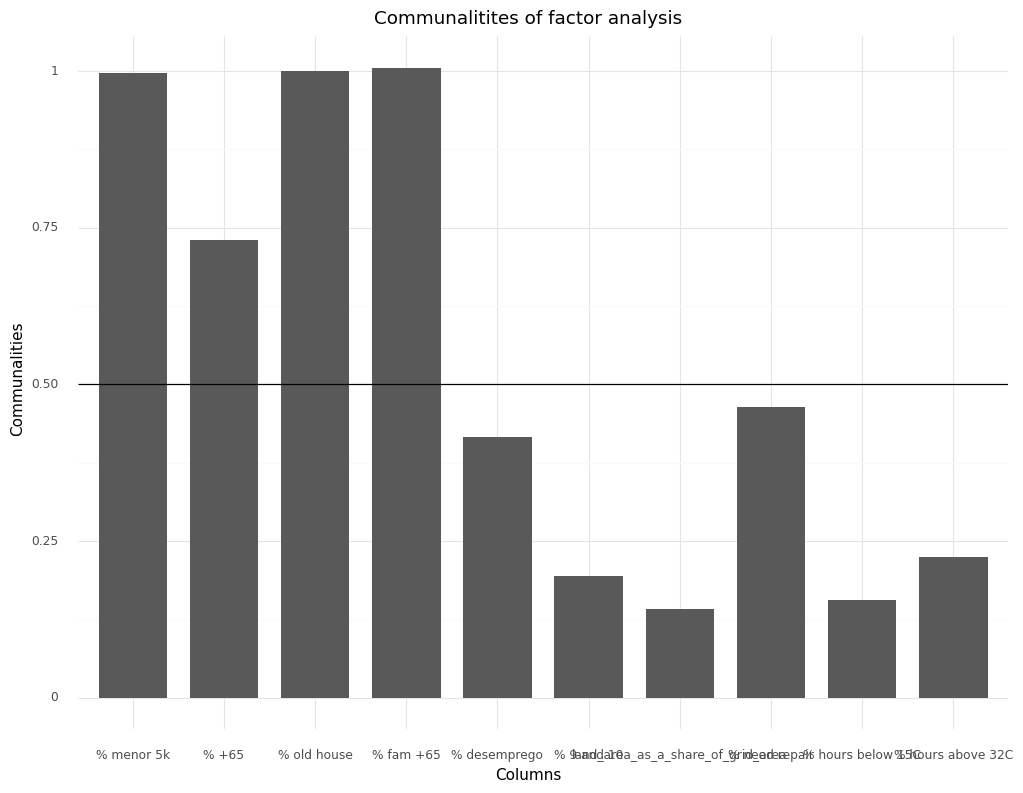

<ggplot: (8765927561969)>

In [224]:
# Data viz
plotnine.options.figure_size = (12, 9)
communality_bar = (
    ggplot(data = df_communalities)+
    geom_bar(aes(x = 'Column',
                 y = 'Communality'),
             width = 0.75,
             stat = 'identity')+
    geom_hline(yintercept = 0.5)+
    scale_x_discrete(limits = df_communalities['Column'].tolist())+
    labs(title = 'Communalitites of factor analysis')+
    xlab('Columns')+
    ylab('Communalities')+
    theme_minimal()
)
# Display the viz
communality_bar

In [225]:
# Check Eigenvalues
eigenValue, value = fa.get_eigenvalues()
eigenValue

array([2.84792122, 1.68776228, 1.16106861, 1.12319136, 0.94000225,
       0.75301398, 0.55084884, 0.43017681, 0.39882113, 0.10719351])

In [226]:
# Convert the results into a dataframe
df_eigen = pd.DataFrame({'Factor': range(1, len(eigenValue) + 1), 'Eigen value': eigenValue})
df_eigen.style.apply(highlightEigenvalue, subset = ['Eigen value'])

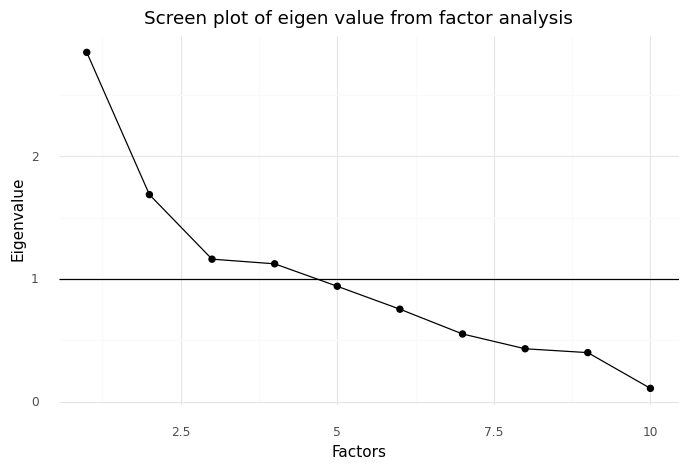

<ggplot: (8765930235070)>

In [227]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
scree_eigenvalue = (
    ggplot(data = df_eigen)+
    geom_hline(yintercept = 1)+
    geom_line(aes(x = 'Factor',
                  y = 'Eigen value'))+
    geom_point(aes(x = 'Factor',
                   y = 'Eigen value'),
               size = 2)+
    labs(title = 'Screen plot of eigen value from factor analysis')+
    xlab('Factors')+
    ylab('Eigenvalue')+
    theme_minimal()
)
# Display the viz
scree_eigenvalue

In [228]:
# Factor analysis without rotation
n_factors = 4
fa = FactorAnalyzer(n_factors = 4, rotation = None)
fa.fit(scaled_censospd)
# Create a factor's names
facs = ['Factors' + ' ' + str(i + 1) for i in range(n_factors)]
print(facs)
# Loading factors
pd.DataFrame(data = fa.loadings_, index = percent_merge.iloc[:,1:11].columns, columns = facs).style.apply(highlightLoadings)

['Factors 1', 'Factors 2', 'Factors 3', 'Factors 4']


In [229]:
# Explained variance
idx = ['SS Loadings', 'Proportion Variance', 'Cumulative Variance']
df_variance = pd.DataFrame(data = fa.get_factor_variance(), index = idx, columns = facs)
# Ratio of variance
ratioVariance = fa.get_factor_variance()[1] / fa.get_factor_variance()[1].sum()
df_ratio_var = pd.DataFrame(data = ratioVariance.reshape((1, n_factors)), index = ['Ratio Variance'], columns = facs)
# New completed dataframe
df_variance.append(df_ratio_var)

Factors 1  Factors 2  Factors 3  Factors 4
SS Loadings           2.578794   1.411786   0.843211   0.456465
Proportion Variance   0.257879   0.141179   0.084321   0.045646
Cumulative Variance   0.257879   0.399058   0.483379   0.529026
Ratio Variance        0.487461   0.266865   0.159389   0.086284

In [230]:
# Factor analysis with rotation
fa = FactorAnalyzer(n_factors = n_factors, rotation = 'varimax')
fa.fit(scaled_censospd)
# Create a factor's names
facs = ['Factors' + ' ' + str(i + 1) for i in range(n_factors)]
print(facs)
# Loading factors
pd.DataFrame(data = fa.loadings_, index = percent_merge.iloc[:,1:11].columns, columns = facs).style.apply(highlightLoadings)

['Factors 1', 'Factors 2', 'Factors 3', 'Factors 4']


In [231]:
# Explained variance
idx = ['SS Loadings', 'Proportion Variance', 'Cumulative Variance']
df_variance = pd.DataFrame(data = fa.get_factor_variance(), index = idx, columns = facs)
# Ratio of variance
ratioVariance = fa.get_factor_variance()[1] / fa.get_factor_variance()[1].sum()
df_ratio_var = pd.DataFrame(data = ratioVariance.reshape((1, n_factors)), index = ['Ratio Variance'], columns = facs)
# New completed dataframe
df_variance.append(df_ratio_var)

Factors 1  Factors 2  Factors 3  Factors 4
SS Loadings           2.400773   1.212834   0.887804   0.788845
Proportion Variance   0.240077   0.121283   0.088780   0.078885
Cumulative Variance   0.240077   0.361361   0.450141   0.529026
Ratio Variance        0.453810   0.229258   0.167819   0.149113

In [232]:
# The factor scores
df_factors = pd.DataFrame(data = fa.fit_transform(scaled_censospd),
                          index = pd.MultiIndex.from_frame(percent_merge[['GEO_COD_DSG']]),
                          columns = facs)
df_factors

Factors 1  Factors 2  Factors 3  Factors 4
GEO_COD_DSG                                                      
Águeda                 -0.286604  -0.238647  -0.925355  -0.597909
Albergaria-a-Velha     -0.664152   0.145756  -0.910955   0.162788
Anadia                  0.276505  -0.396976  -0.689204   0.104267
Arouca                 -0.484763  -0.446295   0.563192   0.143849
Aveiro                 -1.056636   0.096328  -1.143933  -0.455253
...                          ...        ...        ...        ...
São Roque do Pico      -0.197474  -0.232273   0.980380  -0.877959
Horta                  -0.908357  -0.008630  -0.066727  -1.110373
Lajes das Flores       -1.216803   2.967698   2.139548   0.847390
Santa Cruz das Flores  -0.845787   2.017782   1.074609   0.101530
Corvo                  -2.066869   7.182733   1.549258   2.253010

[308 rows x 4 columns]

In [233]:
# Standardize the factors facs
scaler = MinMaxScaler()
df_factors_scaled = pd.DataFrame(data = scaler.fit_transform(percent_merge.iloc[:,1:11]))
                                 #index = pd.MultiIndex.from_frame(facs[['GEO_COD_DSG']]),
                                 #columns = facs)
df_factors_scaled

0         1         2         3         4         5         6  \
0    0.207384  0.523979  0.184273  0.345069  0.480072  0.605967  0.456654   
1    0.228789  0.466443  0.250599  0.290547  0.497540  0.605967  0.702772   
2    0.343149  0.592658  0.215124  0.488574  0.398239  0.605967  0.604723   
3    0.531540  0.466444  0.182075  0.373942  0.379323  0.605967  0.302496   
4    0.116443  0.437179  0.207344  0.191948  0.488082  0.605967  0.639278   
..        ...       ...       ...       ...       ...       ...       ...   
303  0.507390  0.424821  0.172593  0.394063  0.208601  1.000000  0.000000   
304  0.250828  0.386660  0.169522  0.206002  0.386778  1.000000  0.000000   
305  0.630040  0.447595  0.532475  0.266583  0.148294  1.000000  0.000000   
306  0.454706  0.403284  0.423184  0.277403  0.334683  1.000000  0.000000   
307  0.360228  0.400560  1.000000  0.106594  0.128884  1.000000  0.000000   

            7         8    9  
0    0.203217  0.704907  0.0  
1    0.282104  0.704907  0.0  
2    0.307252  0.704907  0.0  
3    0.302668  0.704907  0.0  
4    0.196547  0.704907  0.0  
..        ...       ...  ...  
303       NaN  0.250845  0.0  
304       NaN  0.250845  0.0  
305       NaN  0.250845  0.0  
306       NaN  0.250845  0.0  
307       NaN  0.250845  0.0  

[308 rows x 10 columns]

In [234]:
df_ratio_var

Factors 1  Factors 2  Factors 3  Factors 4
Ratio Variance    0.45381   0.229258   0.167819   0.149113

In [235]:
# Perform aggregation
dict_index = {}
for i in range(n_factors):
    key = df_factors.columns[i]
    value = df_factors.iloc[:,i].values * df_ratio_var.iloc[:,i].values
    dict_index.update({key:value})
# Create a dataframe
df_index = pd.DataFrame(dict_index,
                        index = pd.MultiIndex.from_frame(percent_merge[['GEO_COD_DSG']]))
df_index

Factors 1  Factors 2  Factors 3  Factors 4
GEO_COD_DSG                                                      
Águeda                 -0.130064  -0.054712  -0.155292  -0.089156
Albergaria-a-Velha     -0.301399   0.033416  -0.152875   0.024274
Anadia                  0.125481  -0.091010  -0.115661   0.015548
Arouca                 -0.219991  -0.102317   0.094514   0.021450
Aveiro                 -0.479512   0.022084  -0.191973  -0.067884
...                          ...        ...        ...        ...
São Roque do Pico      -0.089616  -0.053250   0.164526  -0.130915
Horta                  -0.412222  -0.001979  -0.011198  -0.165571
Lajes das Flores       -0.552198   0.680369   0.359056   0.126357
Santa Cruz das Flores  -0.383827   0.462593   0.180339   0.015139
Corvo                  -0.937967   1.646700   0.259994   0.335953

[308 rows x 4 columns]

In [236]:
# Assign the composite index and ranking
df_index['Composite Index'] = df_index.sum(axis = 1).values
df_index['Rank'] = df_index['Composite Index'].rank(ascending = False)
df_index = df_index.sort_values(by = 'Rank').reset_index()
df_index

GEO_COD_DSG  Factors 1  Factors 2  Factors 3  Factors 4  Composite Index  \
0       Alcoutim   1.305280   0.229940  -0.113300  -0.056347         1.365573   
1          Corvo  -0.937967   1.646700   0.259994   0.335953         1.304681   
2         Sousel   0.499059   0.623780  -0.008388   0.150216         1.264667   
3        Mértola   0.799393   0.379583   0.070768  -0.050420         1.199324   
4     Montalegre   0.702016   0.039607   0.261697   0.153375         1.156695   
..           ...        ...        ...        ...        ...              ...   
303        Braga  -0.702409  -0.137629  -0.107078  -0.098135        -1.045251   
304     Sesimbra  -0.544402  -0.285299  -0.099086  -0.289713        -1.218500   
305       Seixal  -0.538602  -0.315186  -0.137043  -0.263034        -1.253865   
306   Santa Cruz  -1.005283  -0.129029  -0.078774  -0.061095        -1.274180   
307  Porto Santo  -0.770350  -0.294998  -0.160953  -0.124375        -1.350676   

      Rank  
0      1.0  
1      2.0  
2      3.0  
3      4.0  
4      5.0  
..     ...  
303  304.0  
304  305.0  
305  306.0  
306  307.0  
307  308.0  

[308 rows x 7 columns]

In [237]:
# Above and below the average
stat = ['Above' if i > df_index['Composite Index'].mean() else 'Below' for i in df_index['Composite Index']]
df_index['Status'] = stat
df_index

GEO_COD_DSG  Factors 1  Factors 2  Factors 3  Factors 4  Composite Index  \
0       Alcoutim   1.305280   0.229940  -0.113300  -0.056347         1.365573   
1          Corvo  -0.937967   1.646700   0.259994   0.335953         1.304681   
2         Sousel   0.499059   0.623780  -0.008388   0.150216         1.264667   
3        Mértola   0.799393   0.379583   0.070768  -0.050420         1.199324   
4     Montalegre   0.702016   0.039607   0.261697   0.153375         1.156695   
..           ...        ...        ...        ...        ...              ...   
303        Braga  -0.702409  -0.137629  -0.107078  -0.098135        -1.045251   
304     Sesimbra  -0.544402  -0.285299  -0.099086  -0.289713        -1.218500   
305       Seixal  -0.538602  -0.315186  -0.137043  -0.263034        -1.253865   
306   Santa Cruz  -1.005283  -0.129029  -0.078774  -0.061095        -1.274180   
307  Porto Santo  -0.770350  -0.294998  -0.160953  -0.124375        -1.350676   

      Rank Status  
0      1.0  Above  
1      2.0  Above  
2      3.0  Above  
3      4.0  Above  
4      5.0  Above  
..     ...    ...  
303  304.0  Below  
304  305.0  Below  
305  306.0  Below  
306  307.0  Below  
307  308.0  Below  

[308 rows x 8 columns]

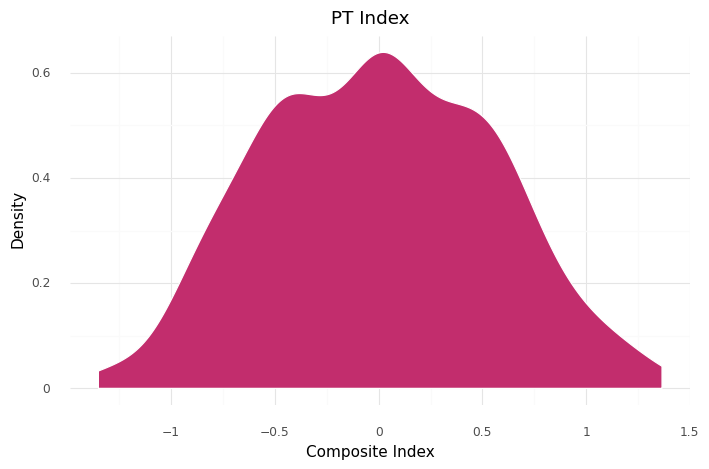

<ggplot: (8765928007867)>

In [238]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
composite_index_distribution = (
    ggplot(data = df_index)+
    geom_density(aes(x = 'Composite Index'),
                 color = 'white',
                 fill = '#c22d6d')+
    labs(title = 'PT Index')+
    xlab('Composite Index')+
    ylab('Density')+
    theme_minimal()
)
# Display the viz
composite_index_distribution

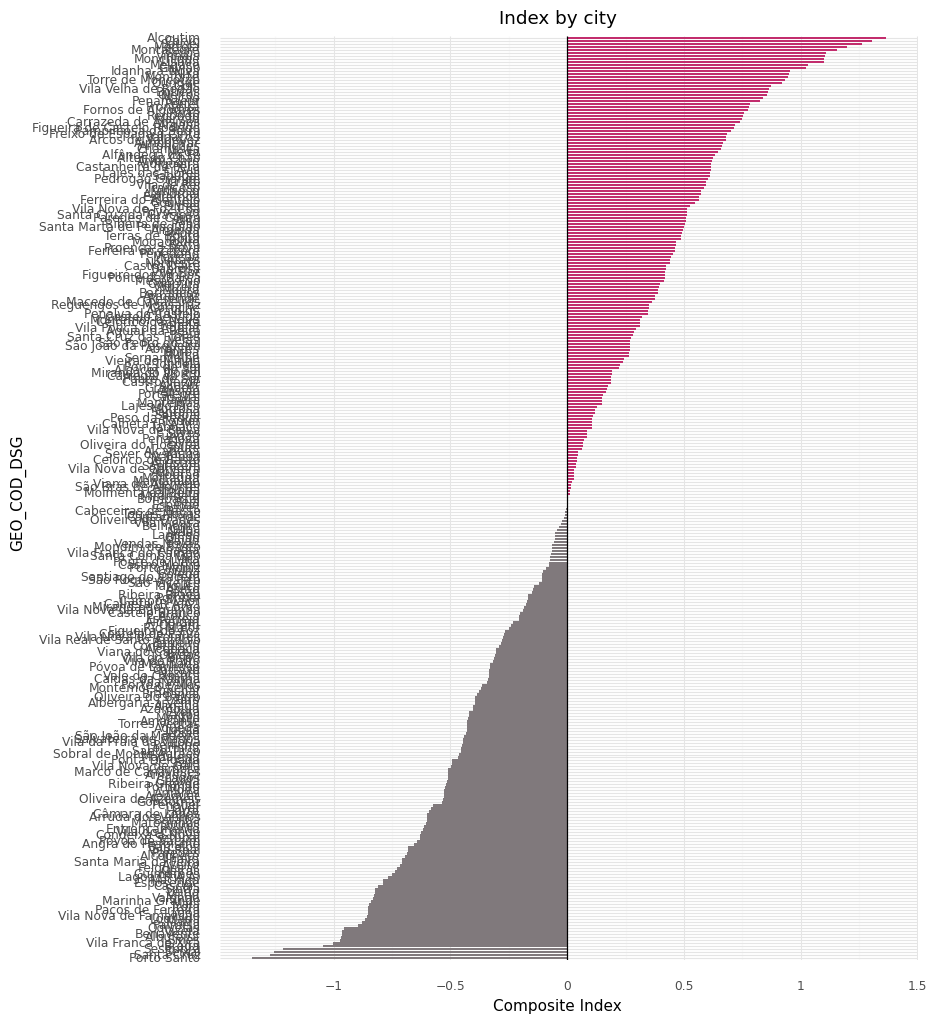

<ggplot: (8765927354748)>

In [239]:
# Redefine the data
df_index_reverse = df_index.sort_values(by = 'Rank', ascending = False).reset_index(drop = True)
# Data viz
plotnine.options.figure_size = (9, 12)
composite_index_province = (
    ggplot(data = df_index_reverse)+
    geom_bar(aes(x = 'GEO_COD_DSG',
                 y = 'Composite Index'),
             width = 0.75,
             fill = np.where(df_index_reverse['Status'] == 'Above','#c22d6d','#80797c'),
             stat = 'identity')+
    geom_hline(yintercept = df_index_reverse['Composite Index'].mean())+
    scale_x_discrete(limits = df_index_reverse['GEO_COD_DSG'].tolist())+
    labs(title = 'Index by city')+
    xlab('GEO_COD_DSG')+
    ylab('Composite Index')+
    coord_flip()+
    theme_minimal()
)
# Display the viz
composite_index_province

In [240]:
df_index_reverse

GEO_COD_DSG  Factors 1  Factors 2  Factors 3  Factors 4  Composite Index  \
0    Porto Santo  -0.770350  -0.294998  -0.160953  -0.124375        -1.350676   
1     Santa Cruz  -1.005283  -0.129029  -0.078774  -0.061095        -1.274180   
2         Seixal  -0.538602  -0.315186  -0.137043  -0.263034        -1.253865   
3       Sesimbra  -0.544402  -0.285299  -0.099086  -0.289713        -1.218500   
4          Braga  -0.702409  -0.137629  -0.107078  -0.098135        -1.045251   
..           ...        ...        ...        ...        ...              ...   
303   Montalegre   0.702016   0.039607   0.261697   0.153375         1.156695   
304      Mértola   0.799393   0.379583   0.070768  -0.050420         1.199324   
305       Sousel   0.499059   0.623780  -0.008388   0.150216         1.264667   
306        Corvo  -0.937967   1.646700   0.259994   0.335953         1.304681   
307     Alcoutim   1.305280   0.229940  -0.113300  -0.056347         1.365573   

      Rank Status  
0    308.0  Below  
1    307.0  Below  
2    306.0  Below  
3    305.0  Below  
4    304.0  Below  
..     ...    ...  
303    5.0  Above  
304    4.0  Above  
305    3.0  Above  
306    2.0  Above  
307    1.0  Above  

[308 rows x 8 columns]

In [241]:
# Redefine the data
df_contribution = pd.melt(frame = df_index_reverse,
                          id_vars = 'GEO_COD_DSG',
                          value_vars = facs,
                          var_name = 'Factor',
                          value_name = 'Factor Value')
df_contribution

GEO_COD_DSG     Factor  Factor Value
0     Porto Santo  Factors 1     -0.770350
1      Santa Cruz  Factors 1     -1.005283
2          Seixal  Factors 1     -0.538602
3        Sesimbra  Factors 1     -0.544402
4           Braga  Factors 1     -0.702409
...           ...        ...           ...
1227   Montalegre  Factors 4      0.153375
1228      Mértola  Factors 4     -0.050420
1229       Sousel  Factors 4      0.150216
1230        Corvo  Factors 4      0.335953
1231     Alcoutim  Factors 4     -0.056347

[1232 rows x 3 columns]

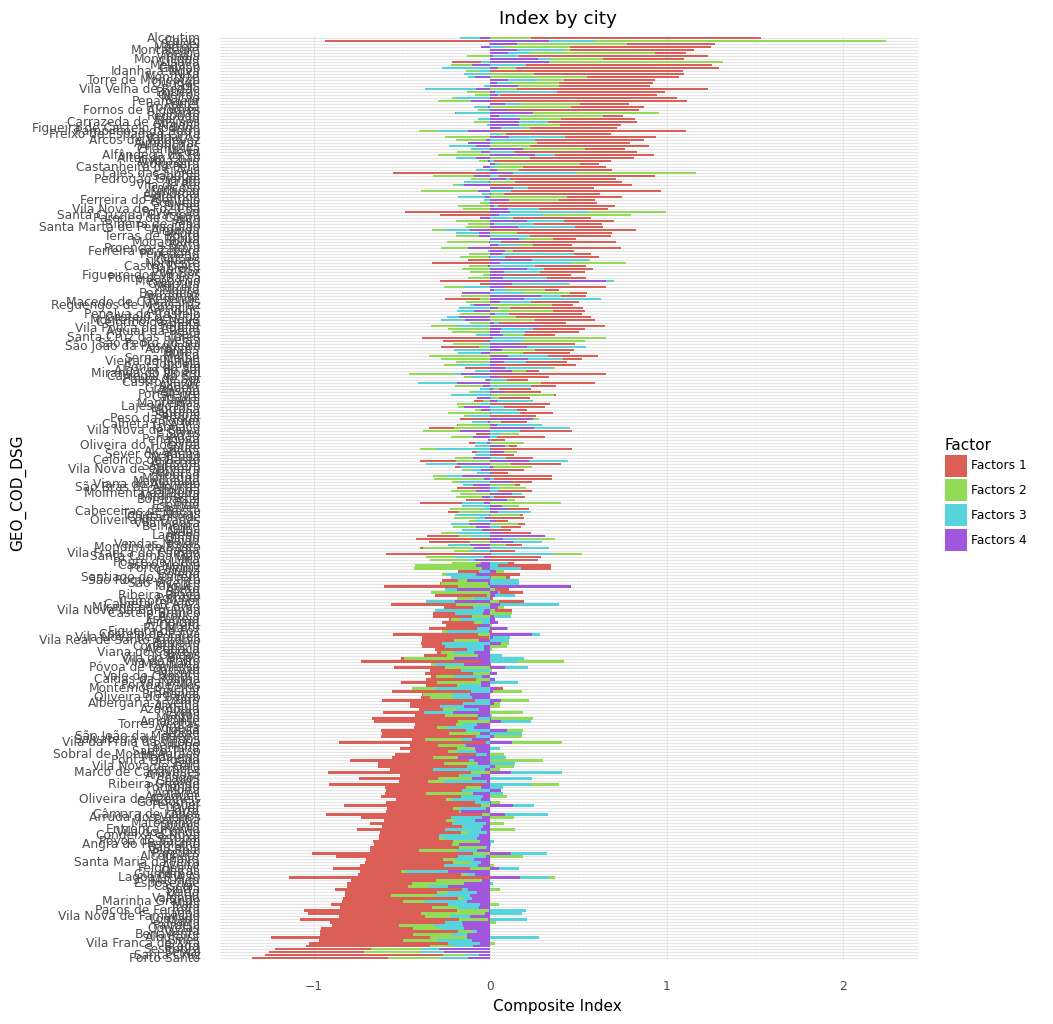

<ggplot: (8765929155497)>

In [242]:
# Data viz
plotnine.options.figure_size = (9, 12)
contribution_factors_composite_index = (
    ggplot(data = df_contribution)+
    geom_bar(aes(x = 'GEO_COD_DSG',
                 y = 'Factor Value',
                 fill = 'Factor'),
             width = 0.75,
             position = 'stack',
             stat = 'identity')+
    scale_x_discrete(limits = df_index_reverse['GEO_COD_DSG'].tolist())+
    labs(title = 'Index by city')+
    xlab('GEO_COD_DSG')+
    ylab('Composite Index')+
    coord_flip()+
    theme_minimal()
)
# Display the viz
contribution_factors_composite_index

In [243]:
# Basic statistics
df_index.groupby('GEO_COD_DSG').agg(
    {
        'Composite Index': ['mean', 'median']
    }
).reset_index()

GEO_COD_DSG Composite Index          
                                   mean    median
0              Abrantes        0.268057  0.268057
1       Aguiar da Beira        0.287512  0.287512
2             Alandroal        0.574064  0.574064
3    Albergaria-a-Velha       -0.396585 -0.396585
4             Albufeira       -0.969342 -0.969342
..                  ...             ...       ...
303             Vouzela        0.394241  0.394241
304              Águeda       -0.429223 -0.429223
305               Évora       -0.418788 -0.418788
306              Ílhavo       -0.706669 -0.706669
307              Óbidos       -0.307379 -0.307379

[308 rows x 3 columns]

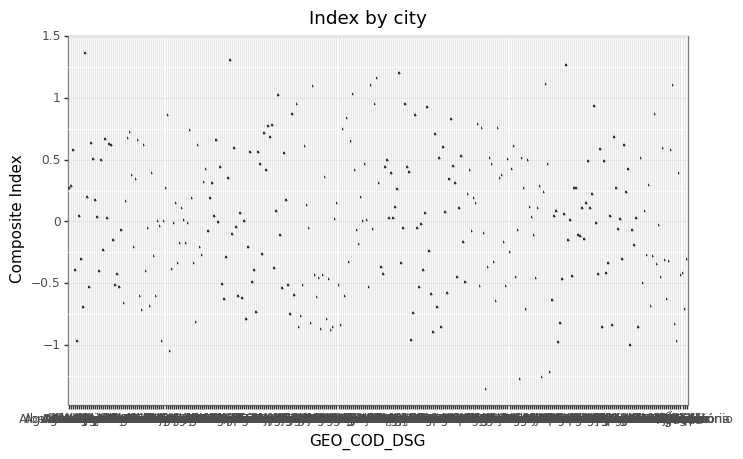

<ggplot: (8765928663393)>

In [244]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
composite_index_region = (
    ggplot(data = df_index)+
    geom_boxplot(aes(x = 'GEO_COD_DSG',
                     y = 'Composite Index'),
                     fill = '#c22d6d',
                 show_legend = False)+
    labs(title = 'Index by city')+
    xlab('GEO_COD_DSG')+
    ylab('Composite Index')+
    theme_bw()
)
# Display the viz
composite_index_region

## PCA per SD Level 
(as done by Silva et al, referenced supra)

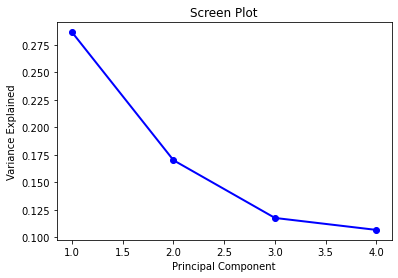

[0.28634372 0.16995162 0.11748791 0.10659786]


In [245]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

#define PCA model to use
pca = PCA(n_components=4)

#scaled_censospd = scaler.fit_transform(percent_merge.iloc[:,1:8].astype(np.float64))

#fit PCA model to data
pca_fit = pca.fit(scaled_censospd)



PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Screen Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

print(pca.explained_variance_ratio_)

In [246]:
import scipy.stats as stats
df_index.iloc[:,1:5].apply(stats.zscore)

Factors 1  Factors 2  Factors 3  Factors 4
0     2.853162   1.032991  -0.718929  -0.479400
1    -2.050266   7.397705   1.649763   2.858283
2     1.090875   2.802295  -0.053223   1.278034
3     1.747363   1.705256   0.449048  -0.428976
4     1.534511   0.177931   1.660563   1.304914
..         ...        ...        ...        ...
303  -1.535369  -0.618290  -0.679451  -0.834935
304  -1.189988  -1.281690  -0.628736  -2.464878
305  -1.177311  -1.415956  -0.869587  -2.237889
306  -2.197410  -0.579654  -0.499851  -0.519796
307  -1.683879  -1.325262  -1.021310  -1.058179

[308 rows x 4 columns]

In [247]:
average = df_index['Factors 1'].mean()
standardDeviation = df_index['Factors 1'].std()

In [248]:
value1 = -((standardDeviation**2) + average)
value2 = -((standardDeviation) + average)
value3 = average
value4 = +(standardDeviation + average) 
value5 = +((standardDeviation**2) + average)  

In [249]:
df_index.loc[df_index['Factors 1'].between(-np.inf,value1,'left'),'grade'] = 1
df_index.loc[df_index['Factors 1'].between(value1,value2,'both'),'grade'] = 2
df_index.loc[df_index['Factors 1'].between(value2,value3,'both'),'grade'] = 3
df_index.loc[df_index['Factors 1'].between(value3,value4,'both'),'grade'] = 4
df_index.loc[df_index['Factors 1'].between(value4,value5,'both'),'grade'] = 5
df_index.loc[df_index['Factors 1'].between(value5,np.inf,'right'),'grade'] = 6

In [250]:
df_index['grade'].unique()

array([6., 1., 4., 3.])

In [251]:
df_index

GEO_COD_DSG  Factors 1  Factors 2  Factors 3  Factors 4  Composite Index  \
0       Alcoutim   1.305280   0.229940  -0.113300  -0.056347         1.365573   
1          Corvo  -0.937967   1.646700   0.259994   0.335953         1.304681   
2         Sousel   0.499059   0.623780  -0.008388   0.150216         1.264667   
3        Mértola   0.799393   0.379583   0.070768  -0.050420         1.199324   
4     Montalegre   0.702016   0.039607   0.261697   0.153375         1.156695   
..           ...        ...        ...        ...        ...              ...   
303        Braga  -0.702409  -0.137629  -0.107078  -0.098135        -1.045251   
304     Sesimbra  -0.544402  -0.285299  -0.099086  -0.289713        -1.218500   
305       Seixal  -0.538602  -0.315186  -0.137043  -0.263034        -1.253865   
306   Santa Cruz  -1.005283  -0.129029  -0.078774  -0.061095        -1.274180   
307  Porto Santo  -0.770350  -0.294998  -0.160953  -0.124375        -1.350676   

      Rank Status  grade  
0      1.0  Above    6.0  
1      2.0  Above    1.0  
2      3.0  Above    6.0  
3      4.0  Above    6.0  
4      5.0  Above    6.0  
..     ...    ...    ...  
303  304.0  Below    1.0  
304  305.0  Below    1.0  
305  306.0  Below    1.0  
306  307.0  Below    1.0  
307  308.0  Below    1.0  

[308 rows x 9 columns]

In [252]:
average_2 = df_index['Factors 2'].mean()
standardDeviation_2 = df_index['Factors 2'].std()

In [253]:
value1_2 = -((standardDeviation_2**2) + average_2)
value2_2 = -((standardDeviation_2) + average_2)
value3_2 = average_2
value4_2 = +(standardDeviation_2 + average_2) 
value5_2 = +((standardDeviation_2**2) + average_2) 

In [254]:
df_index.loc[df_index['Factors 2'].between(-np.inf,value1_2,'left'),'grade 2'] = 1
df_index.loc[df_index['Factors 2'].between(value1_2,value2_2,'both'),'grade 2'] = 2
df_index.loc[df_index['Factors 2'].between(value2_2,value3_2,'both'),'grade 2'] = 3
df_index.loc[df_index['Factors 2'].between(value3_2,value4_2,'both'),'grade 2'] = 4
df_index.loc[df_index['Factors 2'].between(value4_2,value5_2,'both'),'grade 2'] = 5
df_index.loc[df_index['Factors 2'].between(value5_2,np.inf,'right'),'grade 2'] = 6

In [255]:
average_3 = df_index['Factors 3'].mean()
standardDeviation_3 = df_index['Factors 3'].std()

In [256]:
value1_3 = -((standardDeviation_3**2) + average_3)
value2_3 = -((standardDeviation_3) + average_3)
value3_3 = average_3
value4_3 = +(standardDeviation_3 + average_3) 
value5_3 = +((standardDeviation_3**2) + average_3) 

In [257]:
df_index.loc[df_index['Factors 3'].between(-np.inf,value1_3,'left'),'grade 3'] = 1
df_index.loc[df_index['Factors 3'].between(value1_3,value2_3,'both'),'grade 3'] = 2
df_index.loc[df_index['Factors 3'].between(value2_3,value3_3,'both'),'grade 3'] = 3
df_index.loc[df_index['Factors 3'].between(value3_3,value4_3,'both'),'grade 3'] = 4
df_index.loc[df_index['Factors 3'].between(value4_3,value5_3,'both'),'grade 3'] = 5
df_index.loc[df_index['Factors 3'].between(value5_3,np.inf,'right'),'grade 3'] = 6

In [258]:
average_4 = df_index['Factors 4'].mean()
standardDeviation_4 = df_index['Factors 4'].std()

In [259]:
value1_4 = -((standardDeviation_4**2) + average_4)
value2_4 = -((standardDeviation_4) + average_4)
value3_4 = average_4
value4_4 = +(standardDeviation_4 + average_4) 
value5_4 = +((standardDeviation_4**2) + average_4) 

In [260]:
df_index.loc[df_index['Factors 4'].between(-np.inf,value1_4,'left'),'grade 4'] = 1
df_index.loc[df_index['Factors 4'].between(value1_4,value2_4,'both'),'grade 4'] = 2
df_index.loc[df_index['Factors 4'].between(value2_4,value3_4,'both'),'grade 4'] = 3
df_index.loc[df_index['Factors 4'].between(value3_4,value4_4,'both'),'grade 4'] = 4
df_index.loc[df_index['Factors 4'].between(value4_4,value5_4,'both'),'grade 4'] = 5
df_index.loc[df_index['Factors 4'].between(value5_4,np.inf,'right'),'grade 4'] = 6

In [261]:
df_index

GEO_COD_DSG  Factors 1  Factors 2  Factors 3  Factors 4  Composite Index  \
0       Alcoutim   1.305280   0.229940  -0.113300  -0.056347         1.365573   
1          Corvo  -0.937967   1.646700   0.259994   0.335953         1.304681   
2         Sousel   0.499059   0.623780  -0.008388   0.150216         1.264667   
3        Mértola   0.799393   0.379583   0.070768  -0.050420         1.199324   
4     Montalegre   0.702016   0.039607   0.261697   0.153375         1.156695   
..           ...        ...        ...        ...        ...              ...   
303        Braga  -0.702409  -0.137629  -0.107078  -0.098135        -1.045251   
304     Sesimbra  -0.544402  -0.285299  -0.099086  -0.289713        -1.218500   
305       Seixal  -0.538602  -0.315186  -0.137043  -0.263034        -1.253865   
306   Santa Cruz  -1.005283  -0.129029  -0.078774  -0.061095        -1.274180   
307  Porto Santo  -0.770350  -0.294998  -0.160953  -0.124375        -1.350676   

      Rank Status  grade  grade 2  grade 3  grade   grade 4  
0      1.0  Above    6.0      6.0      3.0     NaN      3.0  
1      2.0  Above    1.0      6.0      6.0     NaN      6.0  
2      3.0  Above    6.0      6.0      3.0     NaN      6.0  
3      4.0  Above    6.0      6.0      6.0     NaN      3.0  
4      5.0  Above    6.0      4.0      6.0     NaN      6.0  
..     ...    ...    ...      ...      ...     ...      ...  
303  304.0  Below    1.0      3.0      3.0     NaN      3.0  
304  305.0  Below    1.0      1.0      3.0     NaN      1.0  
305  306.0  Below    1.0      1.0      3.0     NaN      1.0  
306  307.0  Below    1.0      3.0      3.0     NaN      3.0  
307  308.0  Below    1.0      1.0      1.0     NaN      1.0  

[308 rows x 13 columns]

In [262]:
df_index['grade all'] = df_index['grade'] + df_index['grade 2'] + df_index['grade 3'] + df_index['grade 4']

In [263]:
df_index['grade all'].isna().sum()

0

## Shapefiles

In [264]:
import geopandas as gpd
fpbgri = "/content/drive/Shareddrives/Reliable Project/Data/portugal2011.zip (Unzipped Files)/CONTINENTE/BGRI11_CONT.shp" #concelhos
map_fpbgri = gpd.read_file(fpbgri) 

In [265]:
map_fpbgri

OBJECTID DTMN11 FR11 SEC11 SS11       BGRI11   LUG11  LUG11DESIG  \
0            548   0407   02   001   04  04070200104  013810     Abreiro   
1            549   0407   02   001   06  04070200106  013810     Abreiro   
2            550   0407   02   001   01  04070200101  013811     Milhais   
3            551   0407   02   001   02  04070200102  013811     Milhais   
4            552   0407   29   001   03  04072900103  013866   Pai Torto   
...          ...    ...  ...   ...  ...          ...     ...         ...   
255839         0   0101   01   001   15  01010100115  014426       Lomba   
255840         0   0101   01   001   14  01010100114  014428  Vila Mendo   
255841         0   0101   01   001   01  01010100101  014420     Alcafaz   
255842         0   0101   01   001   10  01010100110  014422         Foz   
255843         0   0101   01   001   09  01010100109  014427     Povinha   

                                                 geometry  
0       POLYGON ((70385.364 187253.985, 70468.973 1871...  
1       POLYGON ((70345.582 187206.405, 70365.695 1871...  
2       POLYGON ((67451.278 188137.559, 67436.483 1881...  
3       POLYGON ((67881.058 188228.057, 67897.728 1882...  
4       POLYGON ((71675.138 205540.515, 71691.487 2055...  
...                                                   ...  
255839  POLYGON ((-15277.170 96771.640, -15281.176 967...  
255840  POLYGON ((-15422.652 97179.651, -15426.911 971...  
255841  POLYGON ((-16197.871 101120.085, -16197.873 10...  
255842  POLYGON ((-15983.302 98000.233, -15986.565 979...  
255843  POLYGON ((-15907.720 98174.989, -15916.004 981...  

[255844 rows x 9 columns]

In [266]:
map_fpbgri.crs

<Derived Projected CRS: PROJCS["ETRS_1989_TM06-Portugal",GEOGCS["ETRS89",D ...>
Name: ETRS_1989_TM06-Portugal
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [267]:
# Dissolve Methodd
# Aggregate the municcipalities and show the changes
map_fpbgri_mun = map_fpbgri.dissolve(by='DTMN11')
map_fpbgri_mun.head()

geometry  OBJECTID FR11  \
DTMN11                                                                     
0101    POLYGON ((-33550.025 98275.280, -33571.695 982...     11698   09   
0102    POLYGON ((-33493.280 104598.450, -33564.519 10...        84   06   
0103    POLYGON ((-37583.173 81805.498, -37692.371 822...     16651   10   
0104    POLYGON ((-18825.022 136395.648, -18834.048 13...      1588   12   
0105    POLYGON ((-44234.016 104997.621, -44240.326 10...     16666   01   

       SEC11 SS11       BGRI11   LUG11          LUG11DESIG  
DTMN11                                                      
0101     002   09  01010900209  014448         Fermentelos  
0102     001   22  01020600122  014598  Alto dos Barreiros  
0103     001   37  01031000137  999999            Residual  
0104     001   03  01041200103  011401           Silveiras  
0105     005   10  01050100510  014757              Aveiro

In [ ]:
#mergeid = pd.merge(percent_merge, id, how='left', left_on=['GEO_COD_DSG'], right_on=['GEO_COD_DSG'])

In [268]:
map_fpbgri_mun

geometry  OBJECTID FR11  \
DTMN11                                                                     
0101    POLYGON ((-33550.025 98275.280, -33571.695 982...     11698   09   
0102    POLYGON ((-33493.280 104598.450, -33564.519 10...        84   06   
0103    POLYGON ((-37583.173 81805.498, -37692.371 822...     16651   10   
0104    POLYGON ((-18825.022 136395.648, -18834.048 13...      1588   12   
0105    POLYGON ((-44234.016 104997.621, -44240.326 10...     16666   01   
...                                                   ...       ...  ...   
1820    POLYGON ((27127.190 143736.857, 27107.630 1437...     26575   09   
1821    POLYGON ((-4143.326 89155.572, -4145.546 89153...        47   18   
1822    POLYGON ((25306.593 132485.032, 25297.043 1324...     13512   04   
1823    POLYGON ((9027.218 103437.832, 8998.906 103539...      1802   19   
1824    POLYGON ((-7021.718 106050.387, -7016.959 1061...     63845   11   

       SEC11 SS11       BGRI11   LUG11          LUG11DESIG  
DTMN11                                                      
0101     002   09  01010900209  014448         Fermentelos  
0102     001   22  01020600122  014598  Alto dos Barreiros  
0103     001   37  01031000137  999999            Residual  
0104     001   03  01041200103  011401           Silveiras  
0105     005   10  01050100510  014757              Aveiro  
...      ...  ...          ...     ...                 ...  
1820     002   26  18200900226  013114     Várzea da Serra  
1821     001   07  18211800107  019067                Muna  
1822     001   20  18220400120  999999            Residual  
1823     002   02  18231900202  019237        São Martinho  
1824     001   27  18241100127  999999            Residual  

[278 rows x 8 columns]

In [ ]:
#map_fpbgri_mun.to_file('map_fpbgri_mun.shp')  

In [269]:
merge4 = pd.merge(percent_merge, df_index, how='left', left_on=['GEO_COD_DSG'], right_on=['GEO_COD_DSG'])

In [270]:
merge4

GEO_COD_DSG  % menor 5k     % +65  % old house  % fam +65  \
0                   Águeda    0.275344  0.242453     0.146619   0.356157   
1       Albergaria-a-Velha    0.286133  0.215830     0.180966   0.333730   
2                   Anadia    0.343773  0.274231     0.162595   0.415185   
3                   Arouca    0.438726  0.215830     0.145480   0.368033   
4                   Aveiro    0.229508  0.202289     0.158566   0.293173   
..                     ...         ...       ...          ...        ...   
303      São Roque do Pico    0.426554  0.196571     0.140569   0.376309   
304                  Horta    0.297241  0.178913     0.138979   0.298954   
305       Lajes das Flores    0.488372  0.207109     0.326942   0.323873   
306  Santa Cruz das Flores    0.400000  0.186605     0.270344   0.328324   
307                  Corvo    0.352381  0.185345     0.569061   0.258065   

     % desemprego  % 9 and 10  land_area_as_a_share_of_grid_area  \
0        0.108004    0.131306                           0.412738   
1        0.110702    0.131306                           0.635188   
2        0.095365    0.131306                           0.546568   
3        0.092444    0.131306                           0.273406   
4        0.109242    0.131306                           0.577801   
..            ...         ...                                ...   
303      0.066076    0.216689                           0.000000   
304      0.093595    0.216689                           0.000000   
305      0.056761    0.216689                           0.000000   
306      0.085549    0.216689                           0.000000   
307      0.053763    0.216689                           0.000000   

     % need repair  % hours below 15C  ...  Factors 4  Composite Index   Rank  \
0         0.021215           0.500114  ...  -0.089156        -0.429223  231.0   
1         0.028501           0.500114  ...   0.024274        -0.396585  223.0   
2         0.030824           0.500114  ...   0.015548        -0.065643  172.0   
3         0.030400           0.500114  ...   0.021450        -0.206343  194.0   
4         0.020599           0.500114  ...  -0.067884        -0.717286  277.0   
..             ...                ...  ...        ...              ...    ...   
303            NaN           0.177968  ...  -0.130915        -0.109255  182.0   
304            NaN           0.177968  ...  -0.165571        -0.590969  259.0   
305            NaN           0.177968  ...   0.126357         0.613584   46.0   
306            NaN           0.177968  ...   0.015139         0.274245  101.0   
307            NaN           0.177968  ...   0.335953         1.304681    2.0   

     Status  grade  grade 2  grade 3 grade   grade 4  grade all  
0     Below    3.0      3.0      3.0    NaN      3.0       12.0  
1     Below    3.0      4.0      3.0    NaN      6.0       16.0  
2     Below    4.0      3.0      3.0    NaN      6.0       16.0  
3     Below    3.0      3.0      6.0    NaN      6.0       18.0  
4     Below    1.0      4.0      1.0    NaN      3.0        9.0  
..      ...    ...      ...      ...    ...      ...        ...  
303   Below    3.0      3.0      6.0    NaN      1.0       13.0  
304   Below    3.0      3.0      3.0    NaN      1.0       10.0  
305   Above    1.0      6.0      6.0    NaN      6.0       19.0  
306   Above    3.0      6.0      6.0    NaN      6.0       21.0  
307   Above    1.0      6.0      6.0    NaN      6.0       19.0  

[308 rows x 24 columns]

In [271]:
id = merge2[['GEO_COD','GEO_COD_DSG']]

In [272]:
mergeid = pd.merge(merge4, id, how='left', left_on=['GEO_COD_DSG'], right_on=['GEO_COD_DSG'])

In [273]:
map_df = map_fpbgri_mun.merge(mergeid, left_on='DTMN11', right_on='GEO_COD', how='inner')

In [274]:
map_df

geometry  OBJECTID FR11 SEC11  \
0    POLYGON ((-33550.025 98275.280, -33571.695 982...     11698   09   002   
1    POLYGON ((-33493.280 104598.450, -33564.519 10...        84   06   001   
2    POLYGON ((-37583.173 81805.498, -37692.371 822...     16651   10   001   
3    POLYGON ((-18825.022 136395.648, -18834.048 13...      1588   12   001   
4    POLYGON ((-44234.016 104997.621, -44240.326 10...     16666   01   005   
..                                                 ...       ...  ...   ...   
273  POLYGON ((27127.190 143736.857, 27107.630 1437...     26575   09   002   
274  POLYGON ((-4143.326 89155.572, -4145.546 89153...        47   18   001   
275  POLYGON ((25306.593 132485.032, 25297.043 1324...     13512   04   001   
276  POLYGON ((9027.218 103437.832, 8998.906 103539...      1802   19   002   
277  POLYGON ((-7021.718 106050.387, -7016.959 1061...     63845   11   001   

    SS11       BGRI11   LUG11          LUG11DESIG         GEO_COD_DSG  \
0     09  01010900209  014448         Fermentelos              Águeda   
1     22  01020600122  014598  Alto dos Barreiros  Albergaria-a-Velha   
2     37  01031000137  999999            Residual              Anadia   
3     03  01041200103  011401           Silveiras              Arouca   
4     10  01050100510  014757              Aveiro              Aveiro   
..   ...          ...     ...                 ...                 ...   
273   26  18200900226  013114     Várzea da Serra             Tarouca   
274   07  18211800107  019067                Muna             Tondela   
275   20  18220400120  999999            Residual  Vila Nova de Paiva   
276   02  18231900202  019237        São Martinho               Viseu   
277   27  18241100127  999999            Residual             Vouzela   

     % menor 5k  ...  Composite Index   Rank  Status  grade  grade 2  grade 3  \
0      0.275344  ...        -0.429223  231.0   Below    3.0      3.0      3.0   
1      0.286133  ...        -0.396585  223.0   Below    3.0      4.0      3.0   
2      0.343773  ...        -0.065643  172.0   Below    4.0      3.0      3.0   
3      0.438726  ...        -0.206343  194.0   Below    3.0      3.0      6.0   
4      0.229508  ...        -0.717286  277.0   Below    1.0      4.0      1.0   
..          ...  ...              ...    ...     ...    ...      ...      ...   
273    0.490842  ...        -0.140302  184.0   Below    3.0      3.0      3.0   
274    0.332219  ...         0.225336  110.0   Above    6.0      3.0      1.0   
275    0.477793  ...         0.086865  132.0   Above    6.0      3.0      6.0   
276    0.259213  ...        -0.825462  287.0   Below    3.0      1.0      1.0   
277    0.371107  ...         0.394241   84.0   Above    6.0      3.0      3.0   

     grade   grade 4  grade all  GEO_COD  
0       NaN      3.0       12.0     0101  
1       NaN      6.0       16.0     0102  
2       NaN      6.0       16.0     0103  
3       NaN      6.0       18.0     0104  
4       NaN      3.0        9.0     0105  
..      ...      ...        ...      ...  
273     NaN      6.0       15.0     1820  
274     NaN      6.0       16.0     1821  
275     NaN      1.0       16.0     1822  
276     NaN      3.0        8.0     1823  
277     NaN      6.0       18.0     1824  

[278 rows x 33 columns]

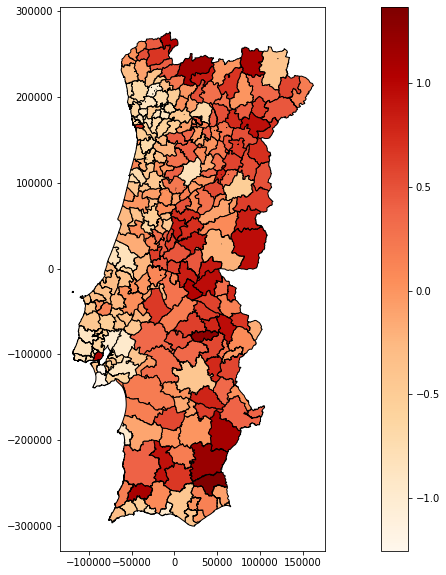

In [275]:
ax= map_df.plot(column='Composite Index', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')

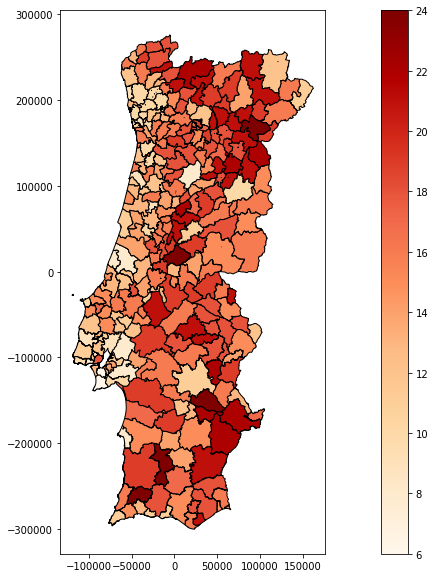

In [276]:
ax= map_df.plot(column='grade all', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')

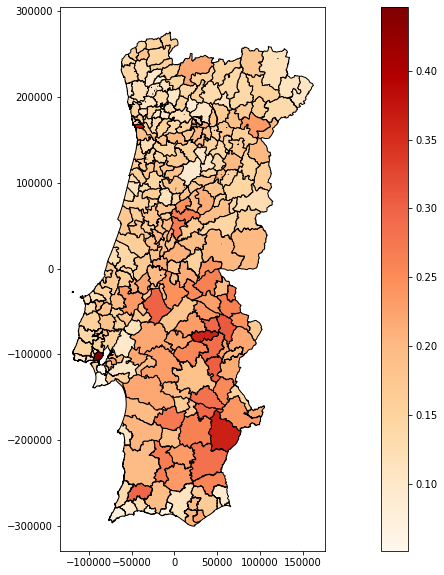

In [277]:
ax= map_df.plot(column='% old house', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')

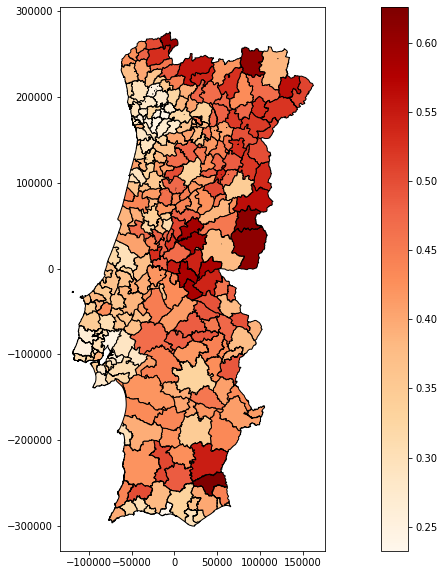

In [278]:
ax= map_df.plot(column='% fam +65', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')

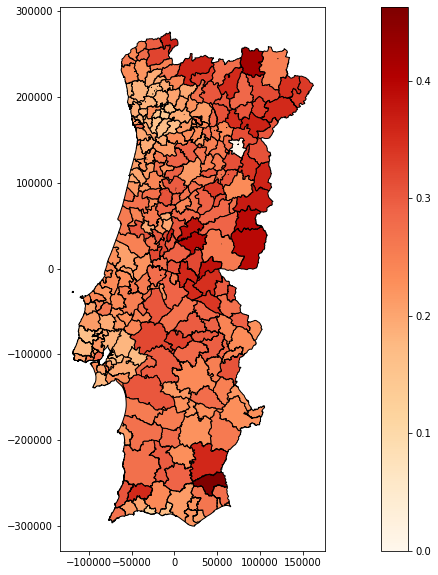

In [279]:
ax= map_df.plot(column='% +65', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')

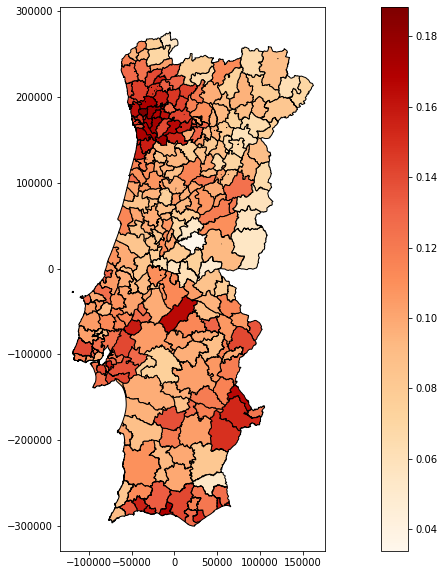

In [280]:
ax= map_df.plot(column='% desemprego', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')

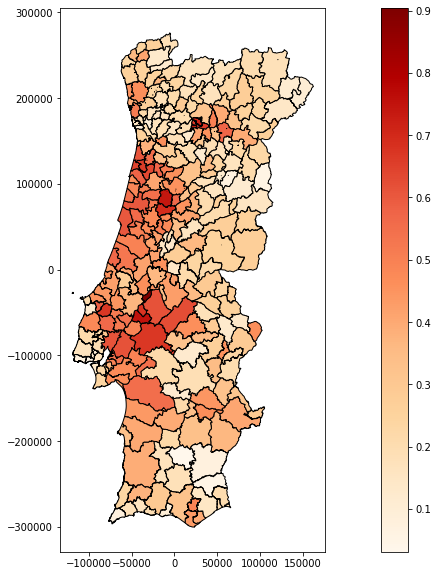

In [281]:
ax= map_df.plot(column='land_area_as_a_share_of_grid_area', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')

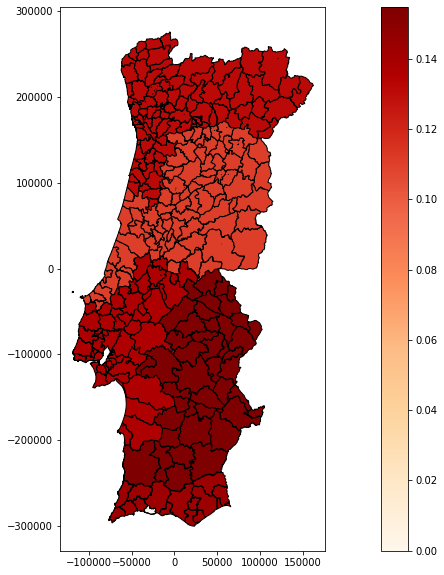

In [282]:
ax= map_df.plot(column='% 9 and 10', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')

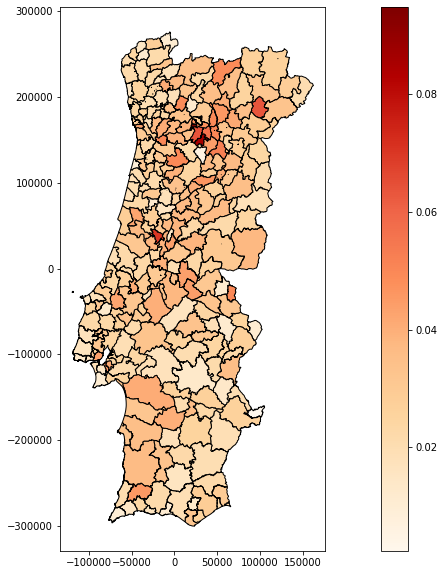

In [283]:
ax= map_df.plot(column='% need repair', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')

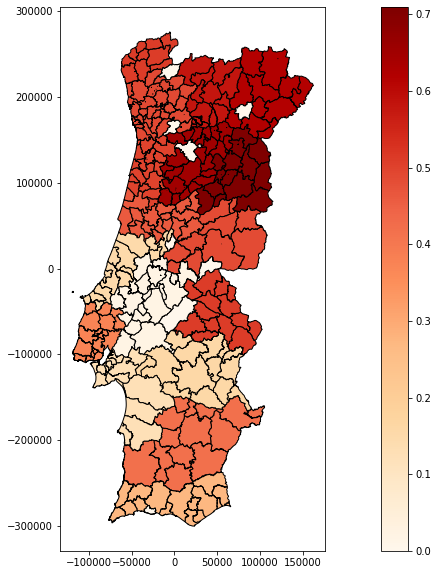

In [284]:
ax= map_df.plot(column='% hours below 15C', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')

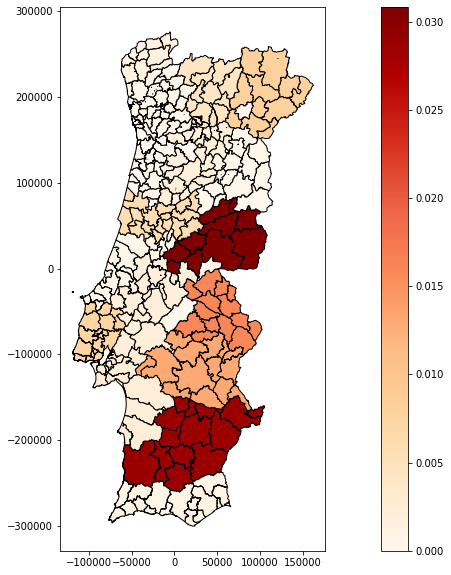

In [285]:
ax= map_df.plot(column='% hours above 32C', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')

#MCDA
- weighted sum
- objectives = [max, max, max, max, max, max, min], - weights = [1,1,1,1,1,1,1]

In [286]:
# import
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import minmax_scale
%matplotlib inline
 
import skcriteria as skc
from skcriteria import DecisionMatrix
from skcriteria.preprocessing.scalers import MaxScaler, MinMaxScaler

In [287]:
merge22 = mergeid.copy()
merge22 =merge22[['GEO_COD_DSG','% menor 5k', '% +65', '% old house', '% fam +65','% desemprego', '% 9 and 10', 'land_area_as_a_share_of_grid_area',]]
merge24 =merge22.iloc[:,1:8].astype(float)
merge22.columns[1:]

Index(['% menor 5k', '% +65', '% old house', '% fam +65', '% desemprego',
       '% 9 and 10', 'land_area_as_a_share_of_grid_area'],
      dtype='object')

In [288]:
criteria_data = skc.mkdm(matrix = merge22.iloc[:,1:8].astype(float).to_numpy(), #needs to be converted to matrix
    objectives = [max, max, max, max, max, max, min],
    alternatives = merge22['GEO_COD_DSG'], 
    criteria = merge22.columns[1:],
    weights = [1,1,1,1,1,1,1]
    )
criteria_data

% menor 5k[▲ 1.0] % +65[▲ 1.0] % old house[▲ 1.0]  \
Águeda                         0.275344     0.242453           0.146619   
Albergaria-a-Velha             0.286133     0.215830           0.180966   
Anadia                         0.343773     0.274231           0.162595   
Arouca                         0.438726     0.215830           0.145480   
Aveiro                         0.229508     0.202289           0.158566   
...                                 ...          ...                ...   
São Roque do Pico              0.426554     0.196571           0.140569   
Horta                          0.297241     0.178913           0.138979   
Lajes das Flores               0.488372     0.207109           0.326942   
Santa Cruz das Flores          0.400000     0.186605           0.270344   
Corvo                          0.352381     0.185345           0.569061   

                      % fam +65[▲ 1.0] % desemprego[▲ 1.0] % 9 and 10[▲ 1.0]  \
Águeda                        0.356157            0.108004          0.131306   
Albergaria-a-Velha            0.333730            0.110702          0.131306   
Anadia                        0.415185            0.095365          0.131306   
Arouca                        0.368033            0.092444          0.131306   
Aveiro                        0.293173            0.109242          0.131306   
...                                ...                 ...               ...   
São Roque do Pico             0.376309            0.066076          0.216689   
Horta                         0.298954            0.093595          0.216689   
Lajes das Flores              0.323873            0.056761          0.216689   
Santa Cruz das Flores         0.328324            0.085549          0.216689   
Corvo                         0.258065            0.053763          0.216689   

                      land_area_as_a_share_of_grid_area[▼ 1.0]  
Águeda                                                0.412738  
Albergaria-a-Velha                                    0.635188  
Anadia                                                0.546568  
Arouca                                                0.273406  
Aveiro                                                0.577801  
...                                                        ...  
São Roque do Pico                                     0.000000  
Horta                                                 0.000000  
Lajes das Flores                                      0.000000  
Santa Cruz das Flores                                 0.000000  
Corvo                                                 0.000000  
[308 Alternatives x 7 Criteria]

In [289]:
criteria_data.weights

% menor 5k                           1.0
% +65                                1.0
% old house                          1.0
% fam +65                            1.0
% desemprego                         1.0
% 9 and 10                           1.0
land_area_as_a_share_of_grid_area    1.0
Name: Weights, dtype: float64

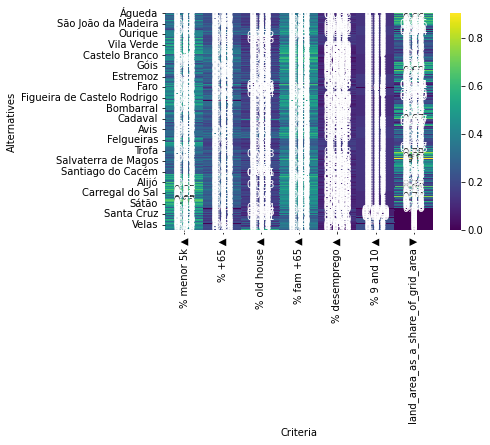

In [290]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import minmax_scale
%matplotlib inline
criteria_data.plot()

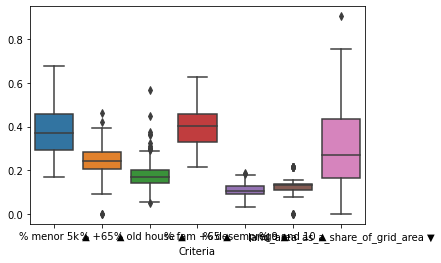

In [291]:
criteria_data.plot("box")

In [292]:
from skcriteria.preprocessing import invert_objectives, scalers
inverter = invert_objectives.MinimizeToMaximize()
dmt = inverter.transform(criteria_data)
dmt

/usr/local/lib/python3.8/dist-packages/skcriteria/preprocessing/invert_objectives.py:78: RuntimeWarning: divide by zero encountered in true_divide


% menor 5k[▲ 1.0] % +65[▲ 1.0] % old house[▲ 1.0]  \
Águeda                         0.275344     0.242453           0.146619   
Albergaria-a-Velha             0.286133     0.215830           0.180966   
Anadia                         0.343773     0.274231           0.162595   
Arouca                         0.438726     0.215830           0.145480   
Aveiro                         0.229508     0.202289           0.158566   
...                                 ...          ...                ...   
São Roque do Pico              0.426554     0.196571           0.140569   
Horta                          0.297241     0.178913           0.138979   
Lajes das Flores               0.488372     0.207109           0.326942   
Santa Cruz das Flores          0.400000     0.186605           0.270344   
Corvo                          0.352381     0.185345           0.569061   

                      % fam +65[▲ 1.0] % desemprego[▲ 1.0] % 9 and 10[▲ 1.0]  \
Águeda                        0.356157            0.108004          0.131306   
Albergaria-a-Velha            0.333730            0.110702          0.131306   
Anadia                        0.415185            0.095365          0.131306   
Arouca                        0.368033            0.092444          0.131306   
Aveiro                        0.293173            0.109242          0.131306   
...                                ...                 ...               ...   
São Roque do Pico             0.376309            0.066076          0.216689   
Horta                         0.298954            0.093595          0.216689   
Lajes das Flores              0.323873            0.056761          0.216689   
Santa Cruz das Flores         0.328324            0.085549          0.216689   
Corvo                         0.258065            0.053763          0.216689   

                      land_area_as_a_share_of_grid_area[▲ 1.0]  
Águeda                                                2.422843  
Albergaria-a-Velha                                    1.574337  
Anadia                                                1.829597  
Arouca                                                3.657569  
Aveiro                                                1.730701  
...                                                        ...  
São Roque do Pico                                          inf  
Horta                                                      inf  
Lajes das Flores                                           inf  
Santa Cruz das Flores                                      inf  
Corvo                                                      inf  
[308 Alternatives x 7 Criteria]

In [331]:
#scaler = scalers.SumScaler(target="both")#
#dmt = scaler.transform(dmt)
#dmt

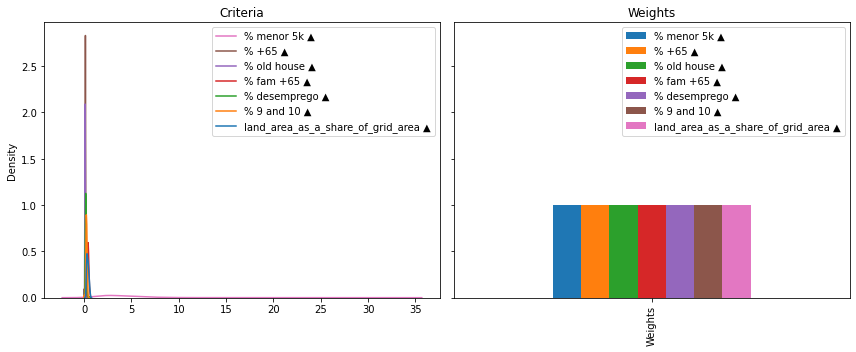

In [293]:
# we are going to user matplotlib capabilities of creat multiple figures
import matplotlib.pyplot as plt

# we create 2 axis with the same y axis
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# in the first axis we plot the criteria KDE
dmt.plot.kde(ax=axs[0])
axs[0].set_title("Criteria")


# in the second axis we plot the weights as bars
dmt.plot.wbar(ax=axs[1])
axs[1].set_title("Weights")

# adjust the layout of the figute based on the content
fig.tight_layout()

In [294]:
import skcriteria
from skcriteria.madm import simple
dec = simple.WeightedSumModel()
rank = dec.evaluate(dmt)  # tansformed version of the data
rank

Águeda  Albergaria-a-Velha  Anadia  Arouca  Aveiro  Castelo de Paiva  Espinho  Estarreja  Santa Maria da Feira  Ílhavo  Mealhada  Murtosa  Oliveira de Azeméis  Oliveira do Bairro  Ovar  São João da Madeira  Sever do Vouga  Vagos  Vale de Cambra  Aljustrel  Almodôvar  Alvito  Barrancos  Beja  Castro Verde  Cuba  Ferreira do Alentejo  Mértola  Moura  Odemira  Ourique  Serpa  Vidigueira  Amares  Barcelos  Braga  Cabeceiras de Basto  Celorico de Basto  Esposende  Fafe  Guimarães  Póvoa de Lanhoso  Terras de Bouro  Vieira do Minho  Vila Nova de Famalicão  Vila Verde  Vizela  Alfândega da Fé  Bragança  Carrazeda de Ansiães  Freixo de Espada à Cinta  Macedo de Cavaleiros  Miranda do Douro  Mirandela  Mogadouro  Torre de Moncorvo  Vila Flor  Vimioso  Vinhais  Belmonte  Castelo Branco  Covilhã  Fundão  Idanha-a-Nova  Oleiros  Penamacor  Proença-a-Nova  Sertã  Vila de Rei  Vila Velha de Ródão  Arganil  Cantanhede  Coimbra  Condeixa-a-Nova  Figueira da Foz  Góis  Lousã  Mira  Miranda do Corvo  Montemor-o-Velho  Oliveira do Hospital  Pampilhosa da Serra  Penacova  Penela  Soure  Tábua  Vila Nova de Poiares  Alandroal  Arraiolos  Borba  Estremoz  Évora  Montemor-o-Novo  Mora  Mourão  Portel  Redondo  Reguengos de Monsaraz  Vendas Novas  Viana do Alentejo  Vila Viçosa  Albufeira  Alcoutim  Aljezur  Castro Marim  Faro  Lagoa  Lagos  Loulé  Monchique  Olhão  Portimão  São Brás de Alportel  Silves  Tavira  Vila do Bispo  Vila Real de Santo António  Aguiar da Beira  Almeida  Celorico da Beira  Figueira de Castelo Rodrigo  Fornos de Algodres  Gouveia  Guarda  Manteigas  Meda  Pinhel  Sabugal  Seia  Trancoso  Vila Nova de Foz Côa  Alcobaça  Alvaiázere  Ansião  Batalha  Bombarral  Caldas da Rainha  Castanheira de Pêra  Figueiró dos Vinhos  Leiria  Marinha Grande  Nazaré  Óbidos  Pedrógão Grande  Peniche  Pombal  Porto de Mós  Alenquer  Arruda dos Vinhos  Azambuja  Cadaval  Cascais  Lisboa  Loures  Lourinhã  Mafra  Oeiras  Sintra  Sobral de Monte Agraço  Torres Vedras  Vila Franca de Xira  Amadora  Odivelas  Alter do Chão  Arronches  Avis  Campo Maior  Castelo de Vide  Crato  Elvas  Fronteira  Gavião  Marvão  Monforte  Nisa  Ponte de Sor  Portalegre  Sousel  Amarante  Baião  Felgueiras  Gondomar  Lousada  Maia  Marco de Canaveses  Matosinhos  Paços de Ferreira  Paredes  Penafiel  Porto  Póvoa de Varzim  Santo Tirso  Valongo  Vila do Conde  Vila Nova de Gaia  Trofa  Abrantes  Alcanena  Almeirim  Alpiarça  Benavente  Cartaxo  Chamusca  Constância  Coruche  Entroncamento  Ferreira do Zêzere  Golegã  Mação  Rio Maior  Salvaterra de Magos  Santarém  Sardoal  Tomar  Torres Novas  Vila Nova da Barquinha  Ourém  Alcácer do Sal  Alcochete  Almada  Barreiro  Grândola  Moita  Montijo  Palmela  Santiago do Cacém  Seixal  Sesimbra  Setúbal  Sines  Arcos de Valdevez  Caminha  Melgaço  Monção  Paredes de Coura  Ponte da Barca  Ponte de Lima  Valença  Viana do Castelo  Vila Nova de Cerveira  Alijó  Boticas  Chaves  Mesão Frio  Mondim de Basto  Montalegre  Murça  Peso da Régua  Ribeira de Pena  Sabrosa  Santa Marta de Penaguião  Valpaços  Vila Pouca de Aguiar  Vila Real  Armamar  Carregal do Sal  Castro Daire  Cinfães  Lamego  Mangualde  Moimenta da Beira  Mortágua  Nelas  Oliveira de Frades  Penalva do Castelo  Penedono  Resende  Santa Comba Dão  São João da Pesqueira  São Pedro do Sul  Sátão  Sernancelhe  Tabuaço  Tarouca  Tondela  Vila Nova de Paiva  Viseu  Vouzela  Calheta (R.A.M.)  Câmara de Lobos  Funchal  Machico  Ponta do Sol  Porto Moniz  Ribeira Brava  Santa Cruz  Santana  São Vicente  Porto Santo  Vila do Porto  Lagoa (R.A.A)  Nordeste  Ponta Delgada  Povoação  Ribeira Grande  Vila Franca do Campo  Angra do Heroísmo  Vila da Praia da Vitória  Santa Cruz da Graciosa  Calheta (R.A.A.)  Velas  Lajes do Pico  Madalena  São Roque do Pico  Horta  Lajes das Flores  Santa Cruz das Flores  Corvo
Rank     237                 304     272     168     302               243      191        303                   221     262       284      287                  291      

In [334]:
rank.e_.score

array([ 3.68272471,  2.83300439,  3.25205298,  5.04938863,  2.85478497,
        3.61136615,  4.49227155,  2.84275004,  3.87821448,  3.35072301,
        3.13768739,  3.05566419,  3.01881699,  3.26267509,  2.87519061,
       28.70588064,  3.18285737,  3.37965833,  4.22358289,  5.85913602,
        7.18184091,  5.81995581,  4.94396385,  4.33242082, 33.56325707,
        4.34270185,  4.14316562, 15.36217993,  4.04505035,  4.29666223,
        7.63148153,  4.48693902,  3.71281718,  4.07159641,  3.41691781,
        5.33221483,  7.32045875,  5.02861513,  3.42641499,  6.07921624,
        6.7950997 ,  6.62430817,  6.26687713,  5.72434858,  4.83625659,
        5.43981339,  8.11698782,  6.10923328,  6.88789644,  4.85707746,
        5.37987928,  5.6873194 , 11.04167436,  5.1351434 ,  8.55375425,
        6.4835232 ,  5.58893334, 10.52281535,  6.91708997,  5.39848205,
        5.29502284,  6.22225945,  5.20453235,  5.44621101,  4.51409201,
        5.5713982 ,  5.75300323,  5.21285402,  8.47545566,  6.21

In [295]:
rank.alternatives

array(['Águeda', 'Albergaria-a-Velha', 'Anadia', 'Arouca', 'Aveiro',
       'Castelo de Paiva', 'Espinho', 'Estarreja', 'Santa Maria da Feira',
       'Ílhavo', 'Mealhada', 'Murtosa', 'Oliveira de Azeméis',
       'Oliveira do Bairro', 'Ovar', 'São João da Madeira',
       'Sever do Vouga', 'Vagos', 'Vale de Cambra', 'Aljustrel',
       'Almodôvar', 'Alvito', 'Barrancos', 'Beja', 'Castro Verde', 'Cuba',
       'Ferreira do Alentejo', 'Mértola', 'Moura', 'Odemira', 'Ourique',
       'Serpa', 'Vidigueira', 'Amares', 'Barcelos', 'Braga',
       'Cabeceiras de Basto', 'Celorico de Basto', 'Esposende', 'Fafe',
       'Guimarães', 'Póvoa de Lanhoso', 'Terras de Bouro',
       'Vieira do Minho', 'Vila Nova de Famalicão', 'Vila Verde',
       'Vizela', 'Alfândega da Fé', 'Bragança', 'Carrazeda de Ansiães',
       'Freixo de Espada à Cinta', 'Macedo de Cavaleiros',
       'Miranda do Douro', 'Mirandela', 'Mogadouro', 'Torre de Moncorvo',
       'Vila Flor', 'Vimioso', 'Vinhais', 'Belmonte', 'Ca

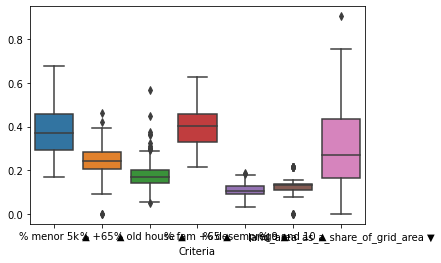

In [296]:
criteria_data.plot("box")

In [297]:
#dec.e_.points
df = pd.DataFrame(rank.e_.score, columns = ['Points'])
df.replace([np.inf, -np.inf], 0, inplace=True)

In [302]:
#linear transformation of the minmax normalized data
interval_min = 3
interval_max = 18

X_std = (df['Points'] - df['Points'].min(axis=0)) / (df['Points'].max(axis=0) - df['Points'].min(axis=0))

X_scaled = X_std * (1 - 24) + 1


In [303]:
X_scaled

0     -1.523672
1     -0.941382
2     -1.228545
3     -2.460211
4     -0.956308
         ...   
303    1.000000
304    1.000000
305    1.000000
306    1.000000
307    1.000000
Name: Points, Length: 308, dtype: float64

In [304]:
df['Points'].min()

0.0

In [305]:
df['Points'].max()

33.56325707435319

In [306]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler(feature_range=(1,18))
df['Points scaled'] = pd.DataFrame(data = scaler.fit_transform(df['Points'].values.reshape(-1, 1)))
                                 #index = pd.MultiIndex.from_frame(facs[['GEO_COD_DSG']]),
                                 #columns = facs)
#df['Points scaled']

In [307]:
 merge222 = merge22.join(df)

In [308]:
map_df

geometry  OBJECTID FR11 SEC11  \
0    POLYGON ((-33550.025 98275.280, -33571.695 982...     11698   09   002   
1    POLYGON ((-33493.280 104598.450, -33564.519 10...        84   06   001   
2    POLYGON ((-37583.173 81805.498, -37692.371 822...     16651   10   001   
3    POLYGON ((-18825.022 136395.648, -18834.048 13...      1588   12   001   
4    POLYGON ((-44234.016 104997.621, -44240.326 10...     16666   01   005   
..                                                 ...       ...  ...   ...   
273  POLYGON ((27127.190 143736.857, 27107.630 1437...     26575   09   002   
274  POLYGON ((-4143.326 89155.572, -4145.546 89153...        47   18   001   
275  POLYGON ((25306.593 132485.032, 25297.043 1324...     13512   04   001   
276  POLYGON ((9027.218 103437.832, 8998.906 103539...      1802   19   002   
277  POLYGON ((-7021.718 106050.387, -7016.959 1061...     63845   11   001   

    SS11       BGRI11   LUG11          LUG11DESIG         GEO_COD_DSG  \
0     09  01010900209  014448         Fermentelos              Águeda   
1     22  01020600122  014598  Alto dos Barreiros  Albergaria-a-Velha   
2     37  01031000137  999999            Residual              Anadia   
3     03  01041200103  011401           Silveiras              Arouca   
4     10  01050100510  014757              Aveiro              Aveiro   
..   ...          ...     ...                 ...                 ...   
273   26  18200900226  013114     Várzea da Serra             Tarouca   
274   07  18211800107  019067                Muna             Tondela   
275   20  18220400120  999999            Residual  Vila Nova de Paiva   
276   02  18231900202  019237        São Martinho               Viseu   
277   27  18241100127  999999            Residual             Vouzela   

     % menor 5k  ...  Composite Index   Rank  Status  grade  grade 2  grade 3  \
0      0.275344  ...        -0.429223  231.0   Below    3.0      3.0      3.0   
1      0.286133  ...        -0.396585  223.0   Below    3.0      4.0      3.0   
2      0.343773  ...        -0.065643  172.0   Below    4.0      3.0      3.0   
3      0.438726  ...        -0.206343  194.0   Below    3.0      3.0      6.0   
4      0.229508  ...        -0.717286  277.0   Below    1.0      4.0      1.0   
..          ...  ...              ...    ...     ...    ...      ...      ...   
273    0.490842  ...        -0.140302  184.0   Below    3.0      3.0      3.0   
274    0.332219  ...         0.225336  110.0   Above    6.0      3.0      1.0   
275    0.477793  ...         0.086865  132.0   Above    6.0      3.0      6.0   
276    0.259213  ...        -0.825462  287.0   Below    3.0      1.0      1.0   
277    0.371107  ...         0.394241   84.0   Above    6.0      3.0      3.0   

     grade   grade 4  grade all  GEO_COD  
0       NaN      3.0       12.0     0101  
1       NaN      6.0       16.0     0102  
2       NaN      6.0       16.0     0103  
3       NaN      6.0       18.0     0104  
4       NaN      3.0        9.0     0105  
..      ...      ...        ...      ...  
273     NaN      6.0       15.0     1820  
274     NaN      6.0       16.0     1821  
275     NaN      1.0       16.0     1822  
276     NaN      3.0        8.0     1823  
277     NaN      6.0       18.0     1824  

[278 rows x 33 columns]

In [309]:
map_df2 = map_df.merge(merge222, left_on='GEO_COD_DSG', right_on='GEO_COD_DSG', how='inner')

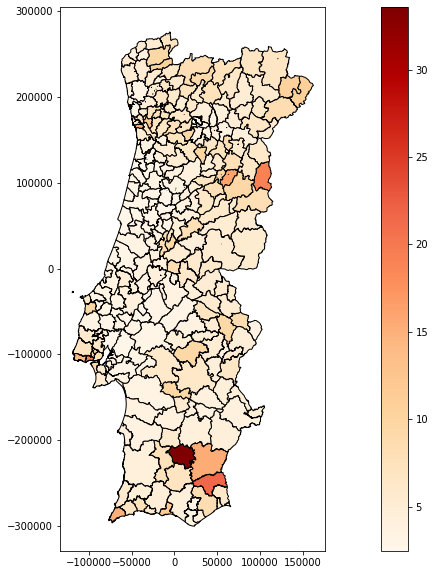

In [312]:
ax= map_df2.plot(column='Points', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')

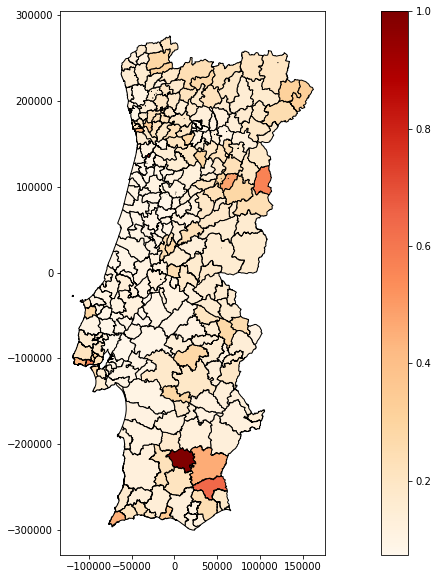

In [315]:
ax= map_df2.plot(column='Points scaled', figsize=(20,10), cmap='OrRd', legend=True, edgecolor='black')